# C9orf72

In [162]:
rm(list=ls())

# LIBRAIRIES AND FUNCTIONS

In [163]:
library(tidyverse)
library(readxl)
library(MetBrewer)
derain <- met.brewer("Derain")
demuth <- met.brewer("Demuth")
cassatt <- met.brewer("Cassatt2")
library(patchwork)
library(ggsci)
library(ggpubr)
source("../src/ggstyles.R")

# DATA

In [164]:
# Repeats
dd <- read_excel("../data/ICM_C9_expanded_rawRepeats_withClinical_2025-08-29.xlsx")
# MetaData
dc <- read_excel("../data/ICM_C9_expanded_summary_stats_withClinical_2025-08-29.xlsx")

In [165]:
dim(dd)
dim(dc)

[1] 3348    6

[1] 47 23

# Basics

In [166]:
head(dc,2)

Sample Molecules_count Mean               Median            
1 125425 64              2196.412500000001  1943.4583333333358
2 125718 64              1952.4075520833335 1697.2833333333328
  SD                 Mode               P90                Min               
1 1229.9551134932171 2669.733333333332  4083.7833333333338 299.5666666666657 
2 976.0048584062154  1278.0333333333335 3241.779999999998  231.83333333333337
  Max               Prop_gt500 ⋯ Prop_gt2500 Prop_gt3000 Prop_gt3500
1 5050.483333333337 0.984375   ⋯ 0.328125    0.21875     0.203125   
2 5426.799999999999 0.96875    ⋯ 0.25        0.171875    0.078125   
  Prop_gt4000 Prop_gt4500 Prop_gt5000 Condition      AP AO Gender
1 0.109375    0.0625      0.015625    Presymptomatic 64 NA M     
2 0.03125     0.015625    0.015625    Presymptomatic 41 NA M

In [167]:
dim(dc)
colnames(dc)
length(unique(dc$Sample))

[1] 47 23

[1] "Sample"          "Molecules_count" "Mean"            "Median"         
 [5] "SD"              "Mode"            "P90"             "Min"            
 [9] "Max"             "Prop_gt500"      "Prop_gt1000"     "Prop_gt1500"    
[13] "Prop_gt2000"     "Prop_gt2500"     "Prop_gt3000"     "Prop_gt3500"    
[17] "Prop_gt4000"     "Prop_gt4500"     "Prop_gt5000"     "Condition"      
[21] "AP"              "AO"              "Gender"

[1] 47

In [168]:
table(dc$Condition, exclude=F)


           ALS            FTD Presymptomatic 
            17             23              7 

In [169]:
table(dc$Gender, exclude=F)


 F  M 
25 22 

In [170]:
table(dc$Condition, dc$Gender, exclude=F)

                
                  F  M
  ALS             9  8
  FTD            11 12
  Presymptomatic  5  2

In [171]:
summary(dc$AP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.00   54.50   64.00   61.49   71.00   89.00 

In [172]:
dc$AO <- as.numeric(dc$AO)

Warning message:
“NAs introduits lors de la conversion automatique”


In [173]:
summary(dc$AO)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  35.00   54.00   61.00   59.78   67.00   85.00       6 

In [174]:
head(dd,2)

Sample repeats           Condition      AP AO Gender
1 125425 2669.733333333332 Presymptomatic 64 NA M     
2 125425 299.5666666666657 Presymptomatic 64 NA M

In [175]:
length(unique(dd$Sample))

[1] 47

In [176]:
dd$repeats <- as.numeric(dd$repeats)

In [177]:
summary(dd$repeats)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  70.37  994.52 1532.06 1802.39 2364.17 7611.62 

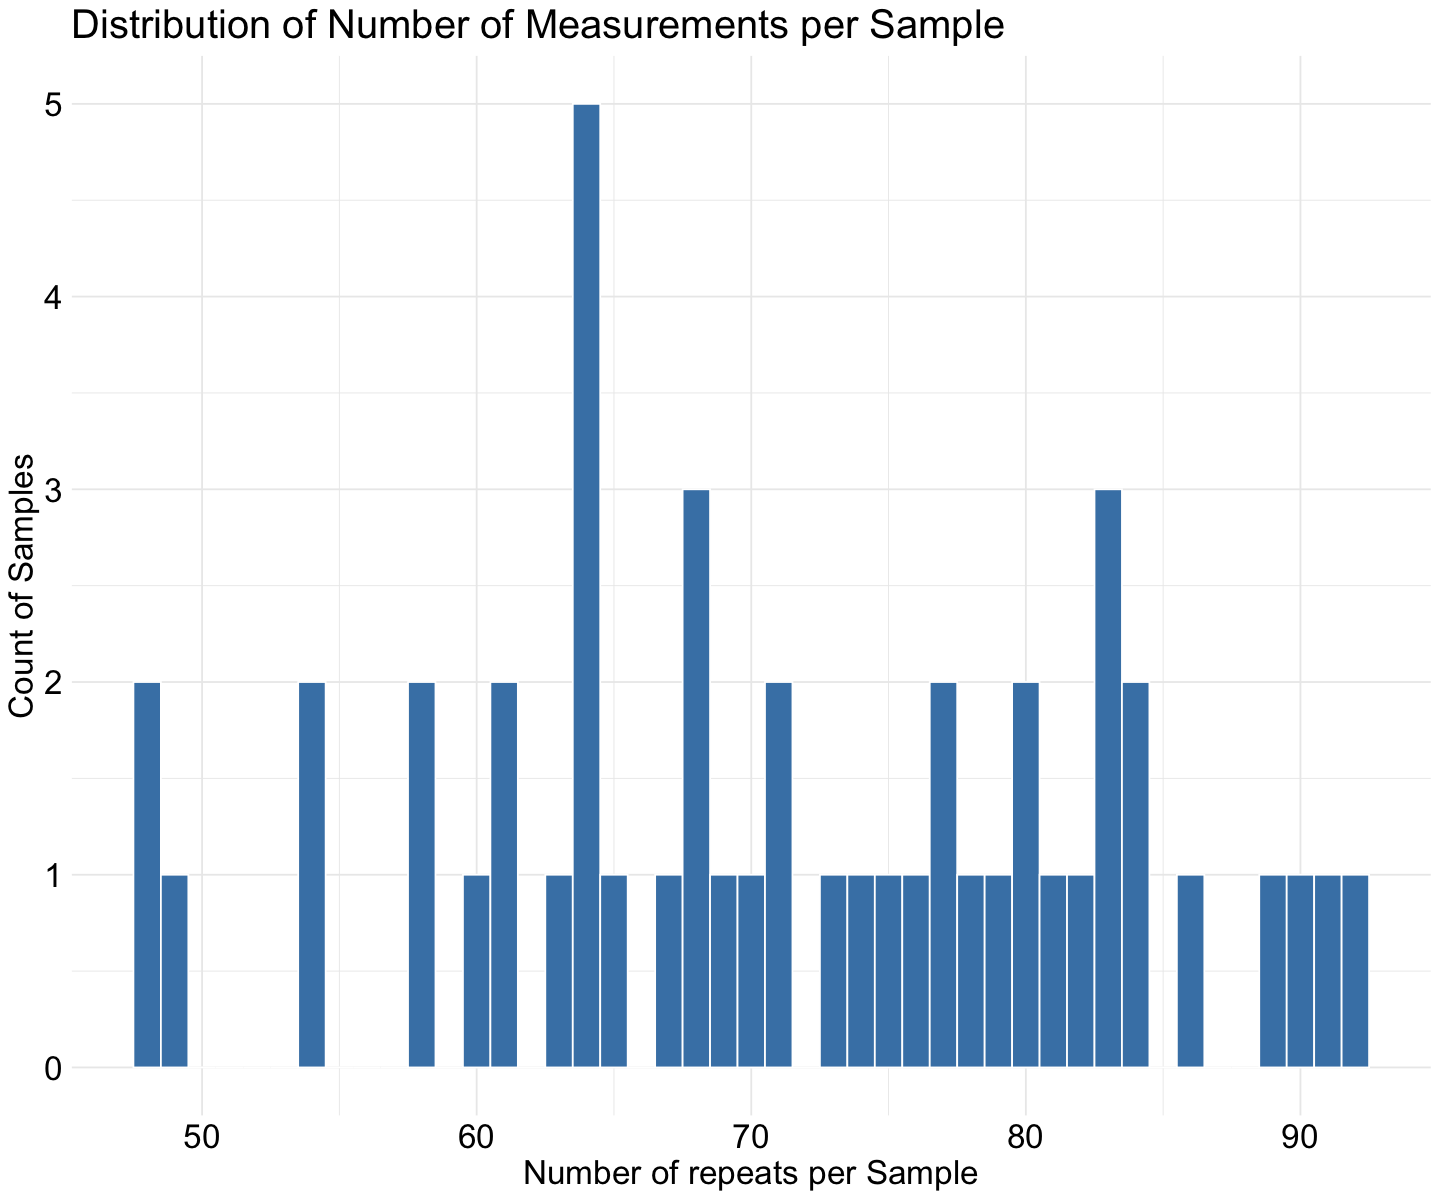

In [178]:
# Number of MUT repeats per sample
dd %>%
  #count(Sample, name = "n_repeats") %>%  # count how many measurements per sample
  group_by(Sample) %>%
  summarise(n_repeats = n()) %>%
  ungroup() %>%
  ggplot(aes(x = n_repeats)) +
  geom_histogram(binwidth = 1, fill = "steelblue", color = "white") +
  labs(
    title = "Distribution of Number of Measurements per Sample",
    x = "Number of repeats per Sample",
    y = "Count of Samples"
  ) +
  theme_minimal() + gtheme(20)

# Explore Length

## Global

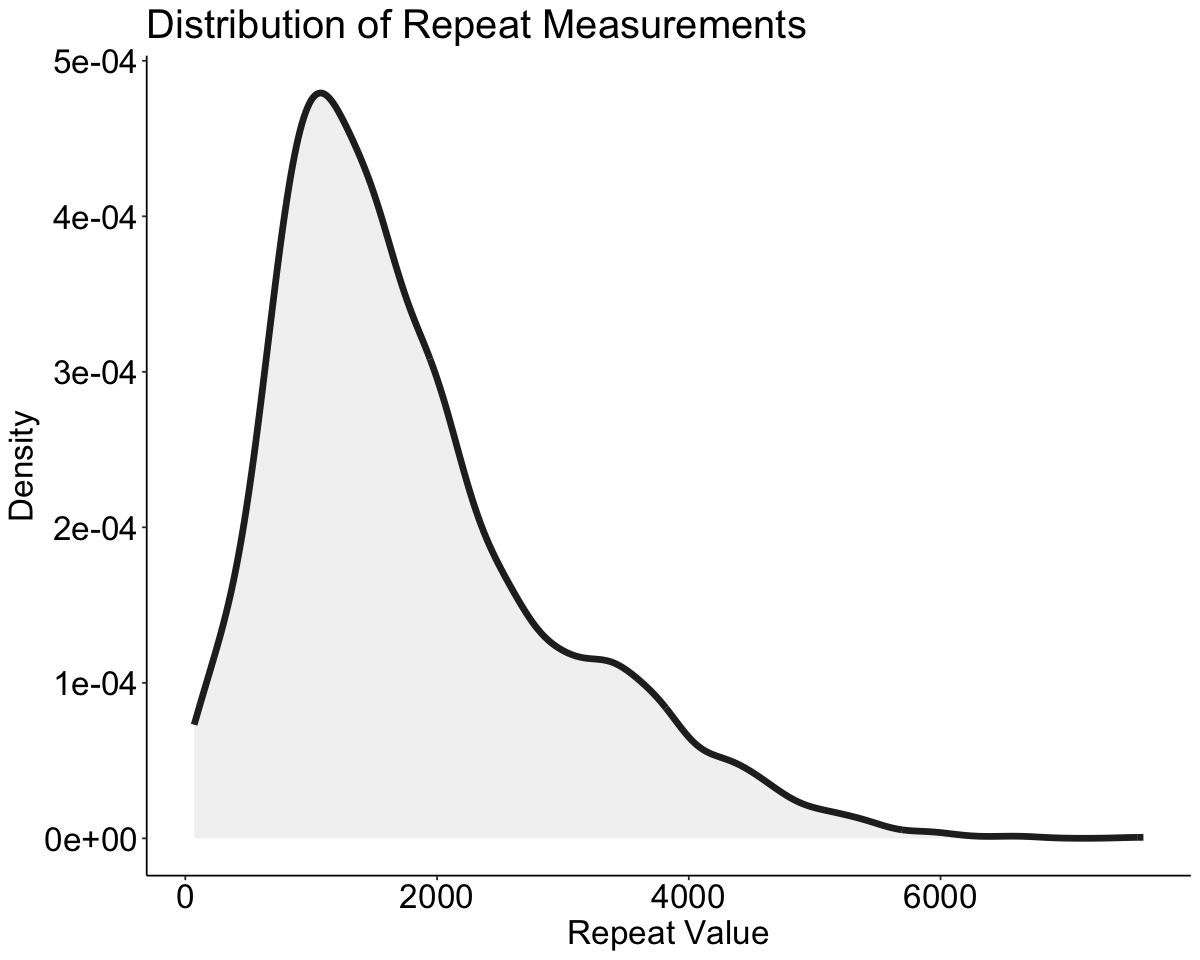

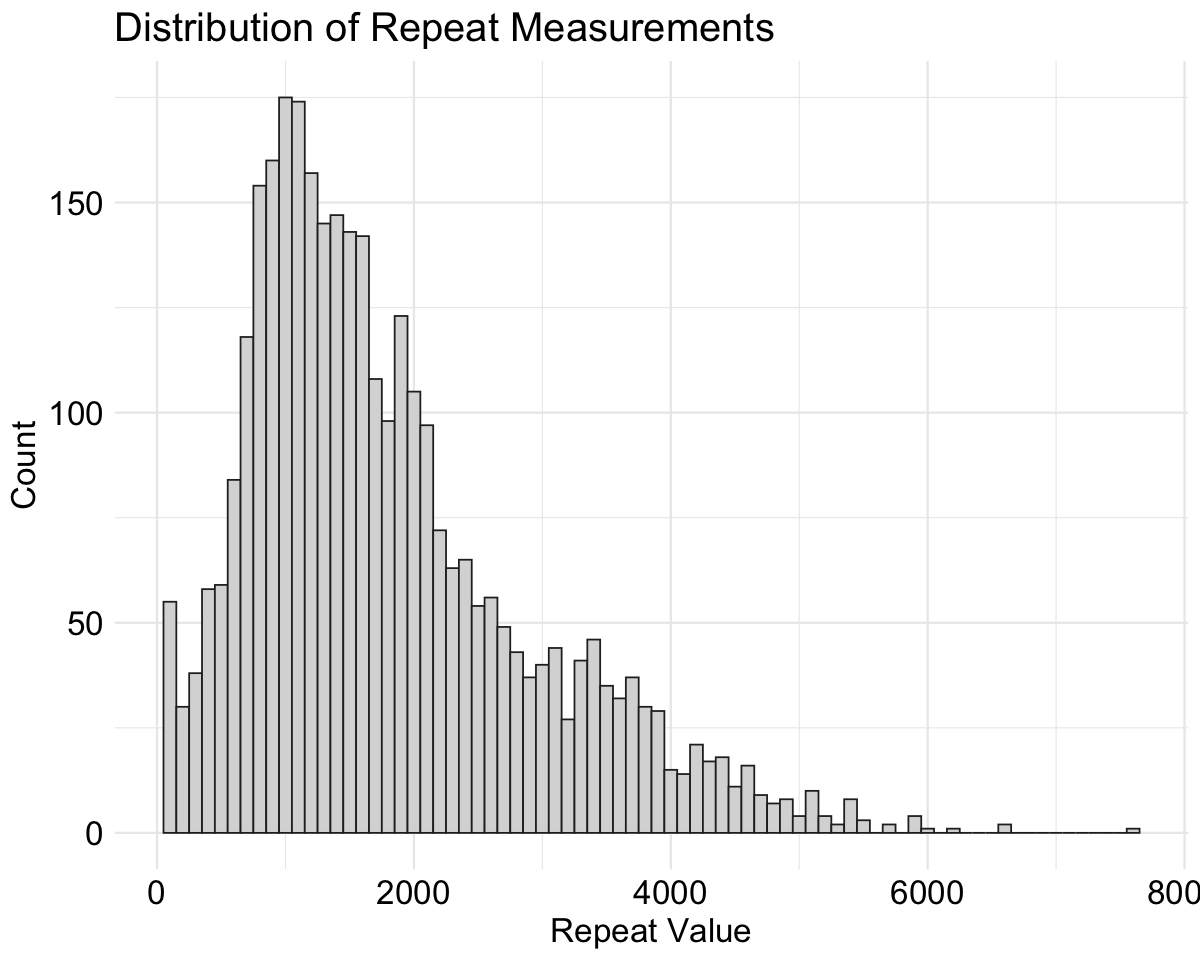

In [179]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(dd, aes(repeats)) + 
geom_density(size=1.9, fill="grey95", color="grey15")  + 
theme_classic() + gtheme(20) + 
  labs(
    title = "Distribution of Repeat Measurements",
    x = "Repeat Value",
    y = "Density"
  )
#geom_vline(xintercept = c(147, 157, 165), linetype='dashed') + 
#scale_x_continuous(limits=c(90,300), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1))

ggplot(dd, aes(x = repeats)) +
  geom_histogram(binwidth = 100, fill = "grey85", color = "grey15") +
  labs(
    title = "Distribution of Repeat Measurements",
    x = "Repeat Value",
    y = "Count"
  ) +
  theme_minimal(base_size = 14) + gtheme(20)

In [180]:
summary(dd$repeats)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  70.37  994.52 1532.06 1802.39 2364.17 7611.62 

## Repeats x Sex

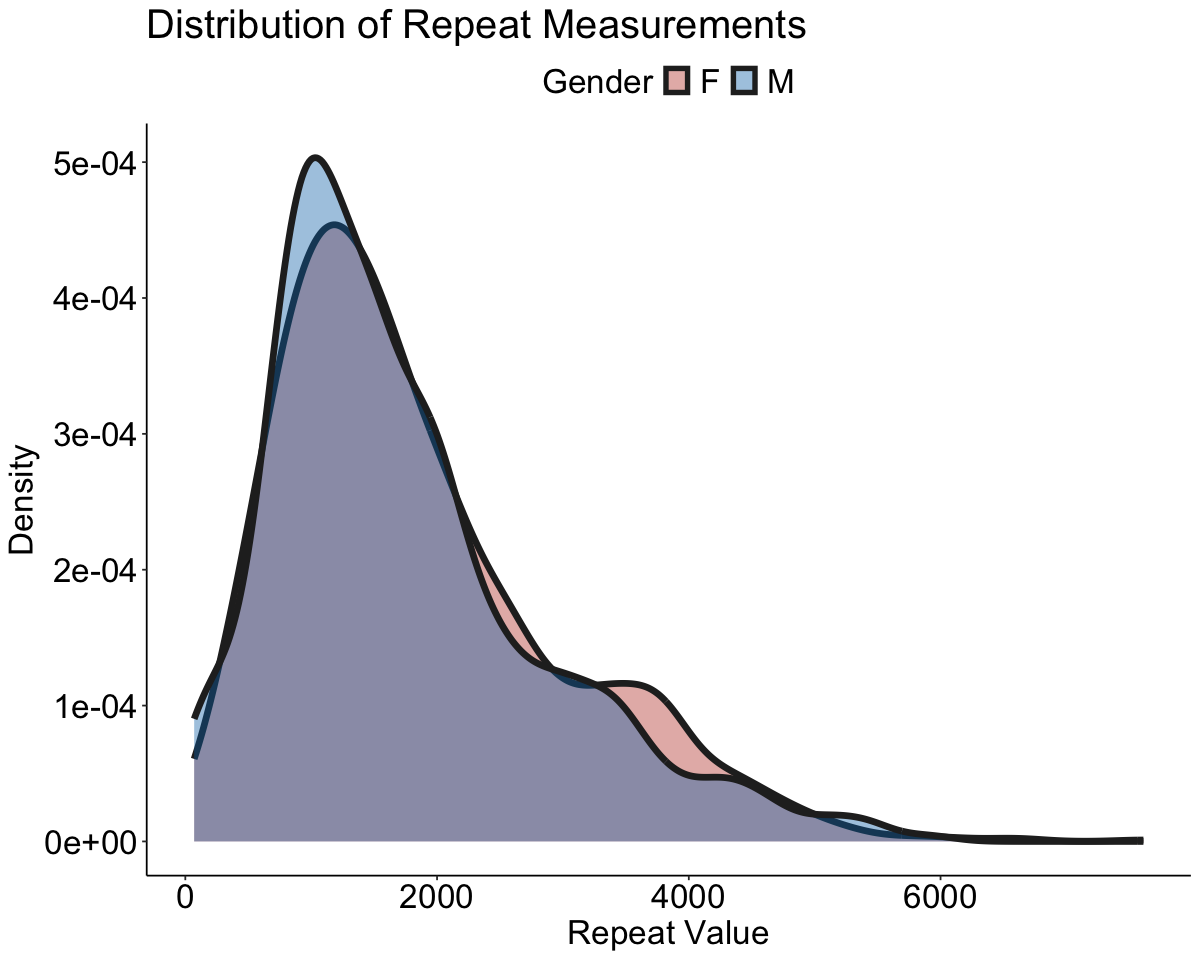

In [181]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(dd, aes(repeats, fill=Gender)) + 
geom_density(size=1.9, color="grey15")  + 
theme_classic() + gtheme(20) + 
  labs(
    title = "Distribution of Repeat Measurements",
    x = "Repeat Value",
    y = "Density"
  ) + topleg + scale_fill_nejm(alpha=.4)

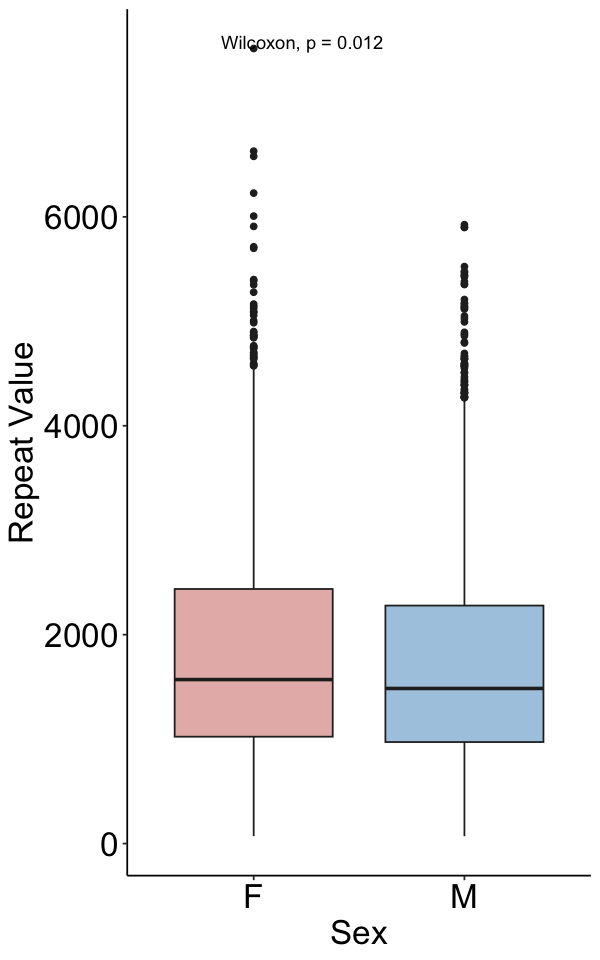

In [182]:
options(repr.plot.width=5, repr.plot.height=8)

ggplot(dd, aes(y=repeats, x=Gender, fill=Gender)) + 
geom_boxplot(color="grey15")  + 
theme_classic() + gtheme(20) + 
  labs(
    #title = "Distribution of Repeat Measurements",
    y = "Repeat Value",
    x = "Sex"
  ) + noleg + stat_compare_means() + scale_fill_nejm(alpha=.4)

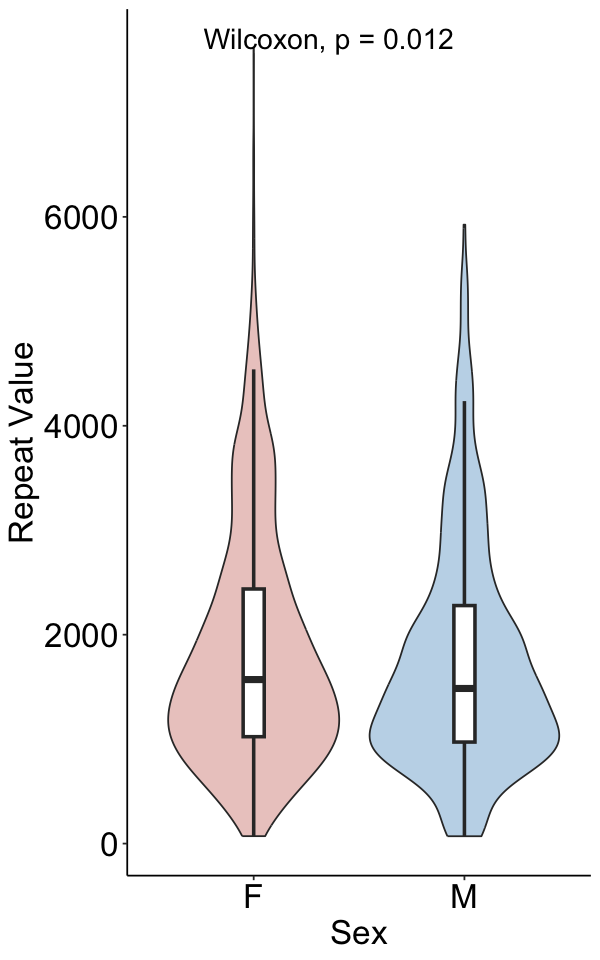

In [183]:
options(repr.plot.width=5, repr.plot.height=8)

ggplot(dd, aes(y=repeats, x=Gender)) + 
geom_violin(alpha=.3, aes(fill=Gender)) + 
geom_boxplot(outlier.shape = NA, width=.1, size=1, fill="white") +
#geom_jitter(size=4, width = .1, alpha=.6) + 
theme_classic() + gtheme(20) + 
  labs(
    #title = "Distribution of Repeat Measurements",
    y = "Repeat Value",
    x = "Sex"
  ) + noleg + stat_compare_means(size=6) + scale_fill_nejm(alpha=.4)

## Repeats x Age

In [184]:
head(dc,2)

Sample Molecules_count Mean               Median            
1 125425 64              2196.412500000001  1943.4583333333358
2 125718 64              1952.4075520833335 1697.2833333333328
  SD                 Mode               P90                Min               
1 1229.9551134932171 2669.733333333332  4083.7833333333338 299.5666666666657 
2 976.0048584062154  1278.0333333333335 3241.779999999998  231.83333333333337
  Max               Prop_gt500 ⋯ Prop_gt2500 Prop_gt3000 Prop_gt3500
1 5050.483333333337 0.984375   ⋯ 0.328125    0.21875     0.203125   
2 5426.799999999999 0.96875    ⋯ 0.25        0.171875    0.078125   
  Prop_gt4000 Prop_gt4500 Prop_gt5000 Condition      AP AO Gender
1 0.109375    0.0625      0.015625    Presymptomatic 64 NA M     
2 0.03125     0.015625    0.015625    Presymptomatic 41 NA M

In [185]:
summary(dc$AP)
dd$group_age <- "64-"
dd$group_age[which(dd$AP >= 64)] <- "64+"
dd$group_age <- factor(dd$group_age, levels=c("64-","64+"))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.00   54.50   64.00   61.49   71.00   89.00 

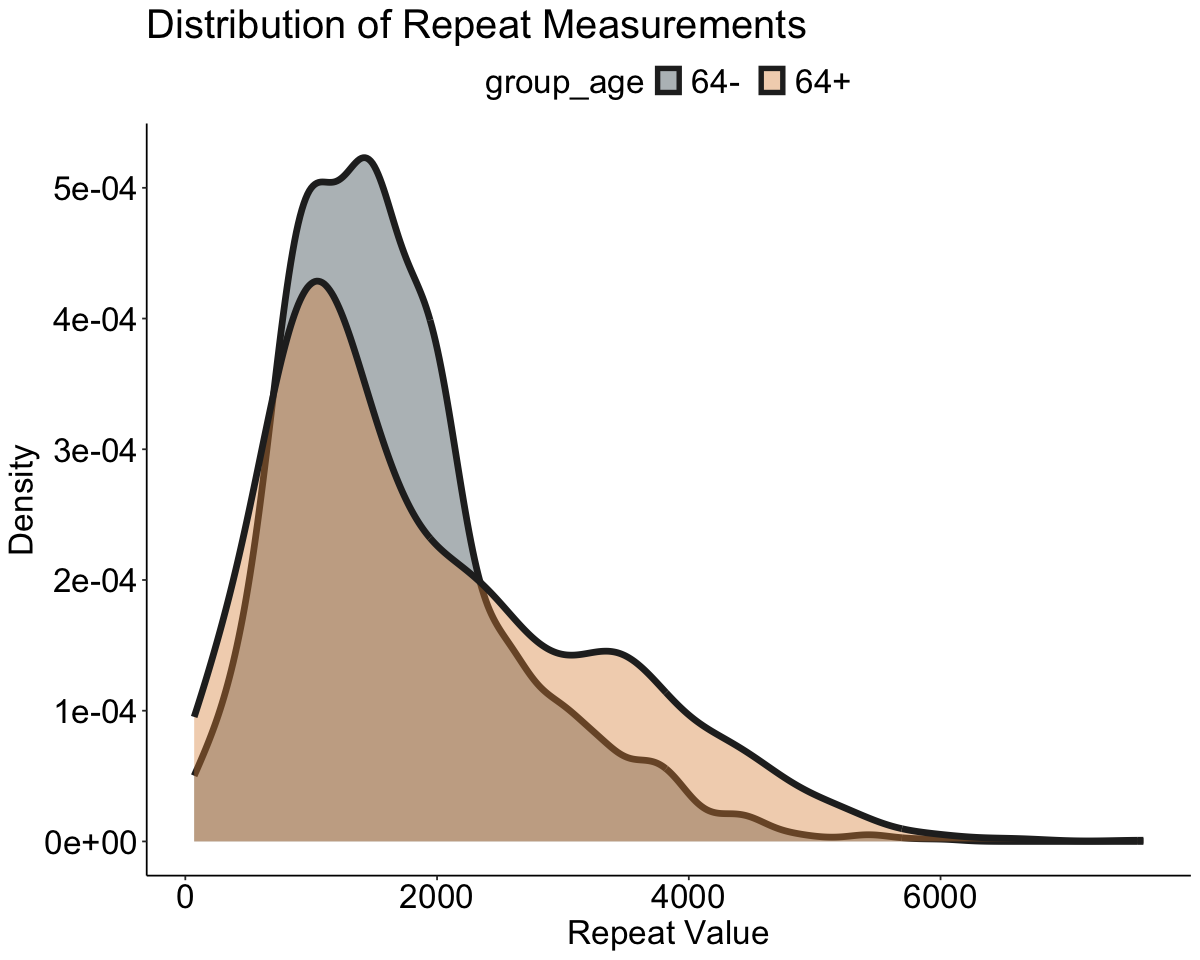

In [186]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(dd, aes(repeats, fill=group_age)) + 
geom_density(size=1.9, color="grey15")  + 
theme_classic() + gtheme(20) + 
  labs(
    title = "Distribution of Repeat Measurements",
    x = "Repeat Value",
    y = "Density"
  ) + topleg + scale_fill_jama(alpha=.4)

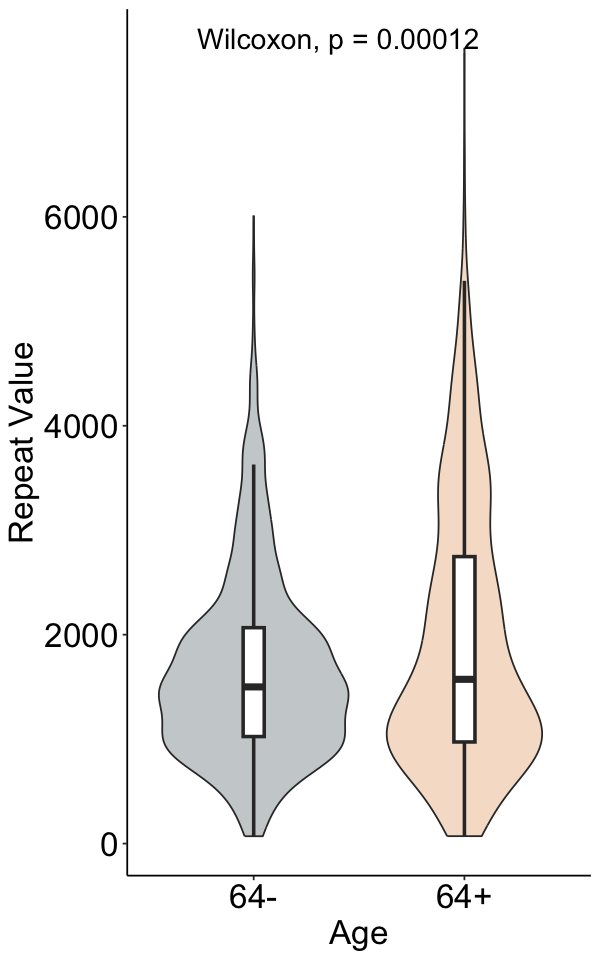

In [187]:
options(repr.plot.width=5, repr.plot.height=8)

ggplot(dd, aes(y=repeats, x=group_age)) + 
geom_violin(alpha=.3, aes(fill=group_age)) + 
geom_boxplot(outlier.shape = NA, width=.1, size=1, fill="white") +
#geom_jitter(size=4, width = .1, alpha=.6) + 
theme_classic() + gtheme(20) + 
  labs(
    #title = "Distribution of Repeat Measurements",
    y = "Repeat Value",
    x = "Age"
  ) + noleg + stat_compare_means(size=6) + scale_fill_jama(alpha=.4)

In [188]:
## Repeats x Disease Type

In [189]:
table(dc$Condition)


           ALS            FTD Presymptomatic 
            17             23              7 

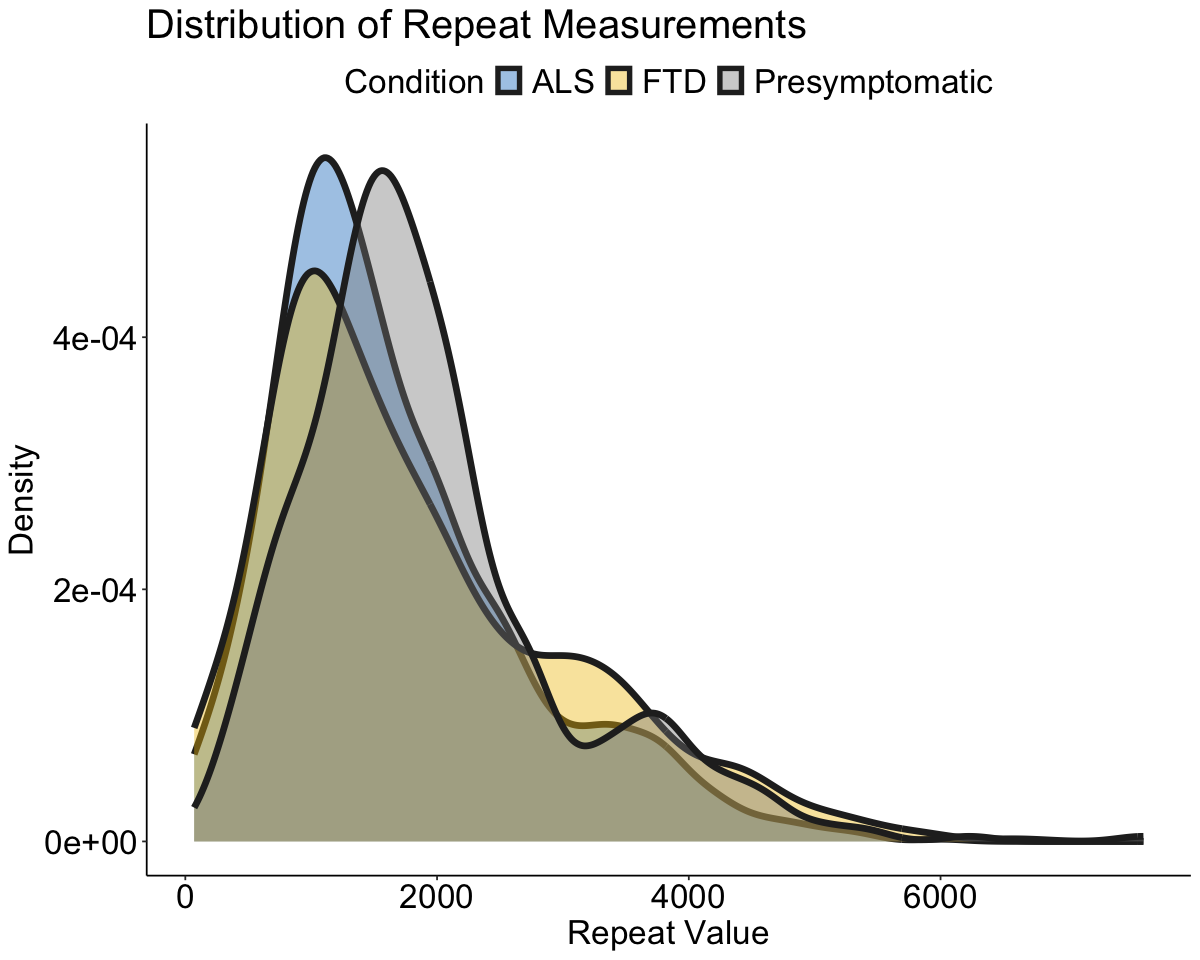

In [190]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(dd, aes(repeats, fill=Condition)) + 
geom_density(size=1.9, color="grey15")  + 
theme_classic() + gtheme(20) + 
  labs(
    title = "Distribution of Repeat Measurements",
    x = "Repeat Value",
    y = "Density"
  ) + topleg + scale_fill_jco(alpha=.4)

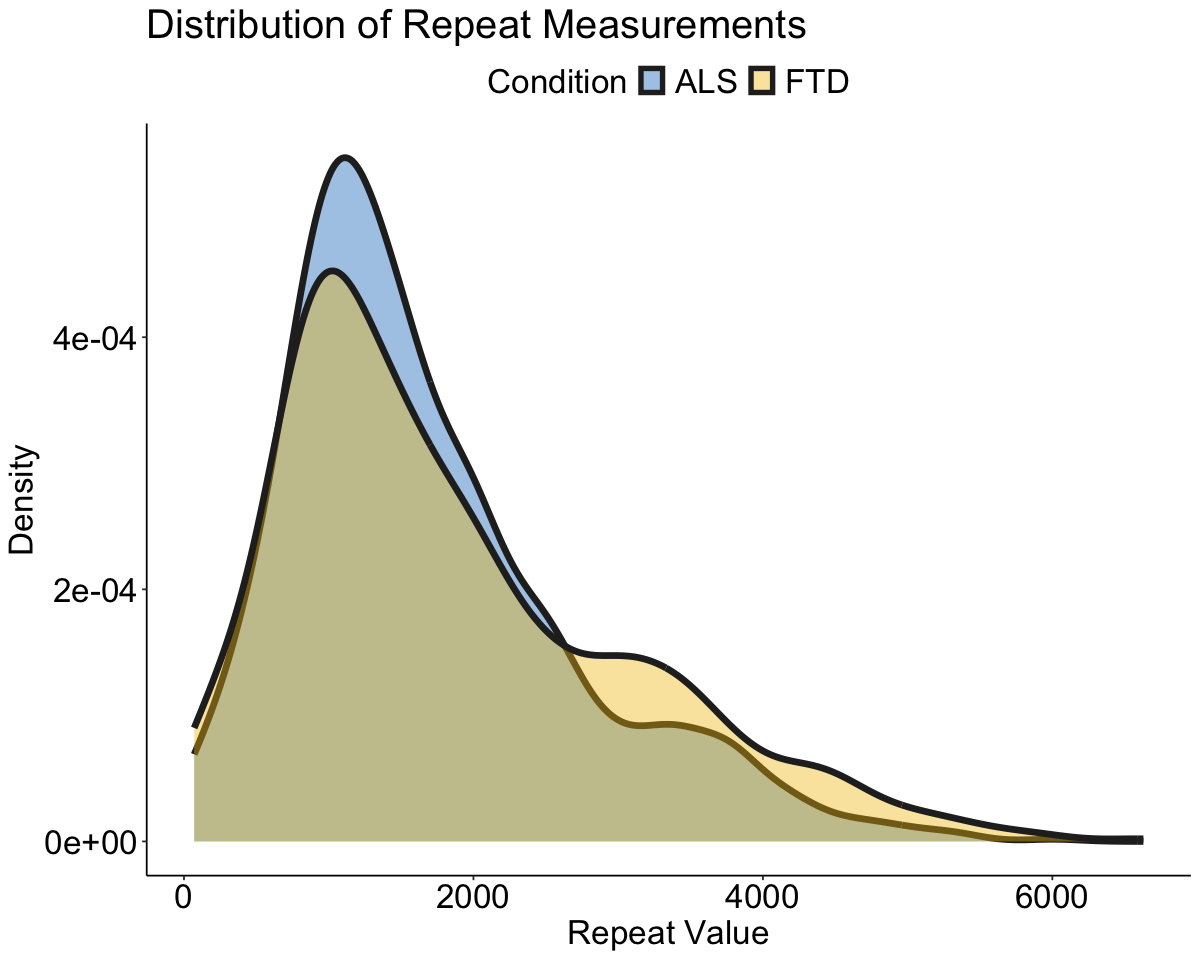

In [191]:
options(repr.plot.width=10, repr.plot.height=8)

dd %>% filter(Condition %in% c("ALS","FTD")) %>% ggplot(aes(repeats, fill=Condition)) + 
geom_density(size=1.9, color="grey15")  + 
theme_classic() + gtheme(20) + 
  labs(
    title = "Distribution of Repeat Measurements",
    x = "Repeat Value",
    y = "Density"
  ) + topleg + scale_fill_jco(alpha=.4)

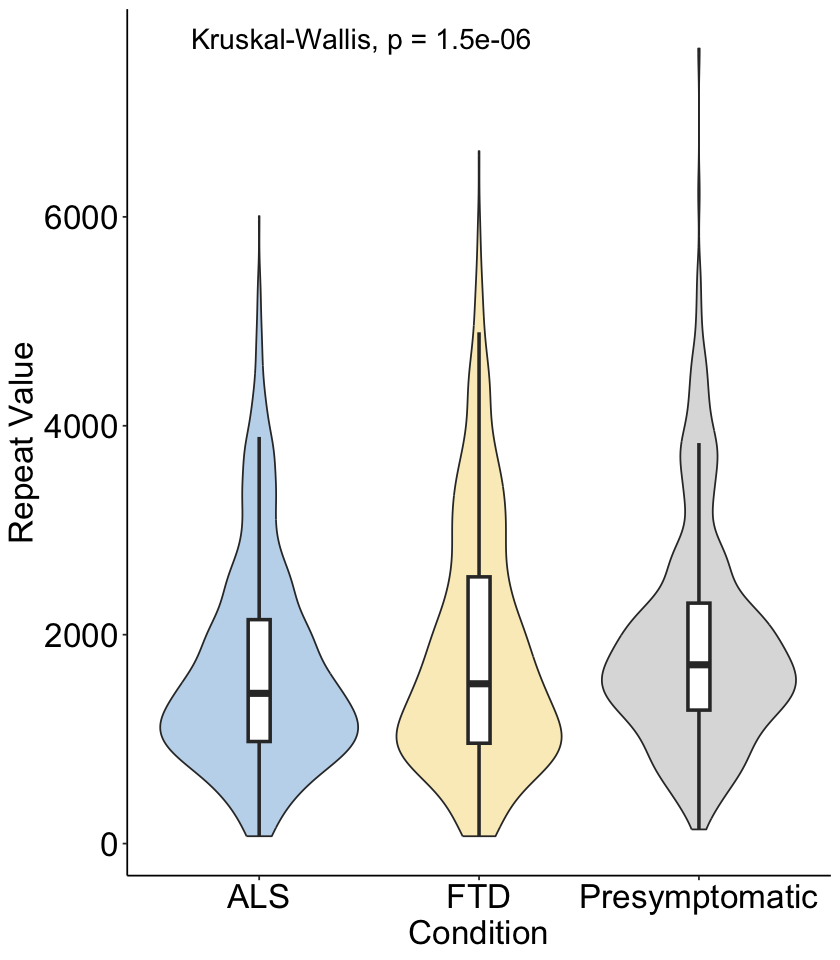

In [192]:
options(repr.plot.width=7, repr.plot.height=8)

ggplot(dd, aes(y=repeats, x=Condition)) + 
geom_violin(alpha=.3, aes(fill=Condition)) + 
geom_boxplot(outlier.shape = NA, width=.1, size=1, fill="white") +
#geom_jitter(size=4, width = .1, alpha=.6) + 
theme_classic() + gtheme(20) + 
  labs(
    #title = "Distribution of Repeat Measurements",
    y = "Repeat Value",
    x = "Condition"
  ) + noleg + stat_compare_means(size=6) + scale_fill_jco(alpha=.4)

# Size Region Enrichment 

`geom_smooth()` using formula = 'y ~ x'


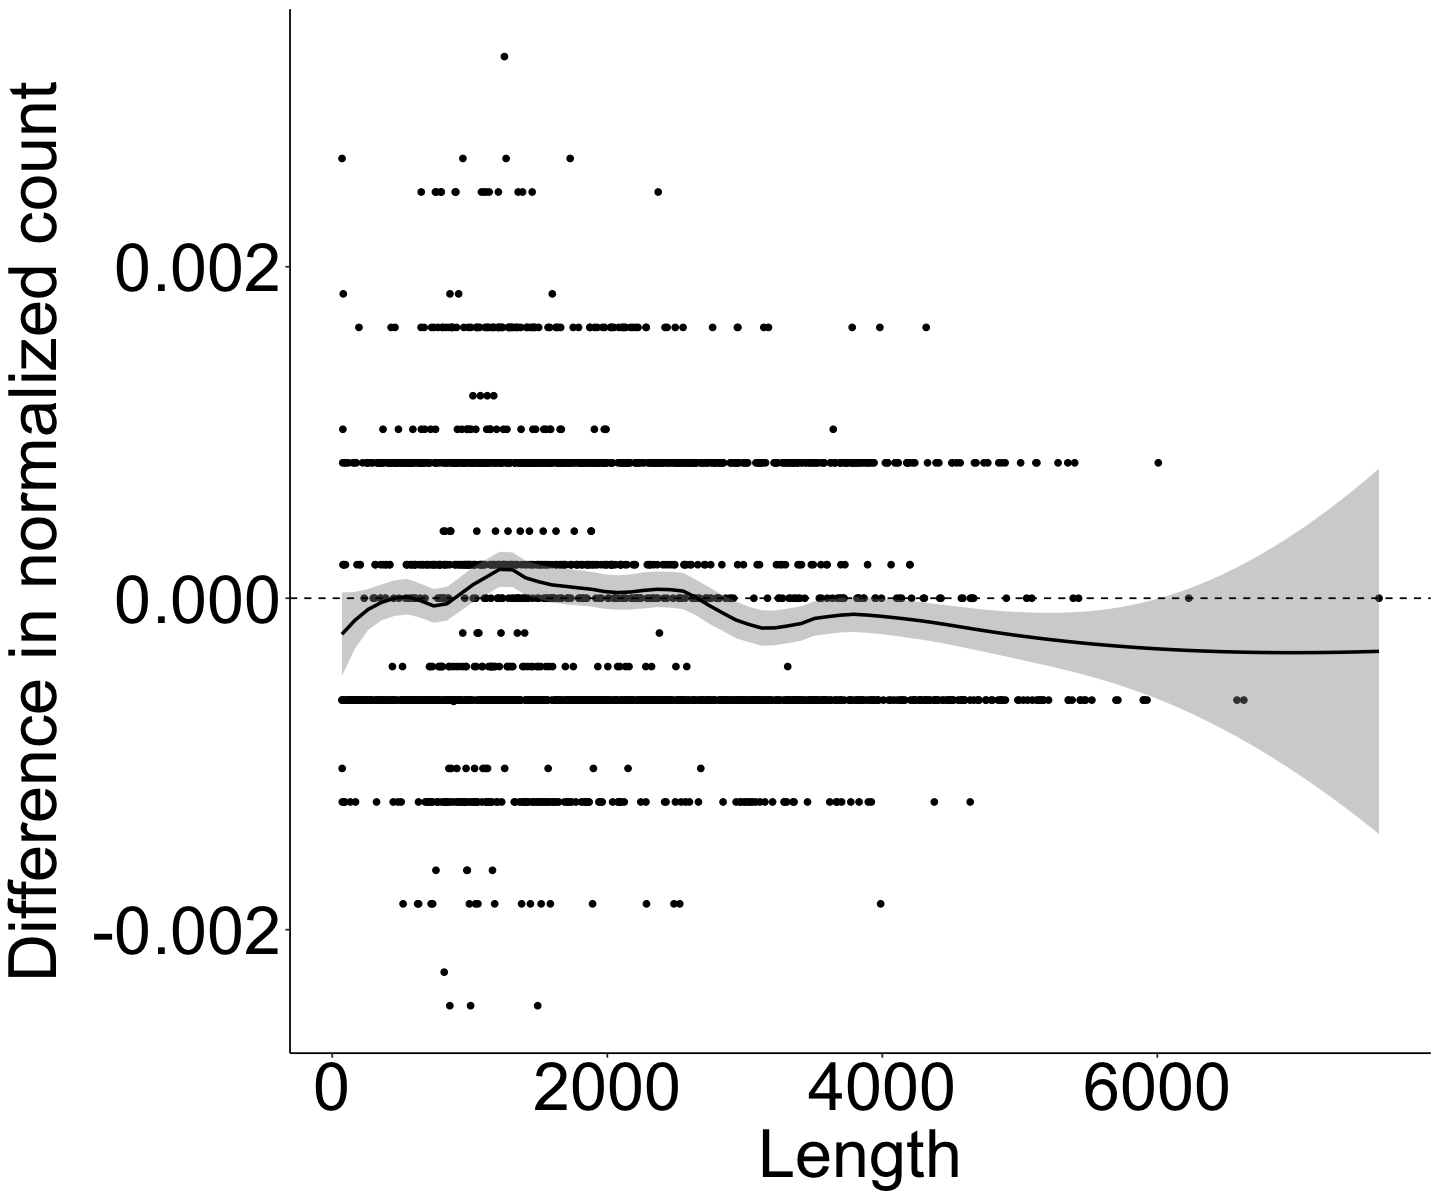

In [194]:
# Calculate Counts and Props 
dregions <- dd %>% 
group_by(Condition, round(repeats), .drop = FALSE) %>% summarise(n=n(), .groups = "drop_last") %>%
mutate(prop=n / sum(n)) %>%
pivot_wider(names_from=Condition, values_from=c(n,prop)) %>%
replace(is.na(.), 0) %>% rename(Repeat = "round(repeats)")
dregions$diff_ALS_FTD <- dregions$prop_ALS -  dregions$prop_FTD

options(repr.plot.width=12,repr.plot.height=10)

ggplot(dregions, aes(x = Repeat, y=diff_ALS_FTD)) +
  geom_point(size=1.5) +
  geom_smooth(method="loess", span=0.3, color="black", level=0.95, fill="grey55") + 
  geom_hline(yintercept=0, linetype="dashed", size=0.5) + 
  theme_classic() + gtheme(40) + 
  xlab("Length") +
  ylab("Difference in normalized count")

In [195]:
bin_size <- 50

dd_binned <- dd %>%
  mutate(
    repeat_bin = floor(repeats / bin_size) * bin_size
  )

`geom_smooth()` using formula = 'y ~ x'


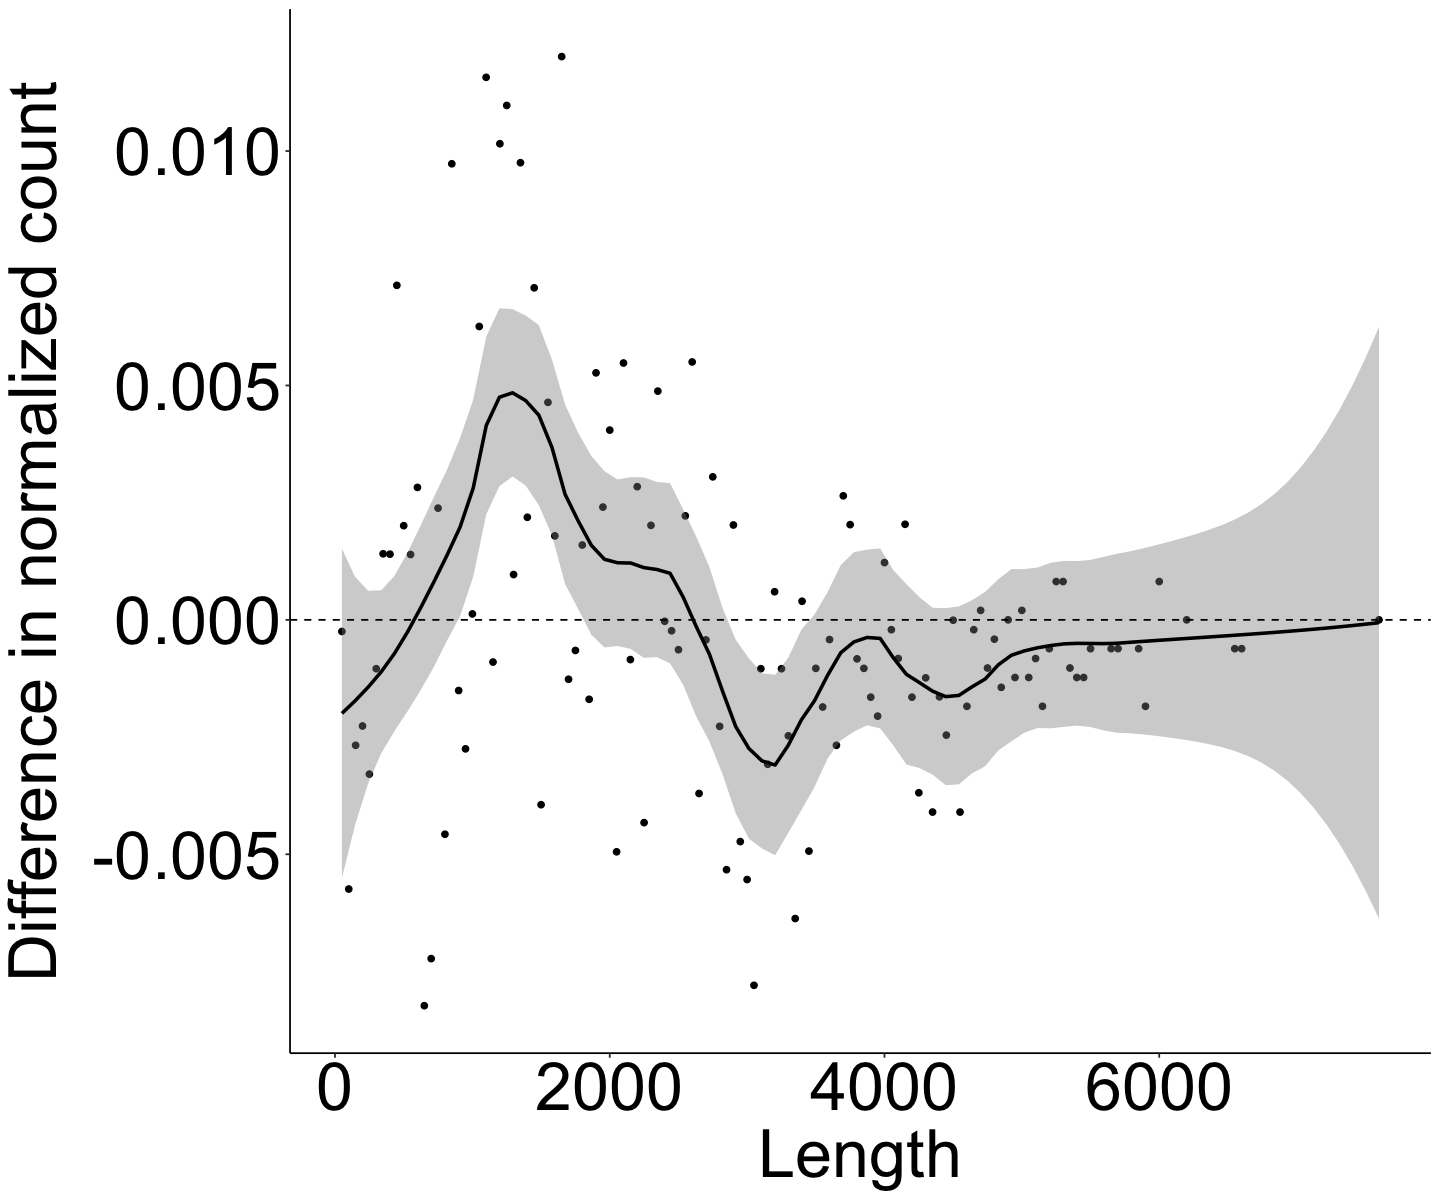

In [199]:
dregions <- dd_binned %>% 
group_by(Condition, repeat_bin, .drop = FALSE) %>% summarise(n=n(), .groups = "drop_last") %>%
mutate(prop=n / sum(n)) %>%
pivot_wider(names_from=Condition, values_from=c(n,prop)) %>%
replace(is.na(.), 0)
dregions$diff_ALS_FTD <- dregions$prop_ALS -  dregions$prop_FTD

options(repr.plot.width=12,repr.plot.height=10)

ggplot(dregions, aes(x = repeat_bin, y=diff_ALS_FTD)) +
  geom_point(size=1.5) +
  geom_smooth(method="loess", span=0.3, color="black", level=0.95, fill="grey55") + 
  geom_hline(yintercept=0, linetype="dashed", size=0.5) + 
  theme_classic() + gtheme(40) + 
  xlab("Length") +
  ylab("Difference in normalized count")

In [ ]:
# Add the missing Fragemnt size between min and max with 0 counts / prop
xall <- min(dregions$Fragment_size):max(dregions$Fragment_size)
xmissing <- xall[!xall %in% dregions$Fragment_size]
dadd <- data.frame(
    Fragment_size = xmissing,
    n_CH = 0,
    n_Tumor = 0,
    prop_CH = 0,
    prop_Tumor = 0,
    diff = 0
)
dregions2 <- rbind(dregions, dadd)

myrange <- 70:310
tmp <- dregions2[which(dregions2$Fragment_size>=myrange[1] & dregions2$Fragment_size<=myrange[length(myrange)]) , ]
lfit <- loess(tmp$diff ~ tmp$Fragment_size, span=0.3)
lpred <- predict(lfit, myrange, se=T)
borninf <- lpred$fit - qt(0.975, lpred$df)*lpred$se.fit
bornsup <- lpred$fit + qt(0.975, lpred$df)*lpred$se.fit

cat("95% CI inf is above 0:")
myrange[borninf>0]
cat("95% CI supp is below 0:")
myrange[bornsup<0]

options(repr.plot.width=12,repr.plot.height=10)

gsize <- ggplot(dregions2, aes(x = Fragment_size, y=diff)) +
  annotate("rect", xmin=132, xmax=152, ymin=-0.038, ymax=0.016, fill ='dodgerblue3', alpha=0.2) + 
  annotate("rect", xmin = 159, xmax = 196, ymin = -0.038, ymax = 0.016, fill ='firebrick3', alpha = 0.2) + 
  geom_point(size=1.5) +
  geom_smooth(method="loess", span=0.3, color="black", level=0.95, fill="grey55") + 
  geom_hline(yintercept=0, linetype="dashed", size=0.5) + 
  theme_classic() + gtheme(40) + 
  #scale_x_continuous(limits=c(100,170), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) + 
  scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) + 
  xlab("Fragment length (bp)") +
  ylab("Difference in normalized count")
gsize

# Overall Size Density

In [13]:
min(df$Fragment_size)
max(df$Fragment_size)
summary(df$Fragment_size)

[1] 57

[1] 476

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   57.0   154.0   164.0   164.8   173.0   476.0 

In [14]:
dim(df)

[1] 363392     46

In [15]:
table(df$Fragment_Status)


   Error_both_read_mut_with_other_alt                                   MUT 
                                   50                                 16769 
MUT_but_other_read_mut_with_other_alt                             Other_MUT 
                                  156                                   287 
                                   WT                 WT_but_other_read_mut 
                               341095                                   127 
 WT_but_other_read_mut_with_other_alt 
                                 4908 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 521 rows containing non-finite outside the scale range (`stat_density()`).”


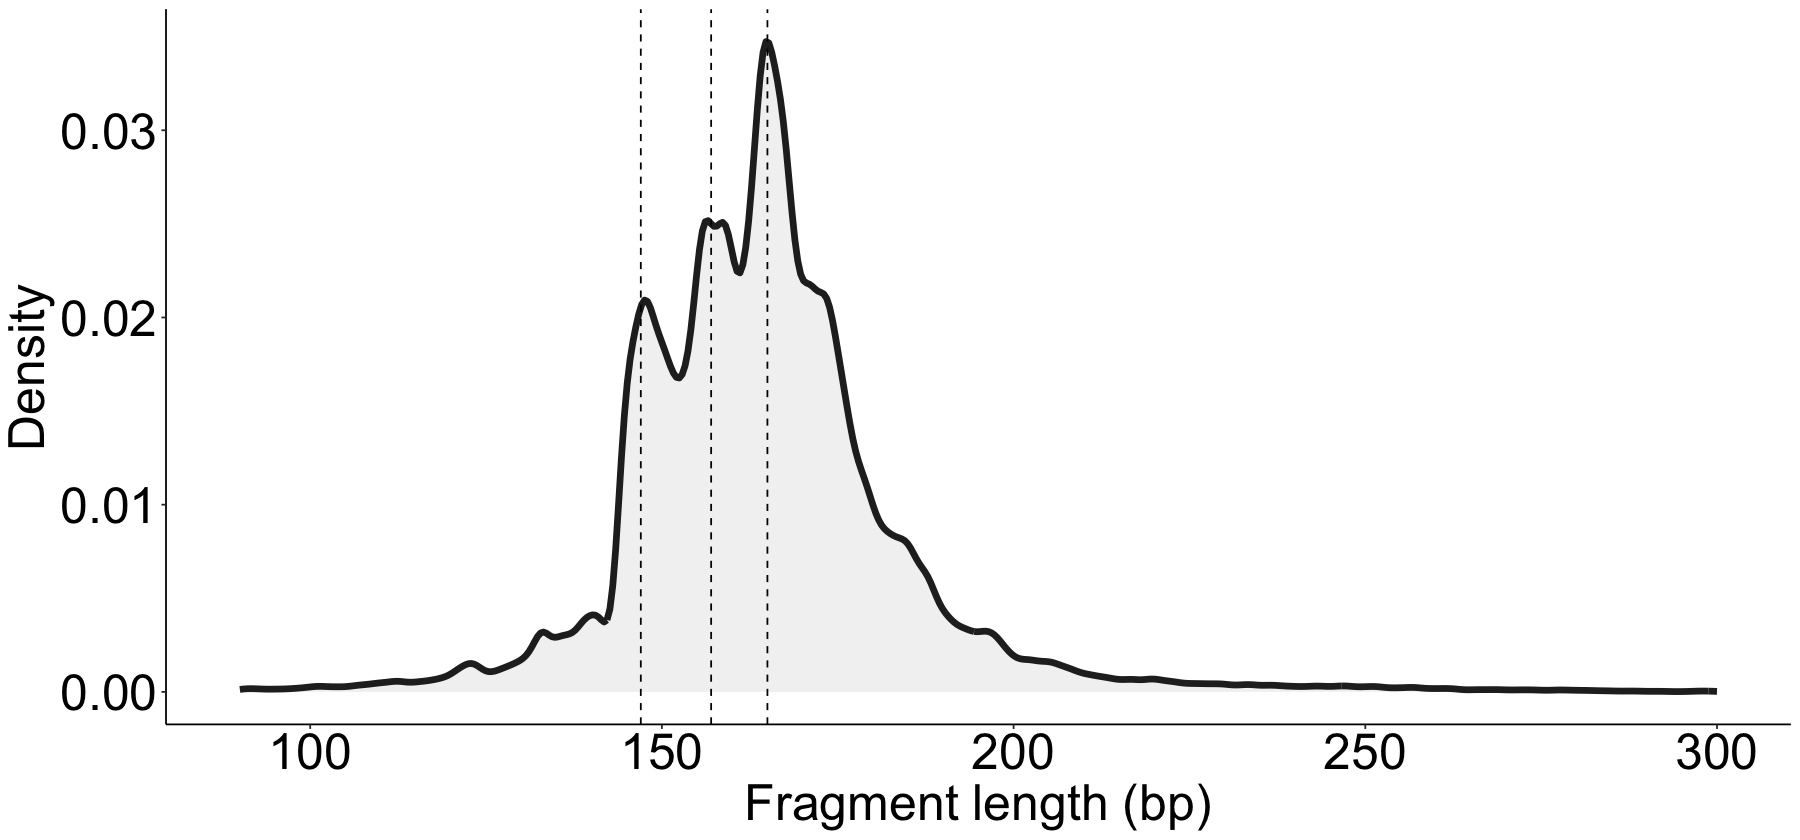

In [20]:
options(repr.plot.width=15, repr.plot.height=7)

tmp <- df

ggplot(tmp, aes(x=Fragment_size)) + 
geom_density(size=1.9, fill="grey95", color="grey15") + 
theme_classic() + 
#theme_bw() + 
gtheme(30) + 
xlab("Fragment length (bp)") + 
ylab("Density") + 
geom_vline(xintercept = c(147, 157, 165), linetype='dashed') + 
scale_x_continuous(limits=c(90,300), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1))
#scale_x_continuous(limits=c(90,250), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 1, angle=90))

Warning message in geom_line(size = 1.9, fill = "grey95", color = "grey15"):
“Ignoring unknown parameters: `fill`”
Warning message:
“Removed 451 rows containing missing values or values outside the scale range (`geom_line()`).”


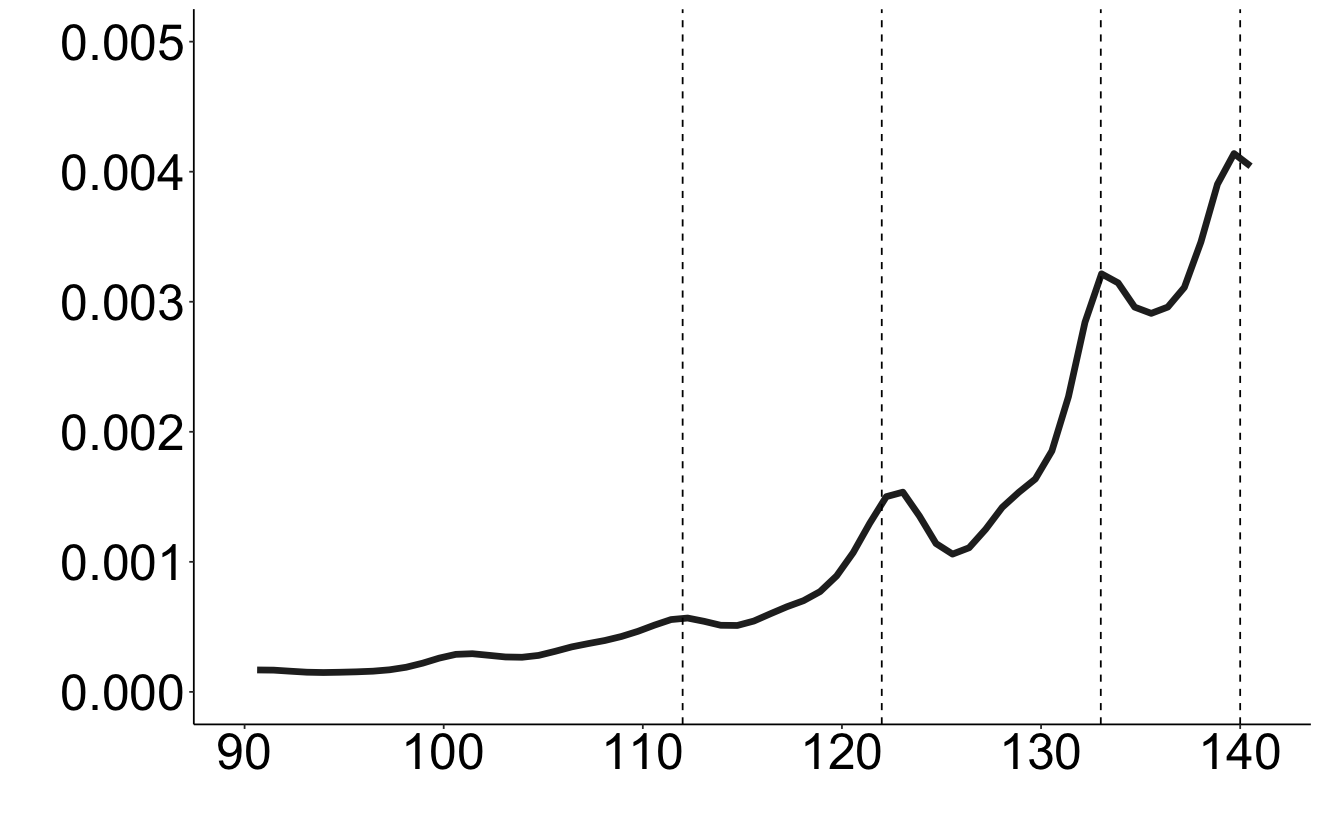

In [29]:
densFrag <- density(tmp$Fragment_size)
dens_frag <- data.frame(x=densFrag$x, y=densFrag$y)

options(repr.plot.width=11, repr.plot.height=7)
ggplot(dens_frag, aes(x=x, y=y)) + 
geom_line(size=1.9, fill="grey95", color="grey15") + 
theme_classic() + 
#theme_bw() + 
gtheme(30) + 
xlab("") + 
ylab("") + 
geom_vline(xintercept = c(112,122,133,140), linetype='dashed') + 
#scale_x_continuous(limits=c(90,144)) + ylim(c(0,0.005))
scale_x_continuous(limits=c(90,141)) + ylim(c(0,0.005))

In [ ]:
densFrag <- density(df$Fragment_size)
dens_frag <- data.frame(x=densFrag$x, y=densFrag$y)

options(repr.plot.width=15, repr.plot.height=7)
ggplot(dens_frag, aes(x=x, y=y)) + geom_line(size=1.5) + 
#theme_classic() + 
theme_bw() + 
gtheme(25) + 
xlab("Fragment length") + 
ylab("Density") + 
geom_vline(xintercept = c(112,123,133,140), linetype='dashed') + 
#scale_x_continuous(limits=c(90,144)) + ylim(c(0,0.005))
scale_x_continuous(limits=c(90,142)) + ylim(c(0,0.005))
#scale_x_continuous(limits=c(90,300), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2))
#scale_x_continuous(limits=c(90,250), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 1, angle=90))

In [1063]:
class(densFrag)

[1] "density"

# Size Tumor vs. CH

In [16]:
mycol <- c("firebrick3","dodgerblue3")

In [17]:
table(df$Final_mutation_source)
table(df$Fragment_Status)


     CH   Tumor Unknown 
  95205   75129  193058 


   Error_both_read_mut_with_other_alt                                   MUT 
                                   50                                 16769 
MUT_but_other_read_mut_with_other_alt                             Other_MUT 
                                  156                                   287 
                                   WT                 WT_but_other_read_mut 
                               341095                                   127 
 WT_but_other_read_mut_with_other_alt 
                                 4908 

In [18]:
dff <- df %>% filter(Final_mutation_source %in% c("CH", "Tumor")) %>% 
filter(Fragment_Status %in% c("WT","MUT"))

In [24]:
length(unique(dff$Sample_Id))

[1] 35

In [19]:
table(dff$Final_mutation_source, dff$Fragment_Status)

       
          MUT    WT
  CH      593 93292
  Tumor  7222 66652

Warning message:
“Removed 105 rows containing non-finite outside the scale range (`stat_density()`).”


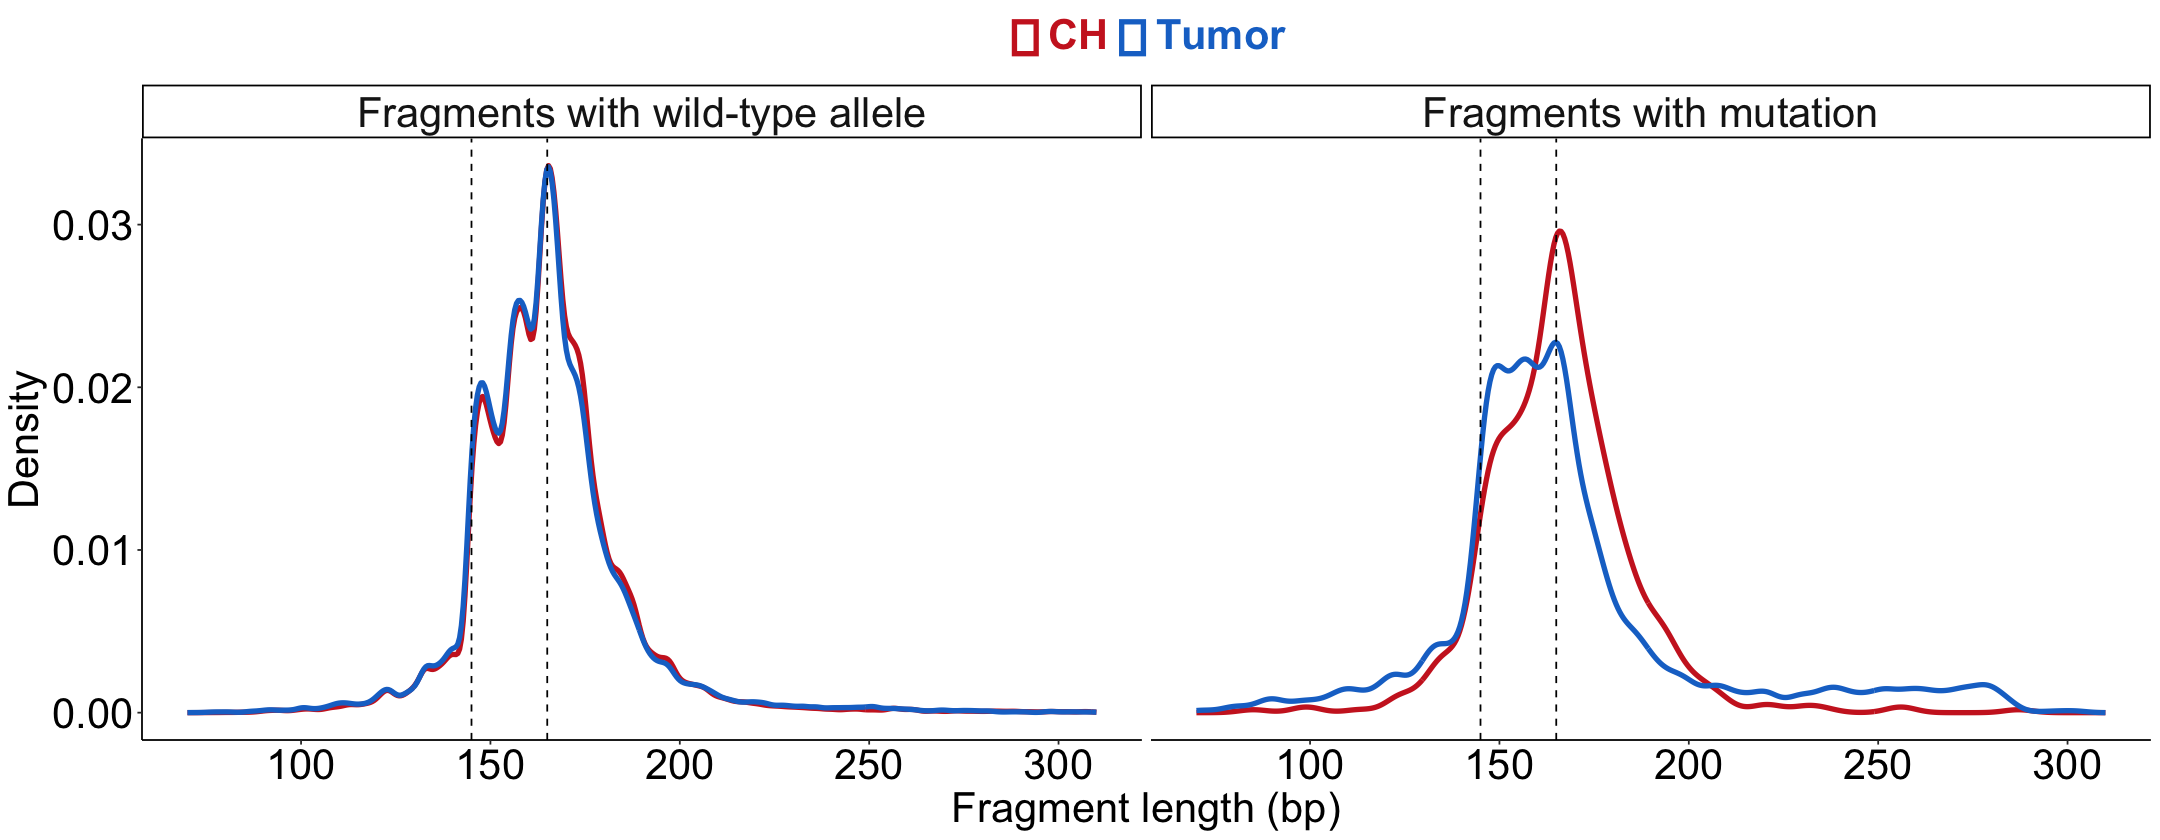

In [34]:
options(repr.plot.width=18, repr.plot.height=7)

library(ggtext)
tmp <- dff
tmp$Fragment_Status_2 <- gsub("MUT","Fragments with mutation",gsub("WT","Fragments with wild-type allele",tmp$Fragment_Status))
tmp$Fragment_Status_2 <- factor(tmp$Fragment_Status_2, levels=c("Fragments with wild-type allele","Fragments with mutation"))

gdens <- ggplot(tmp, aes(x=Fragment_size, color=Final_mutation_source)) + 
geom_density(size=1.5, linetype = "solid") + 
theme_classic() + gtheme(25) + 
xlab("Fragment length (bp)") + 
ylab("Density") + 
geom_vline(xintercept = c(145, 165), linetype='dashed') + 
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) + 
scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) + 
topleg +  nolegtitle + 
theme(legend.text = element_text(face="bold")) + 
theme(legend.text = element_markdown()) +  # allows colored HTML text)
scale_color_manual(values=mycol, labels = c(
      CH = "<span style='color:firebrick3'>CH</span>",
      Tumor = "<span style='color:dodgerblue3'>Tumor</span>"
    )) + 
facet_grid(.~Fragment_Status_2) 
gdens

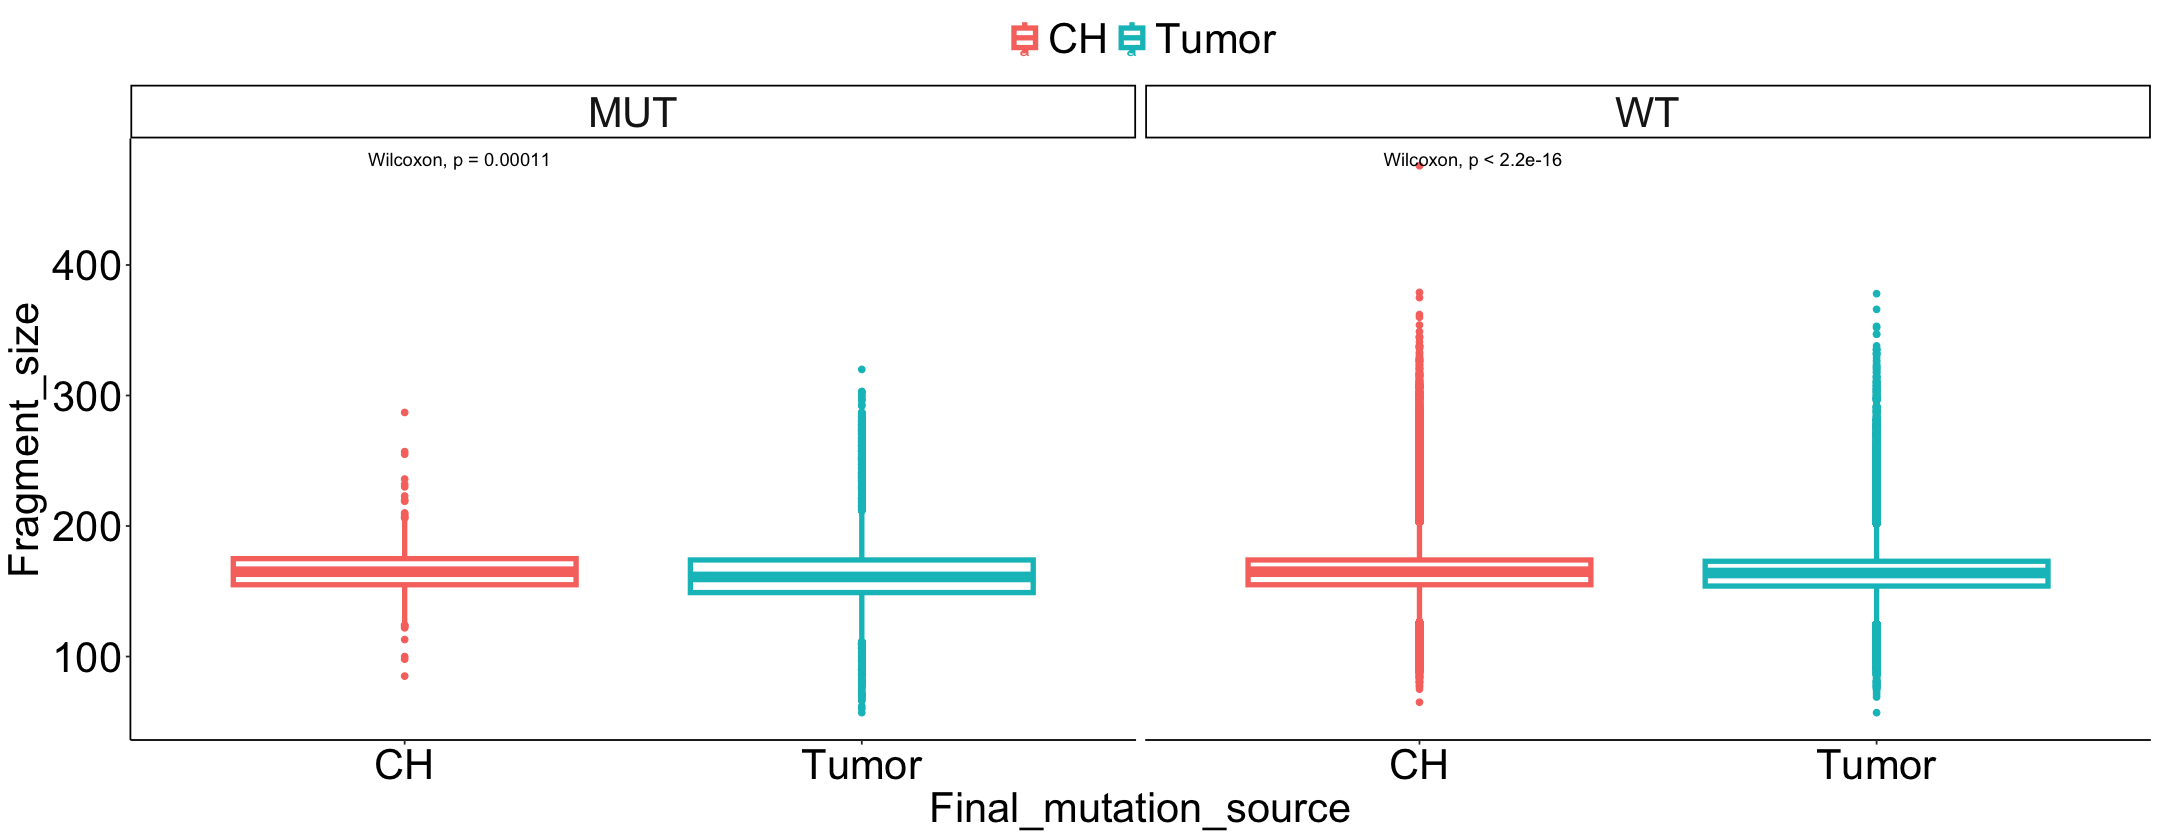

In [35]:
ggplot(dff, aes(y=Fragment_size, x=Final_mutation_source, color=Final_mutation_source)) + 
geom_boxplot(size=1.5, linetype = "solid") + 
theme_classic() + gtheme(25) + 
topleg +  nolegtitle + 
facet_grid(.~Fragment_Status) + stat_compare_means()

In [36]:
wilcox.test(dff[which(dff$Fragment_Status=="WT" & dff$Final_mutation_source=="CH"),]$Fragment_size, 
            dff[which(dff$Fragment_Status=="WT" & dff$Final_mutation_source=="Tumor"),]$Fragment_size, 
            )


	Wilcoxon rank sum test with continuity correction

data:  dff[which(dff$Fragment_Status == "WT" & dff$Final_mutation_source == "CH"), ]$Fragment_size and dff[which(dff$Fragment_Status == "WT" & dff$Final_mutation_source == "Tumor"), ]$Fragment_size
W = 3185418188, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [37]:
wilcox.test(dff[which(dff$Fragment_Status=="MUT" & dff$Final_mutation_source=="CH"),]$Fragment_size, 
            dff[which(dff$Fragment_Status=="MUT" & dff$Final_mutation_source=="Tumor"),]$Fragment_size, 
            )


	Wilcoxon rank sum test with continuity correction

data:  dff[which(dff$Fragment_Status == "MUT" & dff$Final_mutation_source == "CH"), ]$Fragment_size and dff[which(dff$Fragment_Status == "MUT" & dff$Final_mutation_source == "Tumor"), ]$Fragment_size
W = 2344984, p-value = 0.0001149
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 135977 rows containing non-finite outside the scale range (`stat_density()`).”


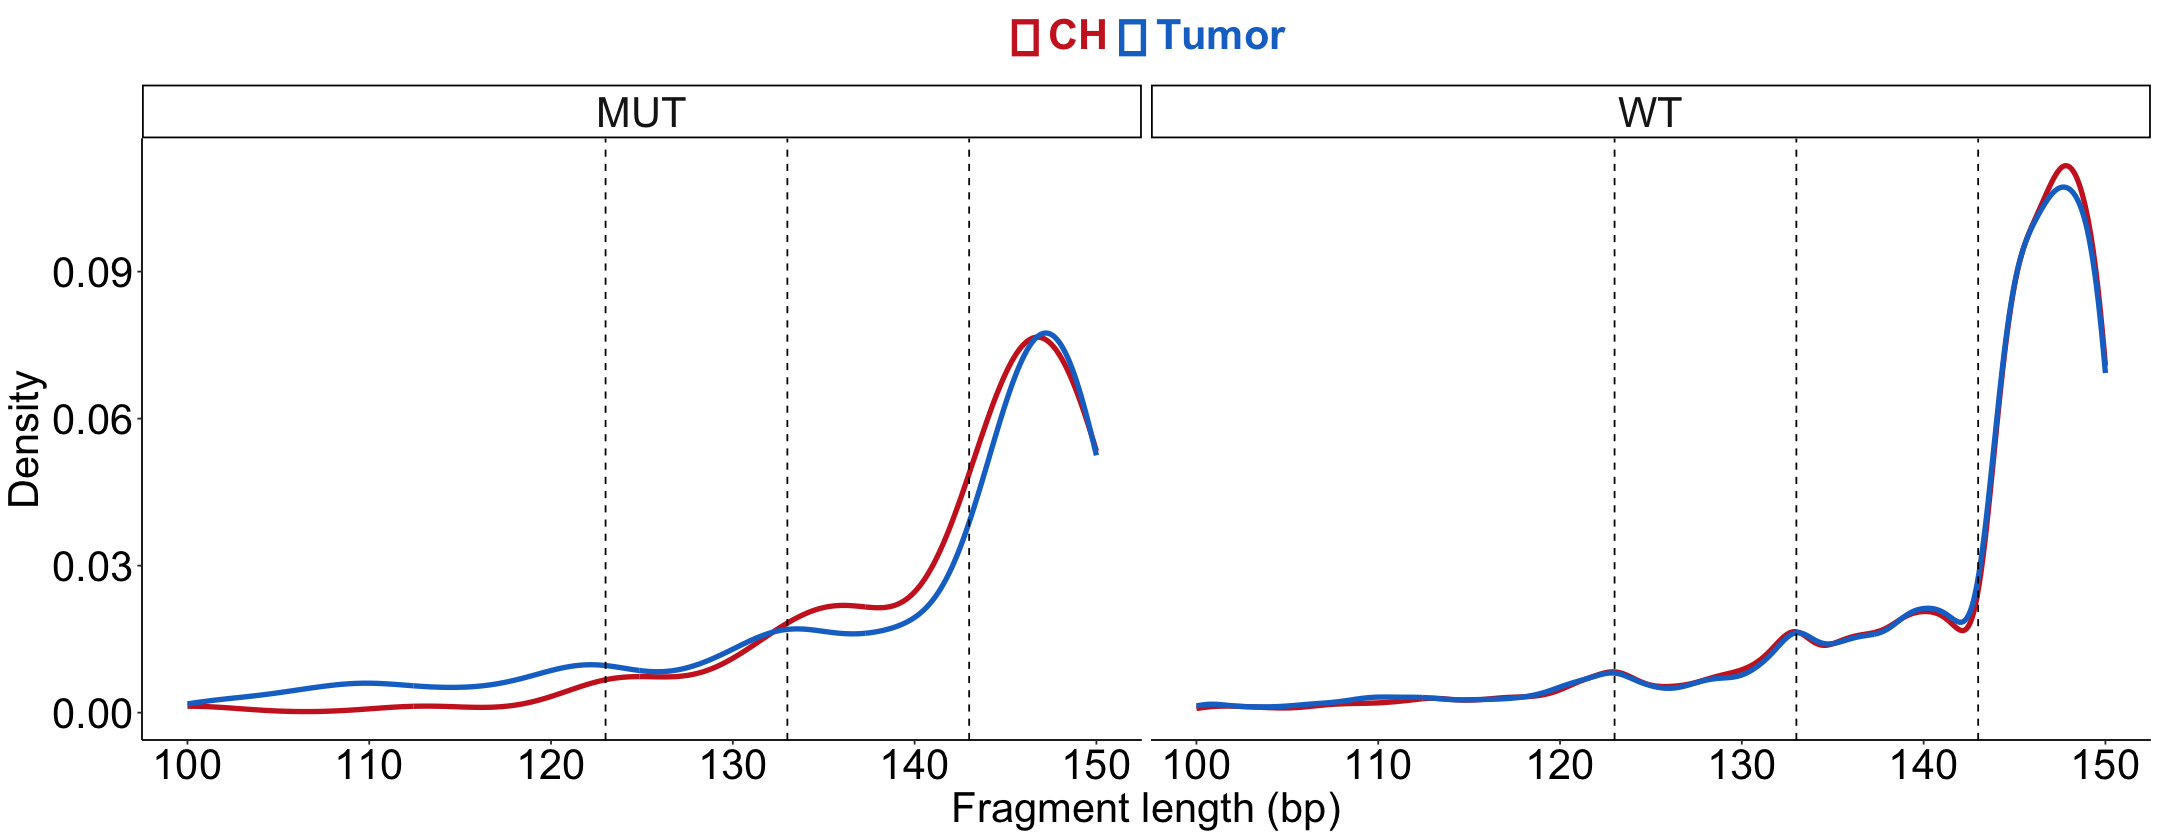

In [38]:
options(repr.plot.width=18, repr.plot.height=7)
ggplot(dff, aes(x=Fragment_size, color=Final_mutation_source)) + 
geom_density(size=1.5, linetype = "solid") + 
theme_classic() + gtheme(25) + 
xlab("Fragment length (bp)") + 
ylab("Density") + 
geom_vline(xintercept = c(123,133,143), linetype='dashed') + 
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) + 
scale_x_continuous(limits=c(100,150), breaks=c(100, 110, 120, 130, 140, 150), guide = guide_axis(n.dodge = 1)) + 
topleg +  nolegtitle + 
theme(legend.text = element_text(face="bold")) + 
theme(legend.text = element_markdown()) +  # allows colored HTML text)
scale_color_manual(values=mycol, labels = c(
      CH = "<span style='color:firebrick3'>CH</span>",
      Tumor = "<span style='color:dodgerblue3'>Tumor</span>"
    )) + 
facet_grid(.~Fragment_Status) 

Warning message:
“Removed 105 rows containing non-finite outside the scale range (`stat_density()`).”


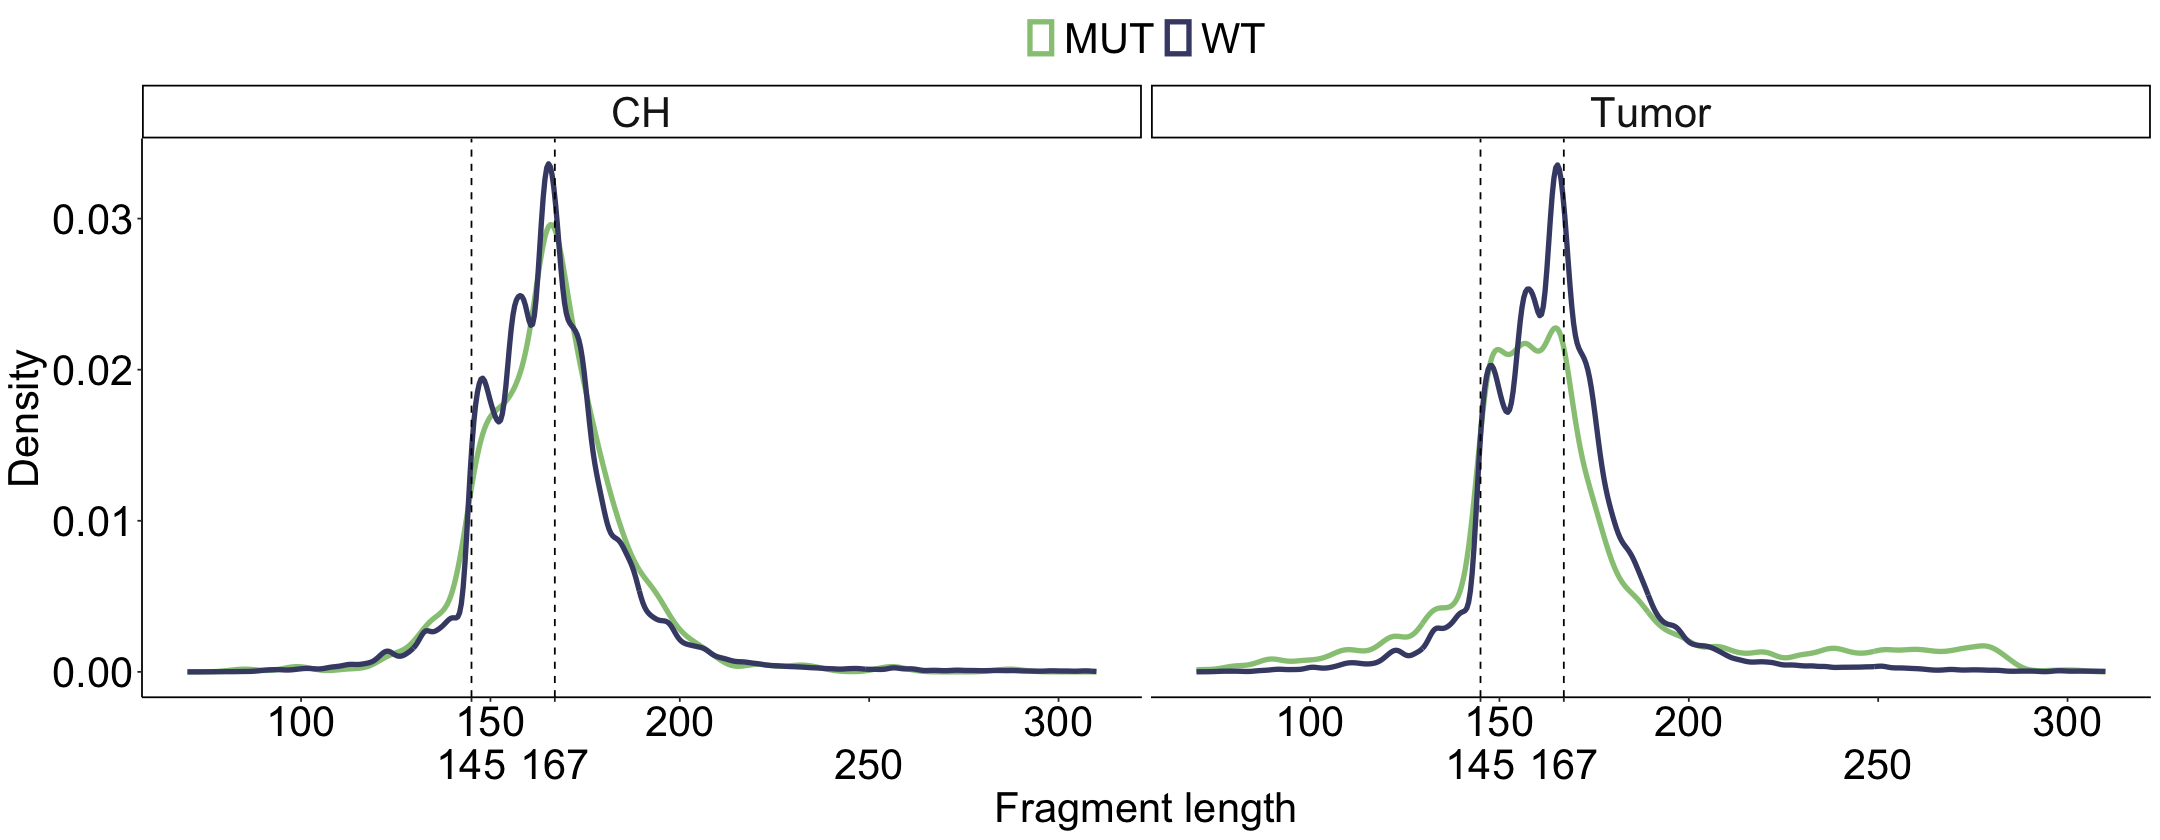

In [39]:
ggplot(dff, aes(x=Fragment_size, color=Fragment_Status)) + 
geom_density(size=1.5) +
theme_classic() + gtheme(25) +
xlab("Fragment length") +
ylab("Density") +
geom_vline(xintercept = c(145, 167), linetype='dashed') +
scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) +
topleg +  nolegtitle + 
scale_color_manual(values=derain[c(2,7)]) + facet_grid(.~Final_mutation_source)

# Manual Density to shade area

In [112]:
table(tmp$Fragment_Status, tmp$Final_mutation_source)

     
         CH Tumor
  MUT   593  7222
  WT  93292 66652

Warning message:
“Removed 105 rows containing non-finite outside the scale range (`stat_density()`).”


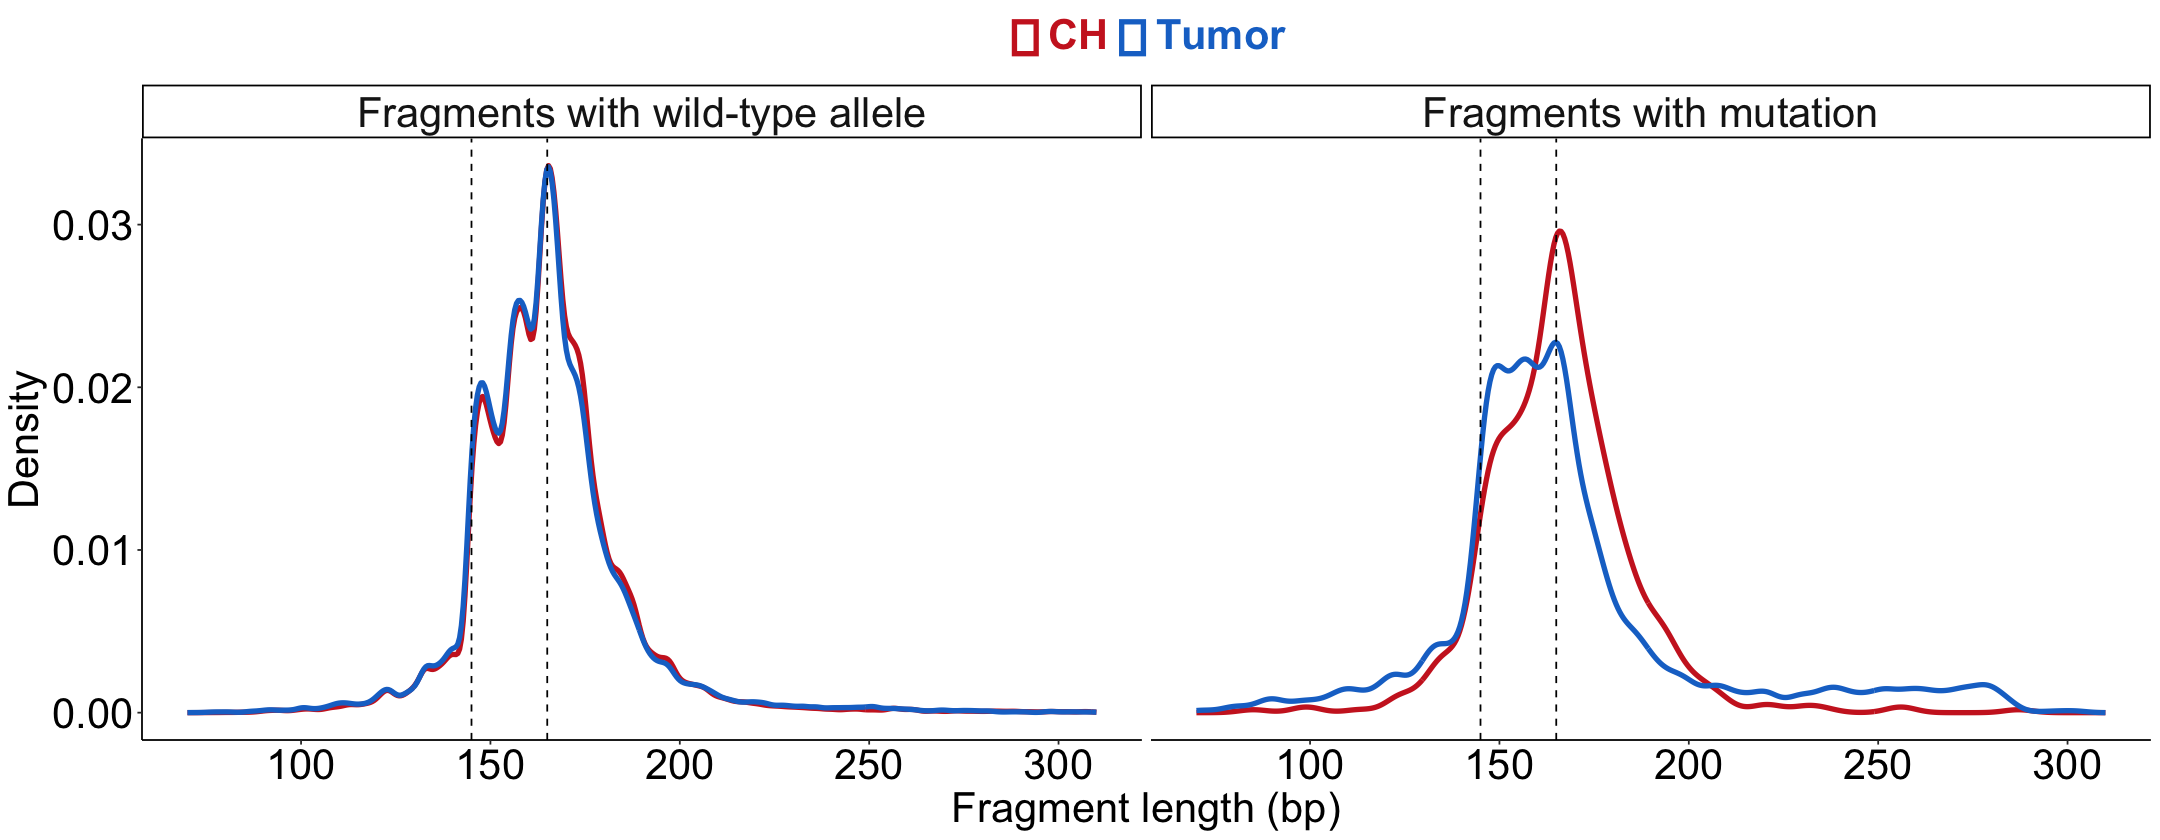

In [111]:
options(repr.plot.width=18, repr.plot.height=7)

library(ggtext)
tmp <- dff
tmp$Fragment_Status_2 <- gsub("MUT","Fragments with mutation",gsub("WT","Fragments with wild-type allele",tmp$Fragment_Status))
tmp$Fragment_Status_2 <- factor(tmp$Fragment_Status_2, levels=c("Fragments with wild-type allele","Fragments with mutation"))

gdens <- ggplot(tmp, aes(x=Fragment_size, color=Final_mutation_source)) + 
geom_density(size=1.5, linetype = "solid") + 
theme_classic() + gtheme(25) + 
xlab("Fragment length (bp)") + 
ylab("Density") + 
geom_vline(xintercept = c(145, 165), linetype='dashed') + 
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) + 
scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) + 
topleg +  nolegtitle + 
theme(legend.text = element_text(face="bold")) + 
theme(legend.text = element_markdown()) +  # allows colored HTML text)
scale_color_manual(values=mycol, labels = c(
      CH = "<span style='color:firebrick3'>CH</span>",
      Tumor = "<span style='color:dodgerblue3'>Tumor</span>"
    )) + 
facet_grid(.~Fragment_Status_2) 
gdens

In [41]:
hmpMUT <- dff %>% filter(dff$Fragment_Status=="MUT")

densCH_mut <- density(hmpMUT$Fragment_size[hmpMUT$Final_mutation_source == "CH"])
densTumor_mut <- density(hmpMUT$Fragment_size[hmpMUT$Final_mutation_source == "Tumor"])
dens_df_mut <- data.frame(
  x = densTumor_mut$x,
  yTumor = densTumor_mut$y,
  yCH = approx(densCH_mut$x, densCH_mut$y, xout = densTumor_mut$x)$y   # interpolate onto same x-grid
)
trapz <- function(x, y) sum( (y[-1] + y[-length(y)]) * diff(x) / 2 )
tmp <- dens_df_mut[!is.na(dens_df_mut$yTumor) & !is.na(dens_df_mut$yCH), ]
gap_area_mut <- trapz(tmp$x, abs(tmp$yTumor - tmp$yCH))
overlap_area_mut <- trapz(tmp$x, pmin(tmp$yTumor, tmp$yCH))
gap_area_mut
overlap_area_mut
# (Sanity check identity)
# overlap_area ≈ 1 - 0.5 * gap_area
1 - 0.5 * gap_area_mut

[1] 0.3999902

[1] 0.7985044

[1] 0.8000049

In [42]:
hmpWT <- dff %>% filter(dff$Fragment_Status=="WT")

densCH_wt <- density(hmpWT$Fragment_size[hmpWT$Final_mutation_source == "CH"])
densTumor_wt <- density(hmpWT$Fragment_size[hmpWT$Final_mutation_source == "Tumor"])
dens_df_wt <- data.frame(
  x = densTumor_wt$x,
  yTumor = densTumor_wt$y,
  yCH = approx(densCH_wt$x, densCH_wt$y, xout = densTumor_wt$x)$y   # interpolate onto same x-grid
)
trapz <- function(x, y) sum( (y[-1] + y[-length(y)]) * diff(x) / 2 )
tmp <- dens_df_wt[!is.na(dens_df_mut$yTumor) & !is.na(dens_df_mut$yCH), ]
gap_area_wt <- trapz(tmp$x, abs(tmp$yTumor - tmp$yCH))
overlap_area_wt <- trapz(tmp$x, pmin(tmp$yTumor, tmp$yCH))
gap_area_wt
overlap_area_wt
# (Sanity check identity)
# overlap_area ≈ 1 - 0.5 * gap_area
1 - 0.5 * gap_area_wt

[1] 0.05245394

[1] 0.9733817

[1] 0.973773

Warning message:
“Removed 13 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 103 rows containing missing values or values outside the scale range (`geom_line()`).”


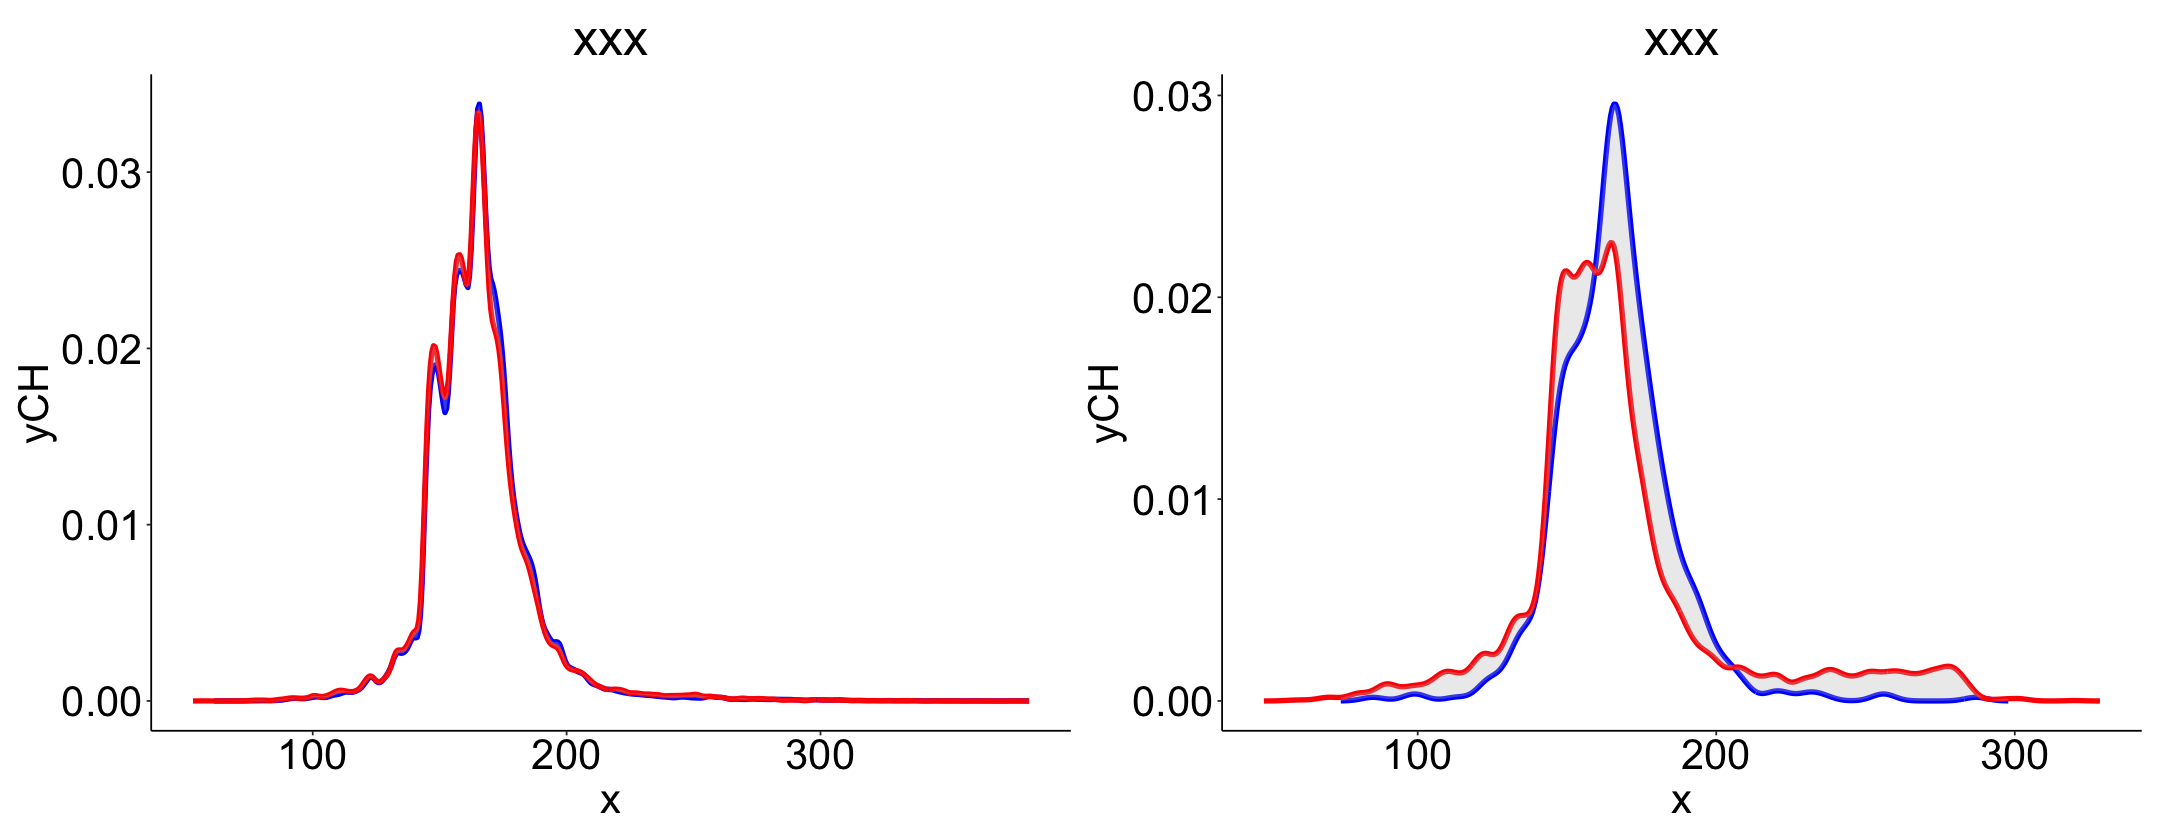

In [43]:
g1 <- ggplot(dens_df_wt, aes(x = x)) +
  geom_line(aes(y = yCH), color = "blue", size=1.5) +
  geom_line(aes(y = yTumor), color = "red", size=1.5) +
  geom_ribbon(aes(ymin = pmin(yCH, yTumor), ymax = pmax(yCH, yTumor)),
              fill = "grey75", alpha = 0.3) + 
  theme_classic() + gtheme(25) + 
ggtitle("xxx") + theme(plot.title = element_text(hjust = 0.5))

g2 <- ggplot(dens_df_mut, aes(x = x)) +
  geom_line(aes(y = yCH), color = "blue", size=1.5) +
  geom_line(aes(y = yTumor), color = "red", size=1.5) +
  geom_ribbon(aes(ymin = pmin(yCH, yTumor), ymax = pmax(yCH, yTumor)),
              fill = "grey75", alpha = 0.3) + 
  theme_classic() + gtheme(25) + 
ggtitle("xxx") + theme(plot.title = element_text(hjust = 0.5))

g1 + g2

Warning message:
“Removed 96 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 74 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 96 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 74 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 96 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 74 rows containing missing values or values outside the scale range (`geom_line()`).”


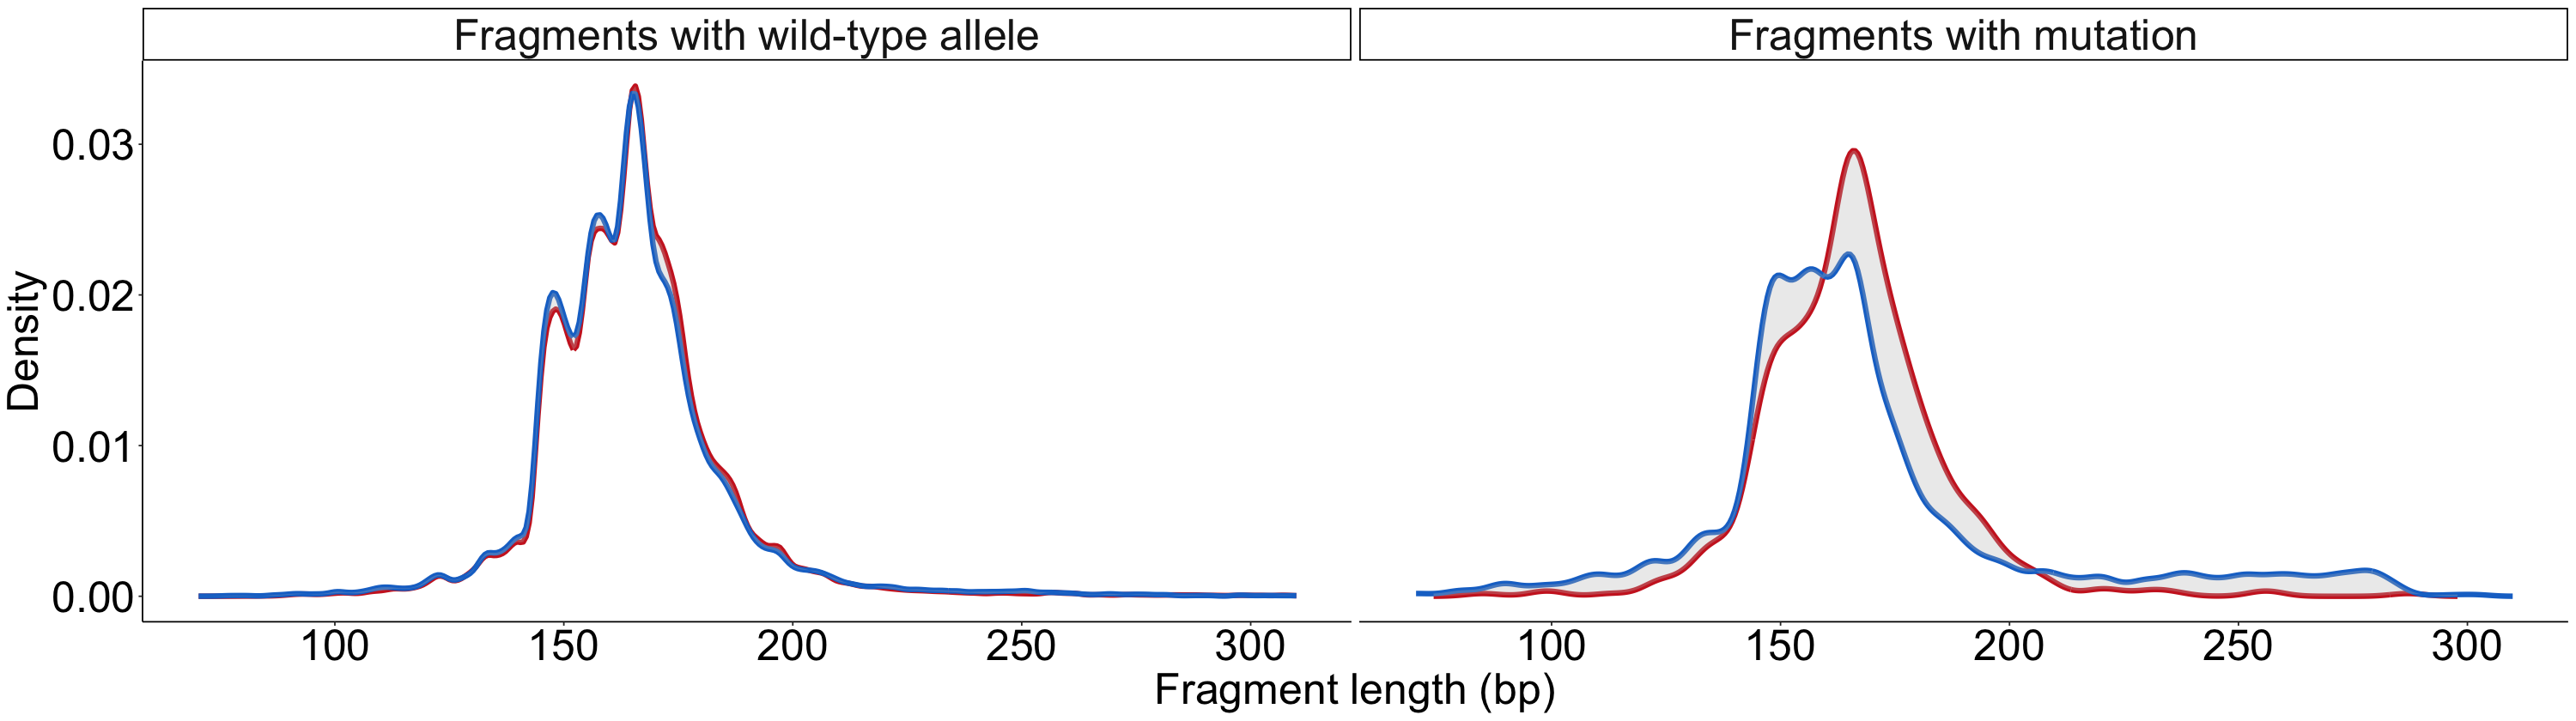

In [48]:
dens_df_wt$status <- "Fragments with wild-type allele"
dens_df_mut$status <- "Fragments with mutation"
dens_df <- rbind(dens_df_wt, dens_df_mut)
dens_df$status <- factor(dens_df$status, levels=c("Fragments with wild-type allele","Fragments with mutation"))

gdens2 <- ggplot(dens_df, aes(x = x)) +
  geom_line(aes(y = yCH), color = mycol[1], size=1.8) +
  geom_line(aes(y = yTumor), color = mycol[2], size=1.8) +
  geom_ribbon(aes(ymin = pmin(yCH, yTumor), ymax = pmax(yCH, yTumor)),
              fill = "grey75", alpha = 0.3) + 
  theme_classic() + gtheme(30) +
  xlab("Fragment length (bp)") +
  ylab("Density") + facet_grid(.~status) + 
  scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1))

options(repr.plot.width=25, repr.plot.height=7)
gdens2
ggsave(gdens2, file="plots/density_ch_tumor.pdf", width=25, height=7)
ggsave(gdens2, file="plots/density_ch_tumor.png", width=25, height=7)

# Size regions enrichement

In [49]:
table(df$Fragment_Status, df$Final_mutation_source)

                                       
                                            CH  Tumor Unknown
  Error_both_read_mut_with_other_alt         7      7      36
  MUT                                      593   7222    8954
  MUT_but_other_read_mut_with_other_alt     10     53      93
  Other_MUT                                 86     60     141
  WT                                     93292  66652  181151
  WT_but_other_read_mut                     26     43      58
  WT_but_other_read_mut_with_other_alt    1191   1092    2625

In [50]:
dmut <- df %>% filter(Fragment_Status=="MUT" & Final_mutation_source%in%c("Tumor","CH"))

For each fragement length, we calculate:
- the proportion of tumor fragments (among all tumor mutant fragements)
- the proportion of CH fragments (among all CH mutant fragements)
- the difference of proportions (difference in normalized counts)

In [51]:
summary(dmut$Fragment_size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   57.0   150.0   162.0   167.5   175.0   320.0 

In [52]:
# Calculate Counts and Props 
dregions <- dmut %>% group_by(Final_mutation_source, Fragment_size, .drop = FALSE) %>% summarise(n=n(), .groups = "drop_last") %>%
mutate(prop=n / sum(n)) %>%
pivot_wider(names_from=Final_mutation_source, values_from=c(n,prop)) %>%
replace(is.na(.), 0)
dregions$diff <- dregions$prop_Tumor -  dregions$prop_CH

In [53]:
head(dregions,3)

Fragment_size n_CH n_Tumor prop_CH     prop_Tumor   diff         
1  85           1    1       0.001686341 0.0001384658 -0.0015478748
2  98           1    6       0.001686341 0.0008307948 -0.0008555458
3 100           1    5       0.001686341 0.0006923290 -0.0009940116

In [54]:
summary(dregions$Fragment_size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   57.0   122.8   180.5   180.6   238.2   320.0 

In [55]:
# Add the missing Fragemnt size between min and max with 0 counts / prop
xall <- min(dregions$Fragment_size):max(dregions$Fragment_size)
xmissing <- xall[!xall %in% dregions$Fragment_size]
dadd <- data.frame(
    Fragment_size = xmissing,
    n_CH = 0,
    n_Tumor = 0,
    prop_CH = 0,
    prop_Tumor = 0,
    diff = 0
)
dregions2 <- rbind(dregions, dadd)

In [56]:
myrange <- 70:310
tmp <- dregions2[which(dregions2$Fragment_size>=myrange[1] & dregions2$Fragment_size<=myrange[length(myrange)]) , ]
lfit <- loess(tmp$diff ~ tmp$Fragment_size, span=0.3)
lpred <- predict(lfit, myrange, se=T)
borninf <- lpred$fit - qt(0.975, lpred$df)*lpred$se.fit
bornsup <- lpred$fit + qt(0.975, lpred$df)*lpred$se.fit

cat("95% CI inf is above 0:")
myrange[borninf>0]
cat("95% CI supp is below 0:")
myrange[bornsup<0]

95% CI inf is above 0:

[1] 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
[20] 151 152 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274

95% CI supp is below 0:

[1] 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
[20] 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 23 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 23 rows containing missing values or values outside the scale range (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 23 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 23 rows containing missing values or values outside the scale range (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 23 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 23 rows containing missing values or values outside the scale range (`geom_point()`).”


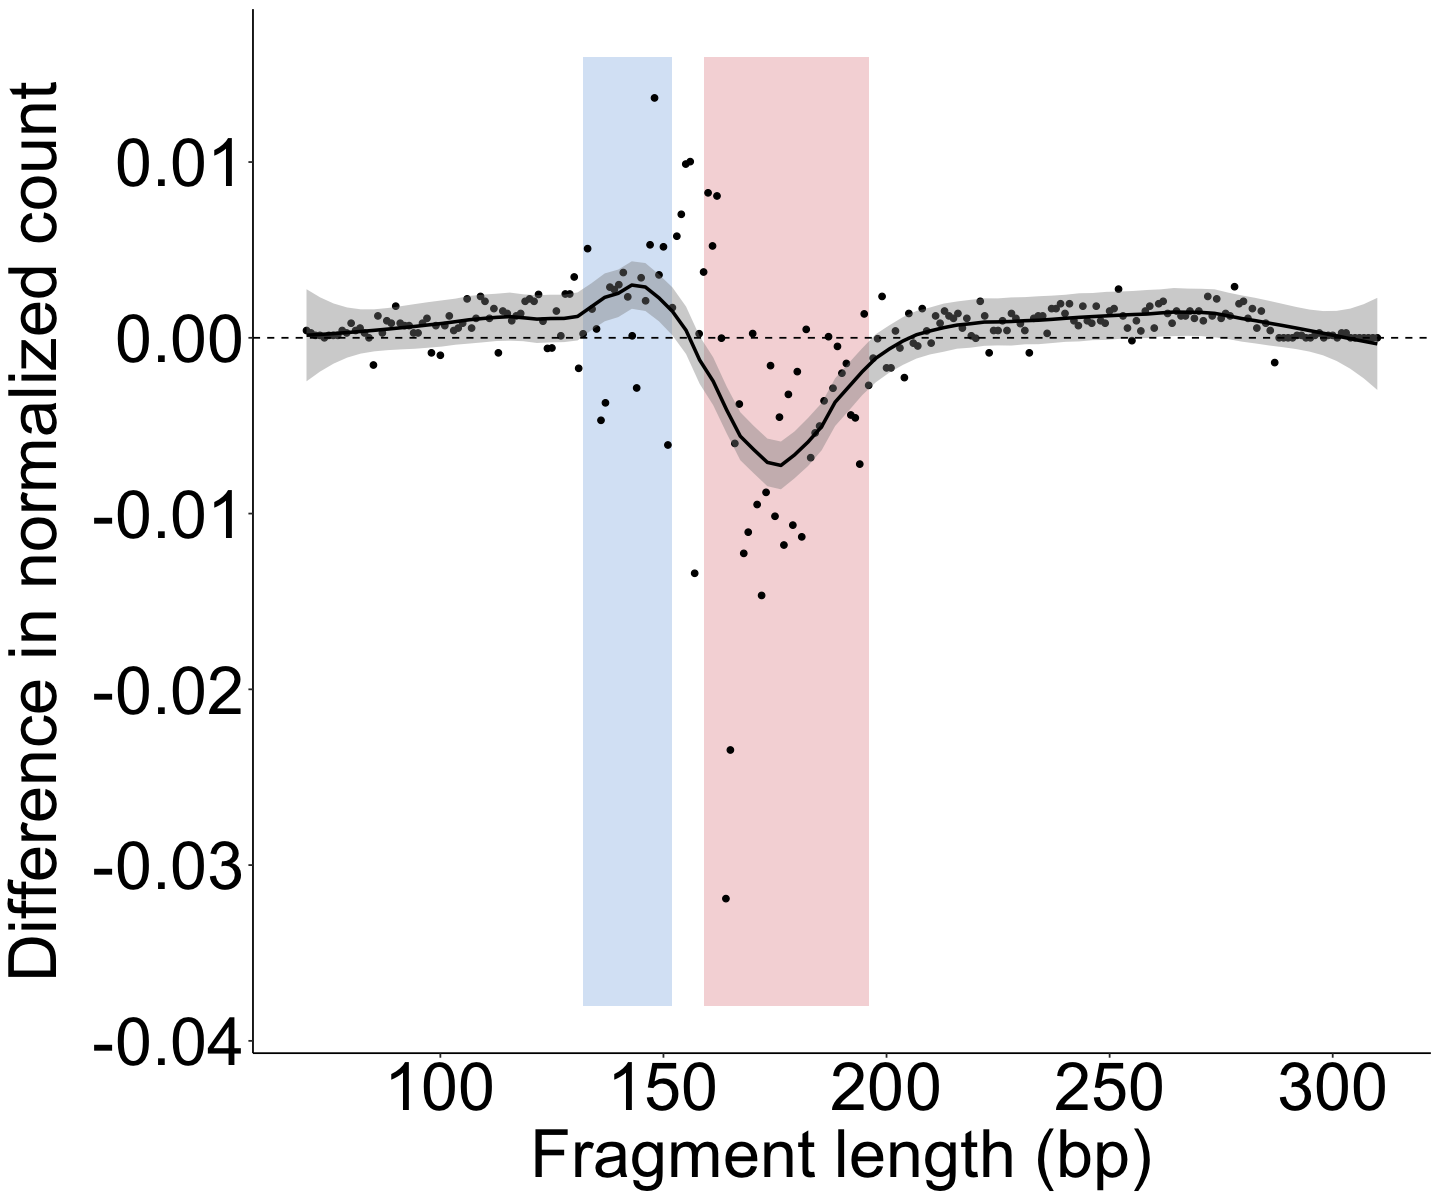

In [58]:
options(repr.plot.width=12,repr.plot.height=10)

gsize <- ggplot(dregions2, aes(x = Fragment_size, y=diff)) +
  annotate("rect", xmin=132, xmax=152, ymin=-0.038, ymax=0.016, fill ='dodgerblue3', alpha=0.2) + 
  annotate("rect", xmin = 159, xmax = 196, ymin = -0.038, ymax = 0.016, fill ='firebrick3', alpha = 0.2) + 
  geom_point(size=1.5) +
  geom_smooth(method="loess", span=0.3, color="black", level=0.95, fill="grey55") + 
  geom_hline(yintercept=0, linetype="dashed", size=0.5) + 
  theme_classic() + gtheme(40) + 
  #scale_x_continuous(limits=c(100,170), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) + 
  scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) + 
  xlab("Fragment length (bp)") +
  ylab("Difference in normalized count")
gsize
ggsave(gsize, file="plots/sizesmooth_ch_tumor.pdf", width=12, height=10)
ggsave(gsize, file="plots/sizesmooth_ch_tumor.png", width=12, height=10)

## try with a rolling window (later)

In [322]:
library(runner)

In [341]:
if (1==0) {
w <- 10

df_roll <- dmut %>%
  arrange(Fragment_size) %>%
  mutate(one = 1L) %>%
  group_by(Final_mutation_source, Fragment_size) %>%  # <-- your two factor variables here
  mutate(n_window = runner(
    x = one,
    idx = Fragment_size,        # numeric index
    k = w,             # window width in *size* units
    f = function(z) sum(z),
    na_pad = TRUE
  )) #%>%
  #ungroup()
}

In [417]:
windowsize <- 3
allrange <- 70:320

dmut_Tumor <- dmut %>% filter(Final_mutation_source=="Tumor")
dmut_CH <- dmut %>% filter(Final_mutation_source=="CH")

lres <- lapply(allrange, FUN=function(i) {
    windowmin <- (i-windowsize)
    windowmax <- (i+windowsize)
    n_CH <- sum(dmut_CH$Fragment_size >= windowmin & dmut_CH$Fragment_size <= windowmax)
    n_Tumor <- sum(dmut_Tumor$Fragment_size >= windowmin & dmut_Tumor$Fragment_size <= windowmax)
    dres <- data.frame(Fragment_size = i,
               n_CH = n_CH,
               n_Tumor = n_Tumor,
               prop_CH = n_CH/nrow(dmut_CH),
               prop_Tumor = n_Tumor/nrow(dmut_Tumor)
              )
    return(dres)
})
dregions3 <- do.call("rbind", lres)
dregions3$diff <- dregions3$prop_Tumor -  dregions3$prop_CH

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range (`geom_point()`).”


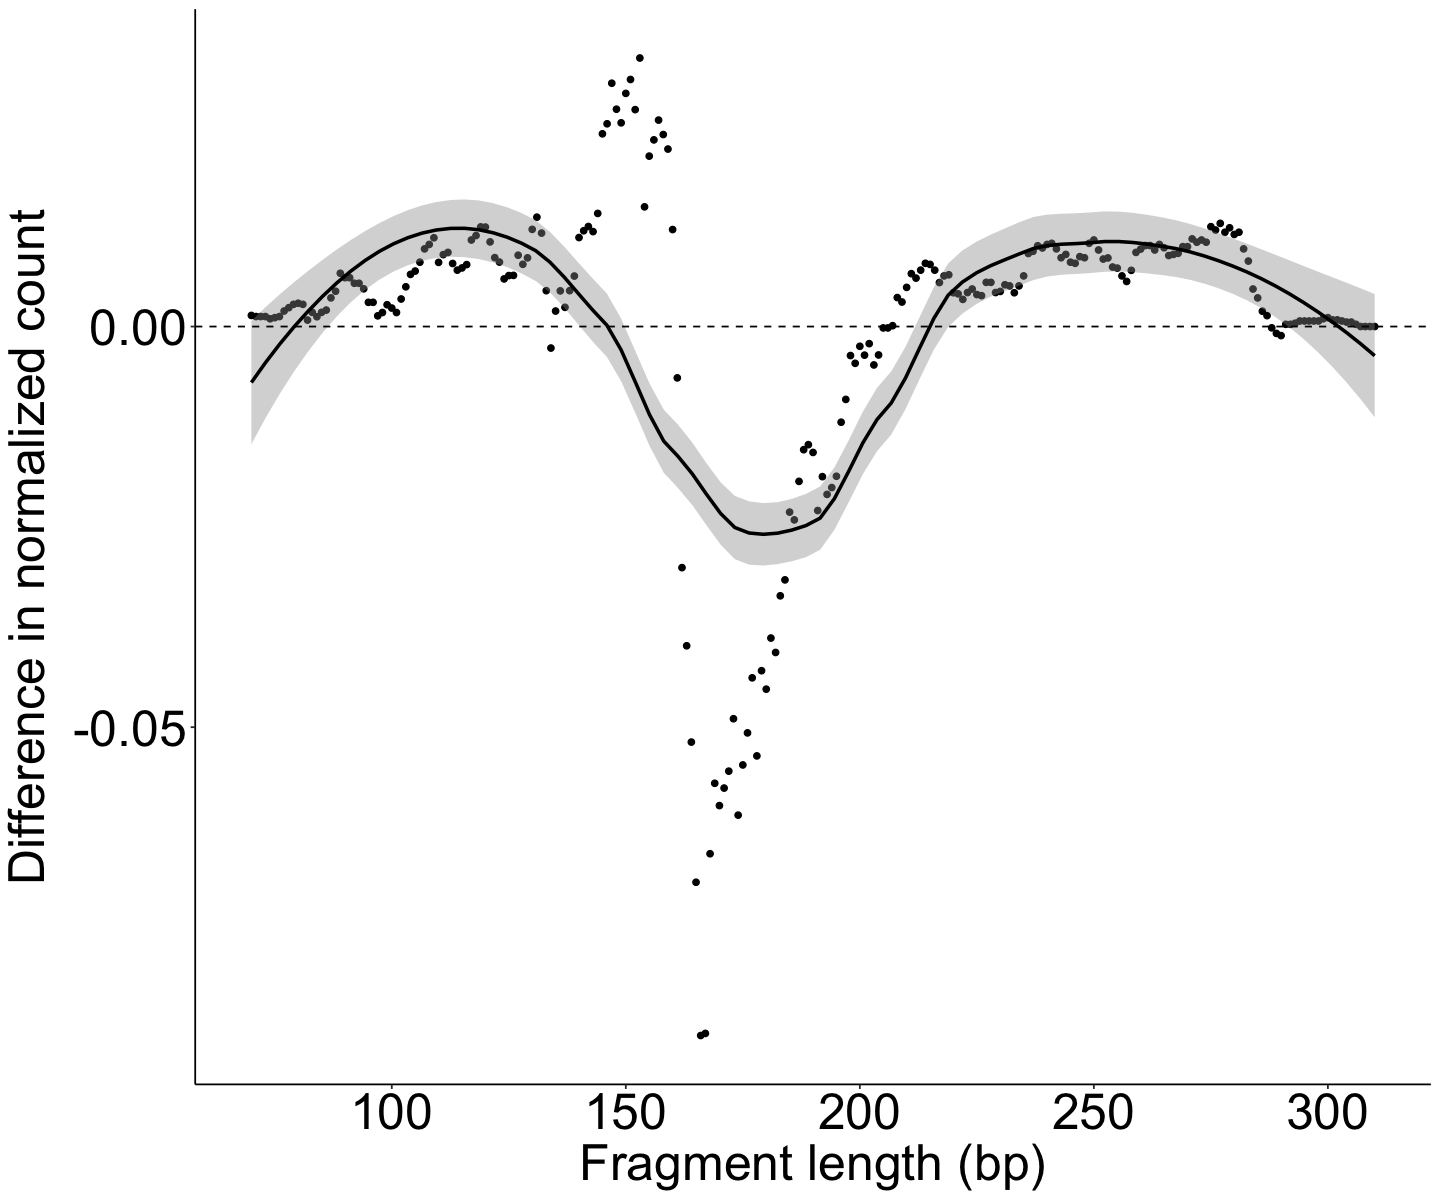

In [418]:
options(repr.plot.width=12,repr.plot.height=10)
#options(repr.plot.width=20,repr.plot.height=10)

ggplot(dregions3, aes(x = Fragment_size, y=diff)) +
  #annotate("rect", xmin=144, xmax=158, ymin=-0.038, ymax=0.016, fill ='dodgerblue3', alpha=0.4) + 
  #annotate("rect", xmin = 165, xmax = 181, ymin = -0.038, ymax = 0.016, fill ='firebrick3', alpha = 0.4) + 
  #annotate("rect", xmin=132, xmax=152, ymin=-0.038, ymax=0.016, fill ='dodgerblue3', alpha=0.1) + 
  #annotate("rect", xmin = 159, xmax = 196, ymin = -0.038, ymax = 0.016, fill ='firebrick3', alpha = 0.1) + 
  geom_point() +
  geom_smooth(method="loess", span=0.6, color="black") + 
  #geom_smooth(color="black") + 
  geom_hline(yintercept=0, linetype="dashed", size=0.5) + 
  theme_classic() + gtheme(30) + 
  #scale_x_continuous(limits=c(100,170), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) + 
  scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) + 
  xlab("Fragment length (bp)") +
  ylab("Difference in normalized count")

# Patient Level Tumor vs. CH

Make features at the patient level
* Proportion of fragments below 150 etc
* Other features?

In [59]:
dim(dmut)

[1] 7815   46

In [60]:
dprop <- dmut %>% group_by(Sample_Id, Final_mutation_source) %>%
summarize(n_frag=n(), n_150=sum(Fragment_size<=150),
          n_150_200=sum(Fragment_size>150 & Fragment_size<200),
          n_200=sum(Fragment_size>=200),
          n_230=sum(Fragment_size>=230)
         )
dprop$prop_150 <- dprop$n_150 / dprop$n_frag
dprop$prop_150_200 <- dprop$n_150_200 / dprop$n_frag
dprop$prop_200 <- dprop$n_200 / dprop$n_frag
dprop$prop_230 <- dprop$n_200 / dprop$n_frag

`summarise()` has grouped output by 'Sample_Id'. You can override using the `.groups` argument.


In [61]:
dlprop <- dprop[,-c(3:6)] %>%
pivot_longer(cols=c(prop_150, prop_150_200, prop_200), names_to = "size", values_to = "prop")

head(dlprop)

Sample_Id      Final_mutation_source n_230 prop_230   size         prop      
1 ORD-1014010-01 Tumor                 20    0.19811321 prop_150     0.23584906
2 ORD-1014010-01 Tumor                 20    0.19811321 prop_150_200 0.56603774
3 ORD-1014010-01 Tumor                 20    0.19811321 prop_200     0.19811321
4 ORD-1016181-01 CH                     2    0.04347826 prop_150     0.19875776
5 ORD-1016181-01 CH                     2    0.04347826 prop_150_200 0.75776398
6 ORD-1016181-01 CH                     2    0.04347826 prop_200     0.04347826

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


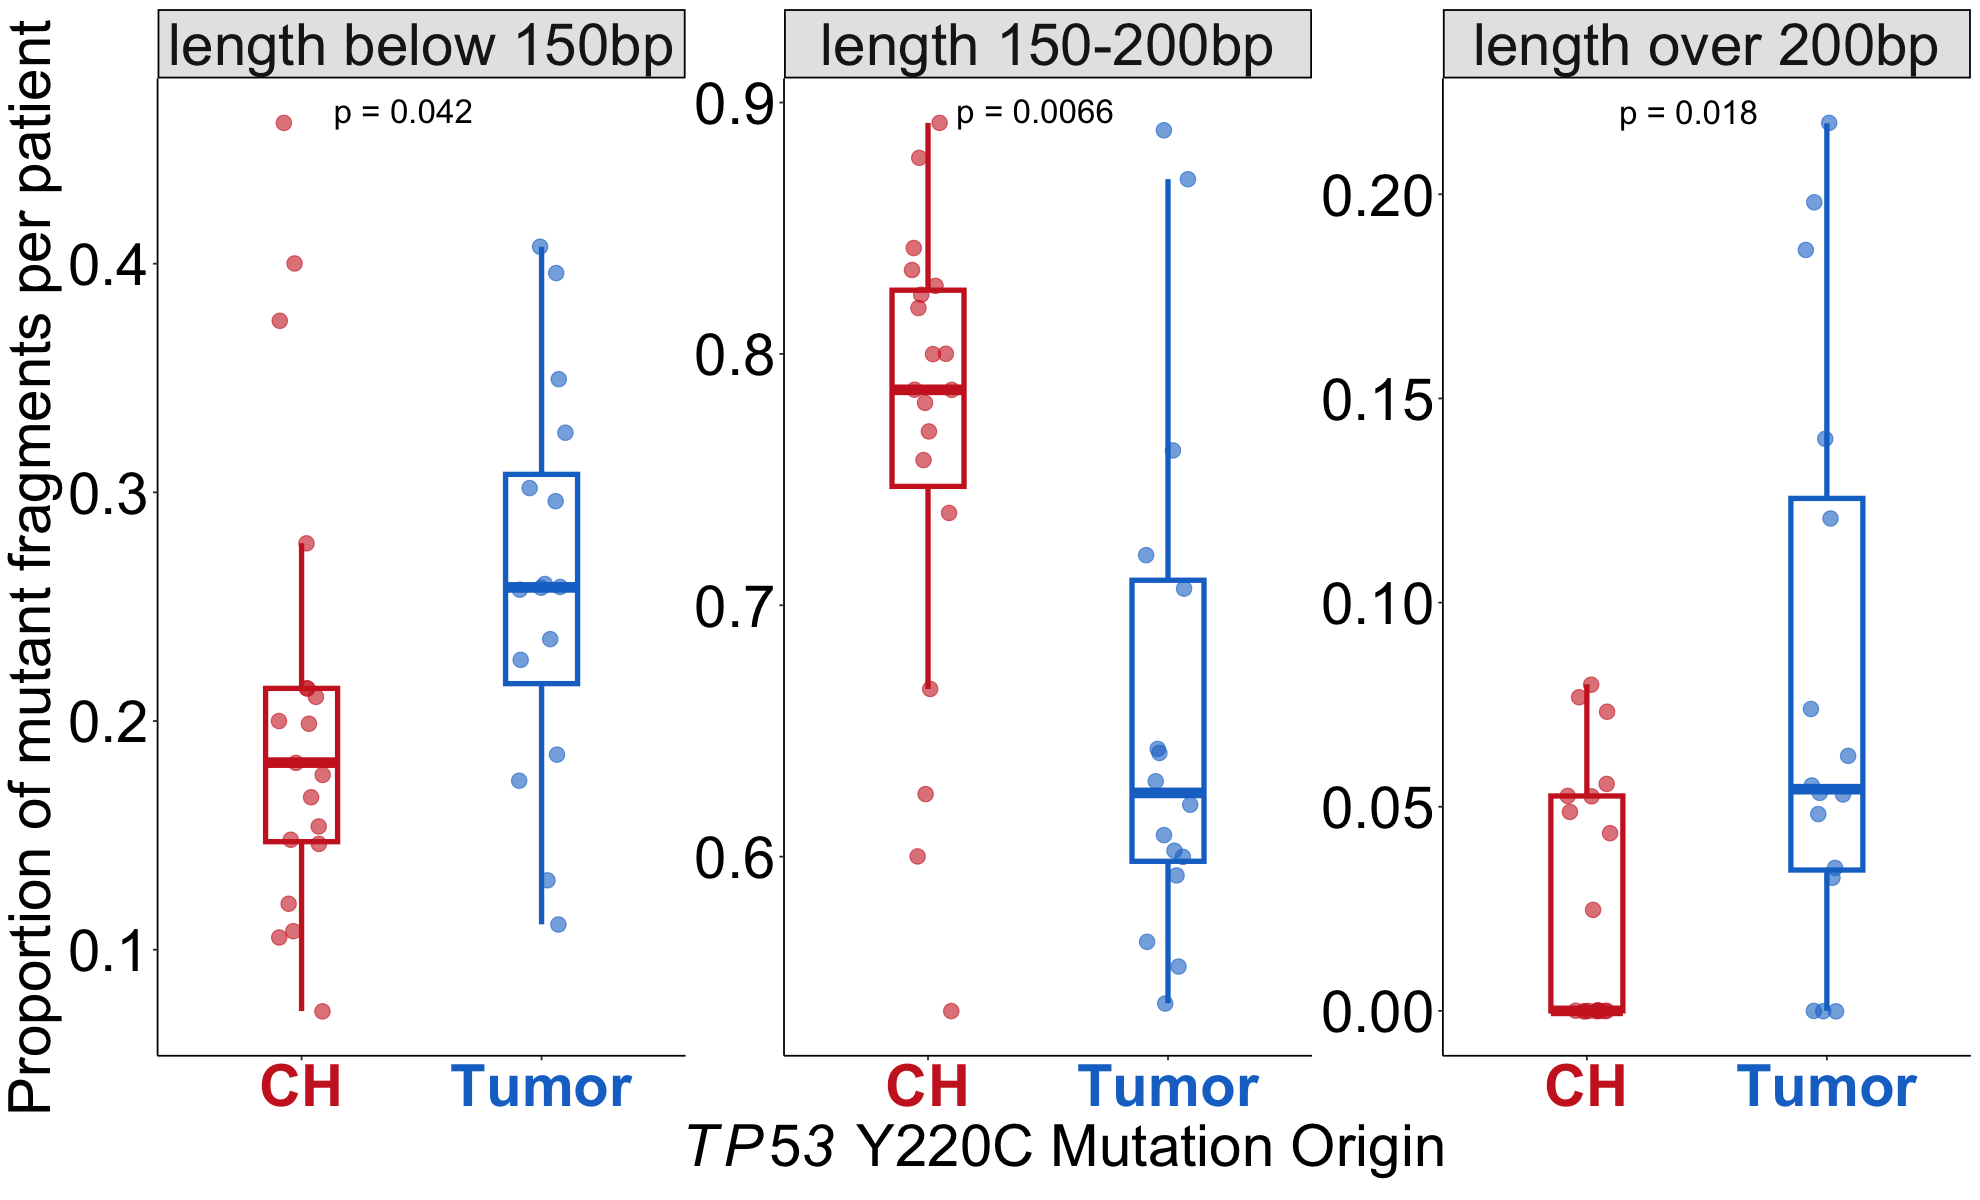

In [62]:
options(repr.plot.width=16.5,repr.plot.height=10)

dlprop$facet <- "length below 150bp"
dlprop$facet[dlprop$size=="prop_150_200"] <- "length 150-200bp"
dlprop$facet[dlprop$size=="prop_200"] <- "length over 200bp"
dlprop$facet <- factor(dlprop$facet, levels=c("length below 150bp","length 150-200bp","length over 200bp"))

ggplot(dlprop,aes(x=Final_mutation_source, y=prop, colour=Final_mutation_source)) + 
geom_boxplot(outlier.shape = NA, width=.3, size=1.5) + 
geom_jitter(size=4, width = .1, alpha=.6) + 
theme_classic() + gtheme(35) + 
facet_wrap(.~facet, scales="free") + 
stat_compare_means(size=7, label.y.npc = 1, label.x.npc = .25, aes(label = sprintf("p = %s", after_stat(p.format)))) + 
theme(axis.text.x = element_text(colour = mycol, face="bold")) + 
noleg + 
scale_color_manual(values=mycol) +
ylab("Proportion of mutant fragments per patient") + 
xlab(expression(paste(italic(TP53)," Y220C Mutation Origin"))) + 
theme(strip.background =element_rect(fill="grey90"))

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


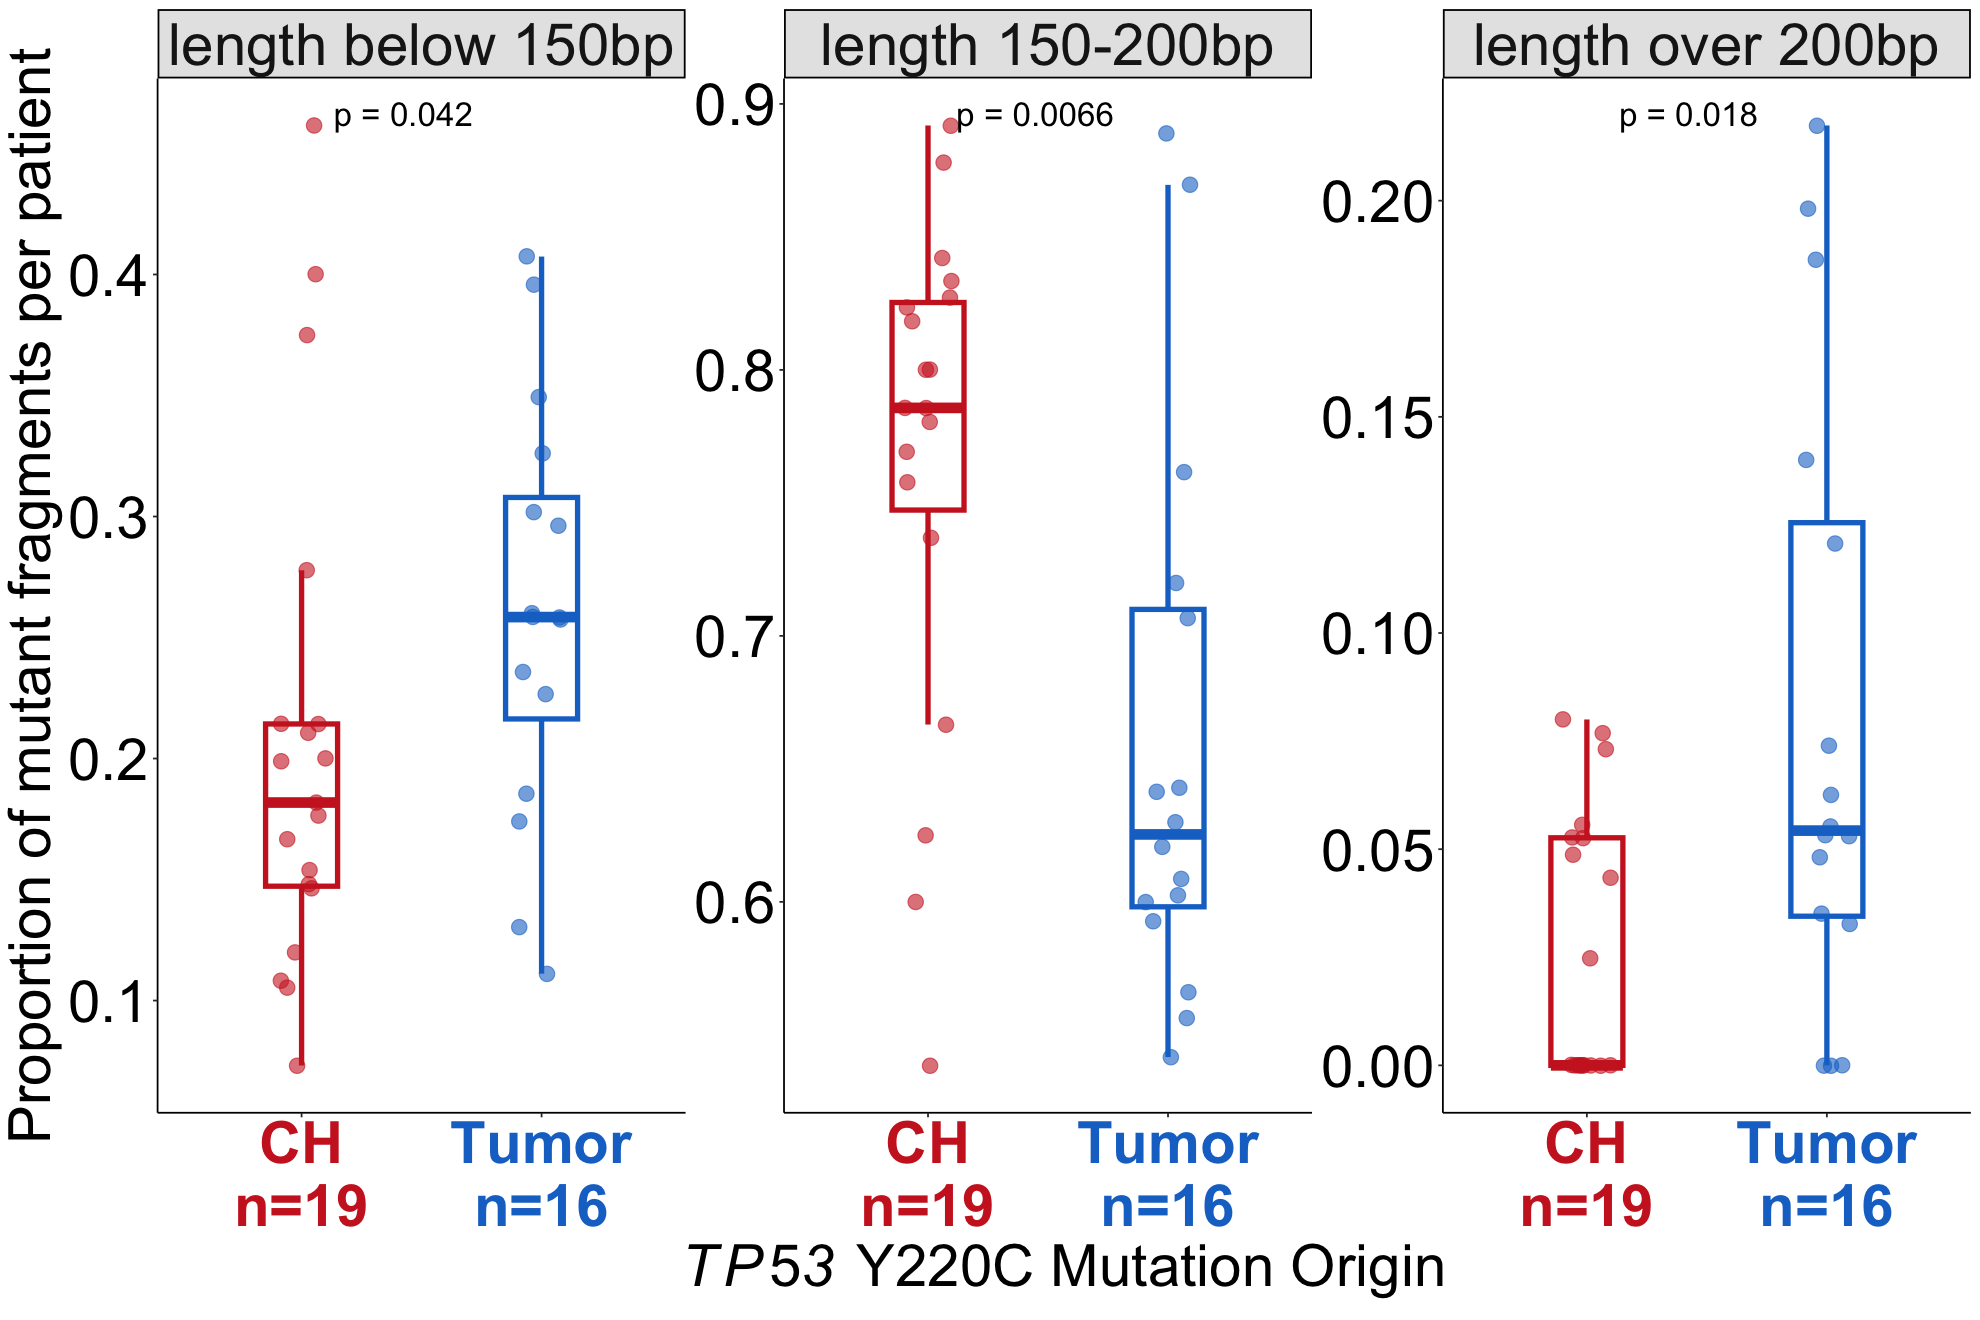

In [63]:
options(repr.plot.width=16.5,repr.plot.height=11)

dlprop$facet <- "length below 150bp"
dlprop$facet[dlprop$size=="prop_150_200"] <- "length 150-200bp"
dlprop$facet[dlprop$size=="prop_200"] <- "length over 200bp"
dlprop$facet <- factor(dlprop$facet, levels=c("length below 150bp","length 150-200bp","length over 200bp"))

gprop <- ggplot(dlprop,aes(x=Final_mutation_source, y=prop, colour=Final_mutation_source)) + 
geom_boxplot(outlier.shape = NA, width=.3, size=1.5) + 
geom_jitter(size=4, width = .1, alpha=.6) + 
theme_classic() + gtheme(35) + 
facet_wrap(.~facet, scales="free") + 
stat_compare_means(size=7, label.y.npc = 1, label.x.npc = .25, aes(label = sprintf("p = %s", after_stat(p.format)))) + 
scale_x_discrete(labels=c("CH\nn=19","Tumor\nn=16")) + 
theme(axis.text.x = element_text(colour = mycol, face="bold")) + 
noleg + 
scale_color_manual(values=mycol) +
ylab("Proportion of mutant fragments per patient") + 
xlab(expression(paste(italic(TP53)," Y220C Mutation Origin"))) + 
theme(strip.background =element_rect(fill="grey90"))
gprop

ggsave(gprop, file="plots/propsize_ch_tumor.pdf", width=16.5, height=11)
ggsave(gprop, file="plots/propsize_ch_tumor.png", width=16.5, height=11)

# Distance Max Mut Peak and 167 / Max Mut WT Peaks

In [64]:
dd.select <- dd %>% filter(Final_mutation_source %in% c("CH","Tumor"))

In [65]:
table(dff$Fragment_Status, dff$Final_mutation_source)

     
         CH Tumor
  MUT   593  7222
  WT  93292 66652

In [66]:
trapz <- function(x, y) sum( (y[-1] + y[-length(y)]) * diff(x) / 2 )
lrespeak <- lapply(dd.select$samples_ID, FUN=function(ord) {
    ww <- dff %>% filter(Sample_Id == ord)
    nmut <- sum(ww$Fragment_Status=="MUT")
    nwt <- sum(ww$Fragment_Status=="WT")

    densmut <- density(ww[ww$Fragment_Status=="MUT",]$Fragment_size)
    maxmut <- densmut$x[which.max(densmut$y)]
    denswt <- density(ww[ww$Fragment_Status=="WT",]$Fragment_size)
    maxwt <- denswt$x[which.max(denswt$y)]

    dens_df <- data.frame(
        x = denswt$x,
        y = denswt$y,
        yy = approx(densmut$x, densmut$y, xout = denswt$x)$y   # interpolate onto same x-grid
    )
    tmp <- dens_df[!is.na(dens_df$y) & !is.na(dens_df$yy), ]
    gap_area <- trapz(tmp$x, abs(tmp$y - tmp$yy))
    overlap_area <- trapz(tmp$x, pmin(tmp$y, tmp$yy))
    dres <- data.frame(sample=ord, n_mut=nmut, n_wt=nwt, peak_mut=maxmut, peak_wt=maxwt, gap=gap_area, overlap=overlap_area)
    return(dres)
})
drespeak <- do.call("rbind",lrespeak)

In [67]:
head(drespeak,3)

sample         n_mut n_wt peak_mut peak_wt  gap       overlap  
1 ORD-1014010-01 106   1632 158.6660 166.3962 0.4454024 0.7765453
2 ORD-1016181-01 161   3988 166.9185 166.2591 0.1516053 0.9237243
3 ORD-1110419-01  58   3575 154.7055 165.3076 0.3461532 0.8267282

In [68]:
tt <- left_join(drespeak, dd[,c("samples_ID","Final_mutation_source")], by=c("sample"="samples_ID"))
tt <- tt %>% filter(n_mut>=10)
table(tt$Final_mutation_source)

gpeakmut <- ggplot(tt,aes(x=Final_mutation_source,
                       y=peak_mut,
                       #y=(peak_wt - peak_mut), 
                       colour=Final_mutation_source)) + 
geom_violin(alpha=.3, aes(fill=Final_mutation_source)) + 
geom_boxplot(outlier.shape = NA, width=.1, size=1, fill="white") +
#geom_boxplot(outlier.shape = NA, width=.3, size=1.5) + 
geom_jitter(size=4, width = .1, alpha=.6) + 
theme_classic() + gtheme(35) + 
stat_compare_means(size=7, label.y.npc = 1, label.x.npc = .3) +
theme(axis.text.x = element_text(colour = mycol, face="bold")) + 
noleg + 
scale_color_manual(values=mycol) + scale_fill_manual(values=mycol) + 
scale_x_discrete(labels=c("CH\nn=17","Tumor\nn=15")) + 
ylab("Size Distribution Peak (bp)") + 
xlab(expression(paste(italic(TP53)," Y220C Mutation Origin"))) +
facet_grid(.~"Mutant Fragments") + theme(strip.background =element_rect(fill="grey90"))

gpeakwt<- ggplot(tt,aes(x=Final_mutation_source,
                       y=peak_wt,
                       #y=(peak_wt - peak_mut), 
                       colour=Final_mutation_source)) + 
geom_violin(alpha=.3, aes(fill=Final_mutation_source)) + 
geom_boxplot(outlier.shape = NA, width=.1, size=1, fill="white") +
#geom_boxplot(outlier.shape = NA, width=.3, size=1.5) + 
geom_jitter(size=4, width = .1, alpha=.6) + 
theme_classic() + gtheme(35) + 
stat_compare_means(size=7, label.y.npc = 1, label.x.npc = .3) +
theme(axis.text.x = element_text(colour = mycol, face="bold")) + 
noleg + 
scale_color_manual(values=mycol) + scale_fill_manual(values=mycol) + 
scale_x_discrete(labels=c("CH\nn=17","Tumor\nn=15")) + 
ylab("Wild-Type Fragment\nSize Distribution Peak (bp)") + 
xlab(expression(paste(italic(TP53)," Y220C Mutation Origin"))) +
facet_grid(.~"Wild-type Fragments") + theme(strip.background =element_rect(fill="grey90"))

options(repr.plot.width=16,repr.plot.height=10)
#gpeakmut + gpeakwt


   CH Tumor 
   17    15 

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [69]:
summary(tt$n_mut)
summary(tt$n_wt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   17.75   41.00  243.50   85.25 3387.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1632    3376    4320    4442    5758    7744 

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


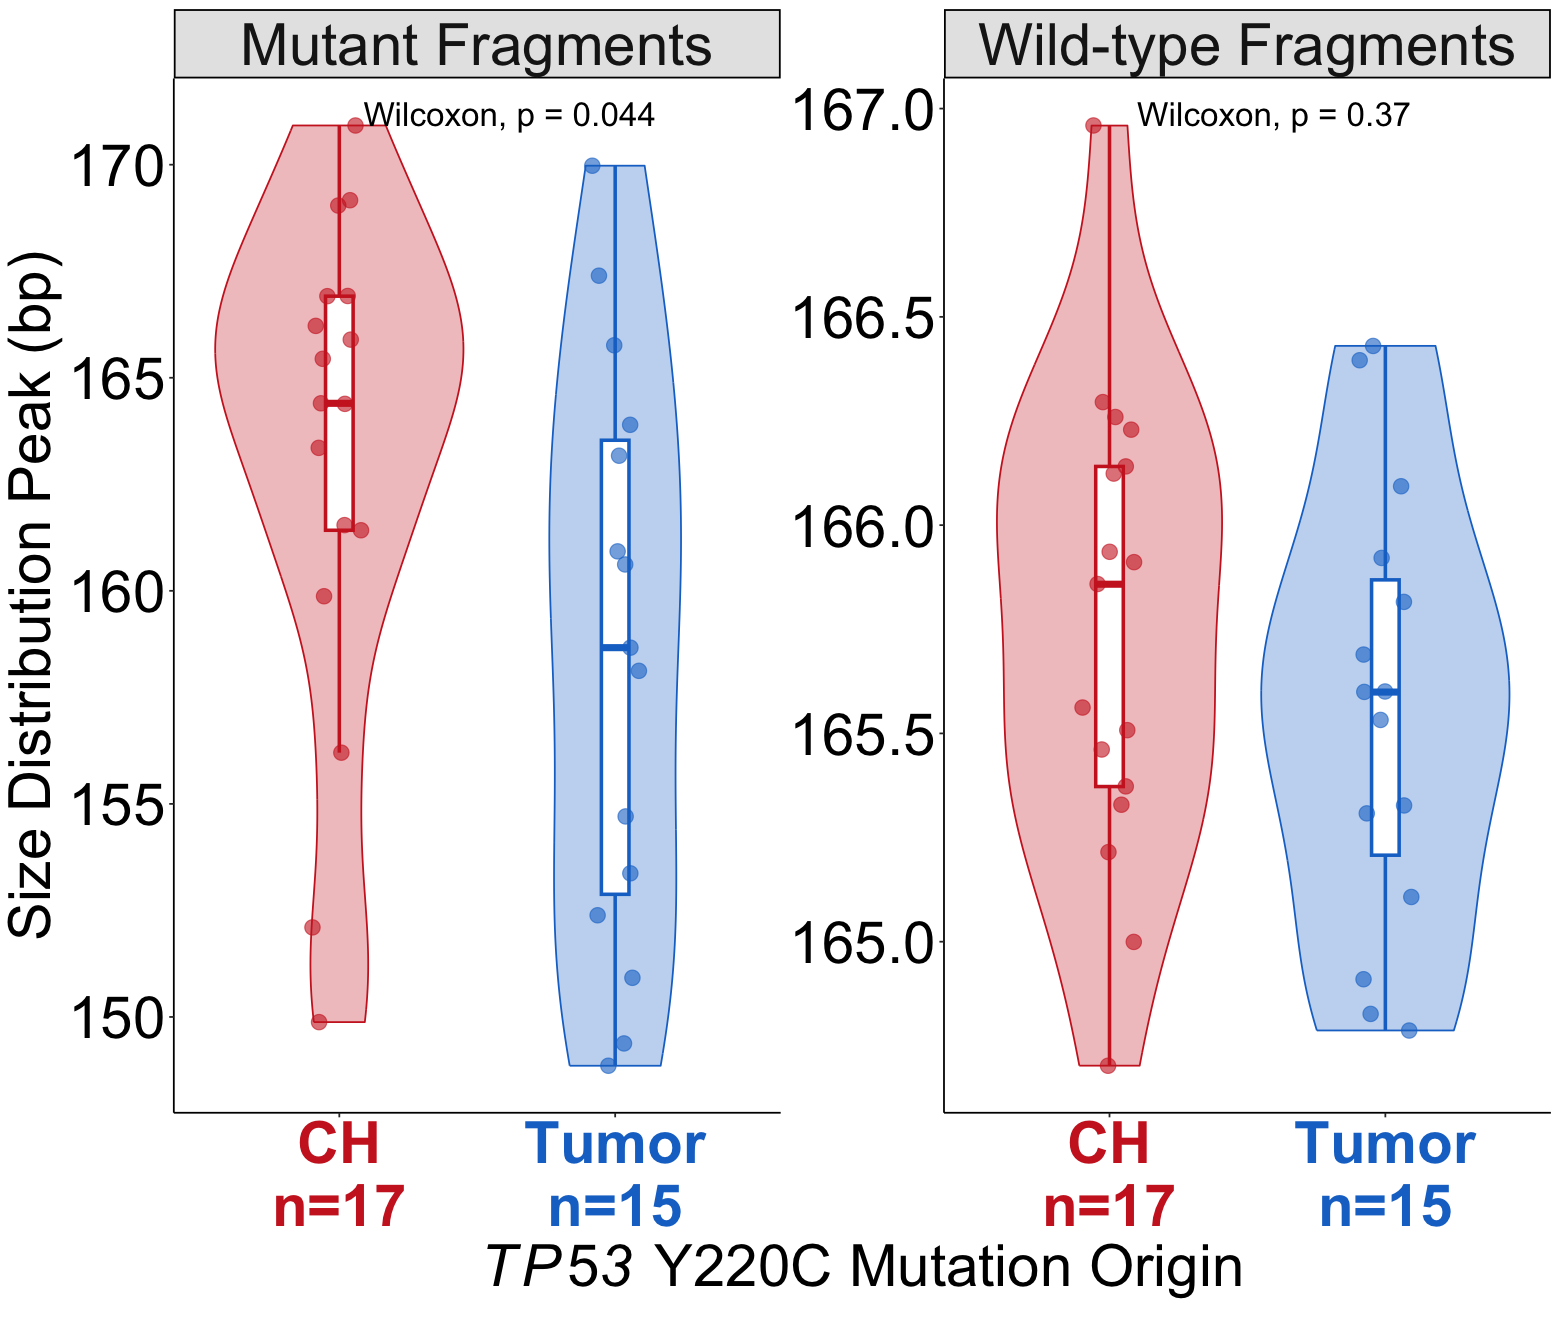

In [70]:

dtmp <- tt %>% pivot_longer(cols = c("peak_wt","peak_mut"), names_to="status", values_to="peak")
dtmp$status2 <- "Mutant Fragments"
dtmp$status2[dtmp$status=="peak_wt"] <- "Wild-type Fragments"

gpeak <- ggplot(dtmp,aes(x=Final_mutation_source,
                       y=peak,
                       colour=Final_mutation_source)) + 
geom_violin(alpha=.3, aes(fill=Final_mutation_source)) + 
geom_boxplot(outlier.shape = NA, width=.1, size=1, fill="white") +
#geom_boxplot(outlier.shape = NA, width=.3, size=1.5) + 
geom_jitter(size=4, width = .1, alpha=.6) + 
theme_classic() + gtheme(35) + 
stat_compare_means(size=7, label.y.npc = 1, label.x.npc = .3) +
theme(axis.text.x = element_text(colour = mycol, face="bold")) + 
noleg + 
scale_color_manual(values=mycol) + scale_fill_manual(values=mycol) + 
scale_x_discrete(labels=c("CH\nn=17","Tumor\nn=15")) + 
ylab("Size Distribution Peak (bp)") + 
xlab(expression(paste(italic(TP53)," Y220C Mutation Origin"))) +
facet_wrap(.~status2, scales="free_y") + theme(strip.background =element_rect(fill="grey90"))

options(repr.plot.width=13,repr.plot.height=11)
gpeak
ggsave(gpeak, file="plots/peak_ch_tumor.pdf", width=13, height=11)
ggsave(gpeak, file="plots/peak_ch_tumor.png", width=13, height=11)

In [72]:
dtmp %>% group_by(Final_mutation_source, status2) %>% summarize(median(peak))

`summarise()` has grouped output by 'Final_mutation_source'. You can override using the `.groups` argument.


Final_mutation_source status2             median(peak)
1 CH                    Mutant Fragments    164.4001    
2 CH                    Wild-type Fragments 165.8582    
3 Tumor                 Mutant Fragments    158.6660    
4 Tumor                 Wild-type Fragments 165.5992

## Plot Density With Peak Estimates for each Patient

In [73]:
colmutwt <- derain[c(3,5)]

In [74]:
head(drespeak,3)

sample         n_mut n_wt peak_mut peak_wt  gap       overlap  
1 ORD-1014010-01 106   1632 158.6660 166.3962 0.4454024 0.7765453
2 ORD-1016181-01 161   3988 166.9185 166.2591 0.1516053 0.9237243
3 ORD-1110419-01  58   3575 154.7055 165.3076 0.3461532 0.8267282

In [75]:
table(tt$Final_mutation_source)


   CH Tumor 
   17    15 

### CH

Warning message in geom_vline(data = dfacet, aes(xintercept = peak_mut), col = colmutwt[1], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message in geom_vline(data = dfacet, aes(xintercept = peak_wt), col = colmutwt[2], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message:
“Removed 55 rows containing non-finite outside the scale range (`stat_density()`).”


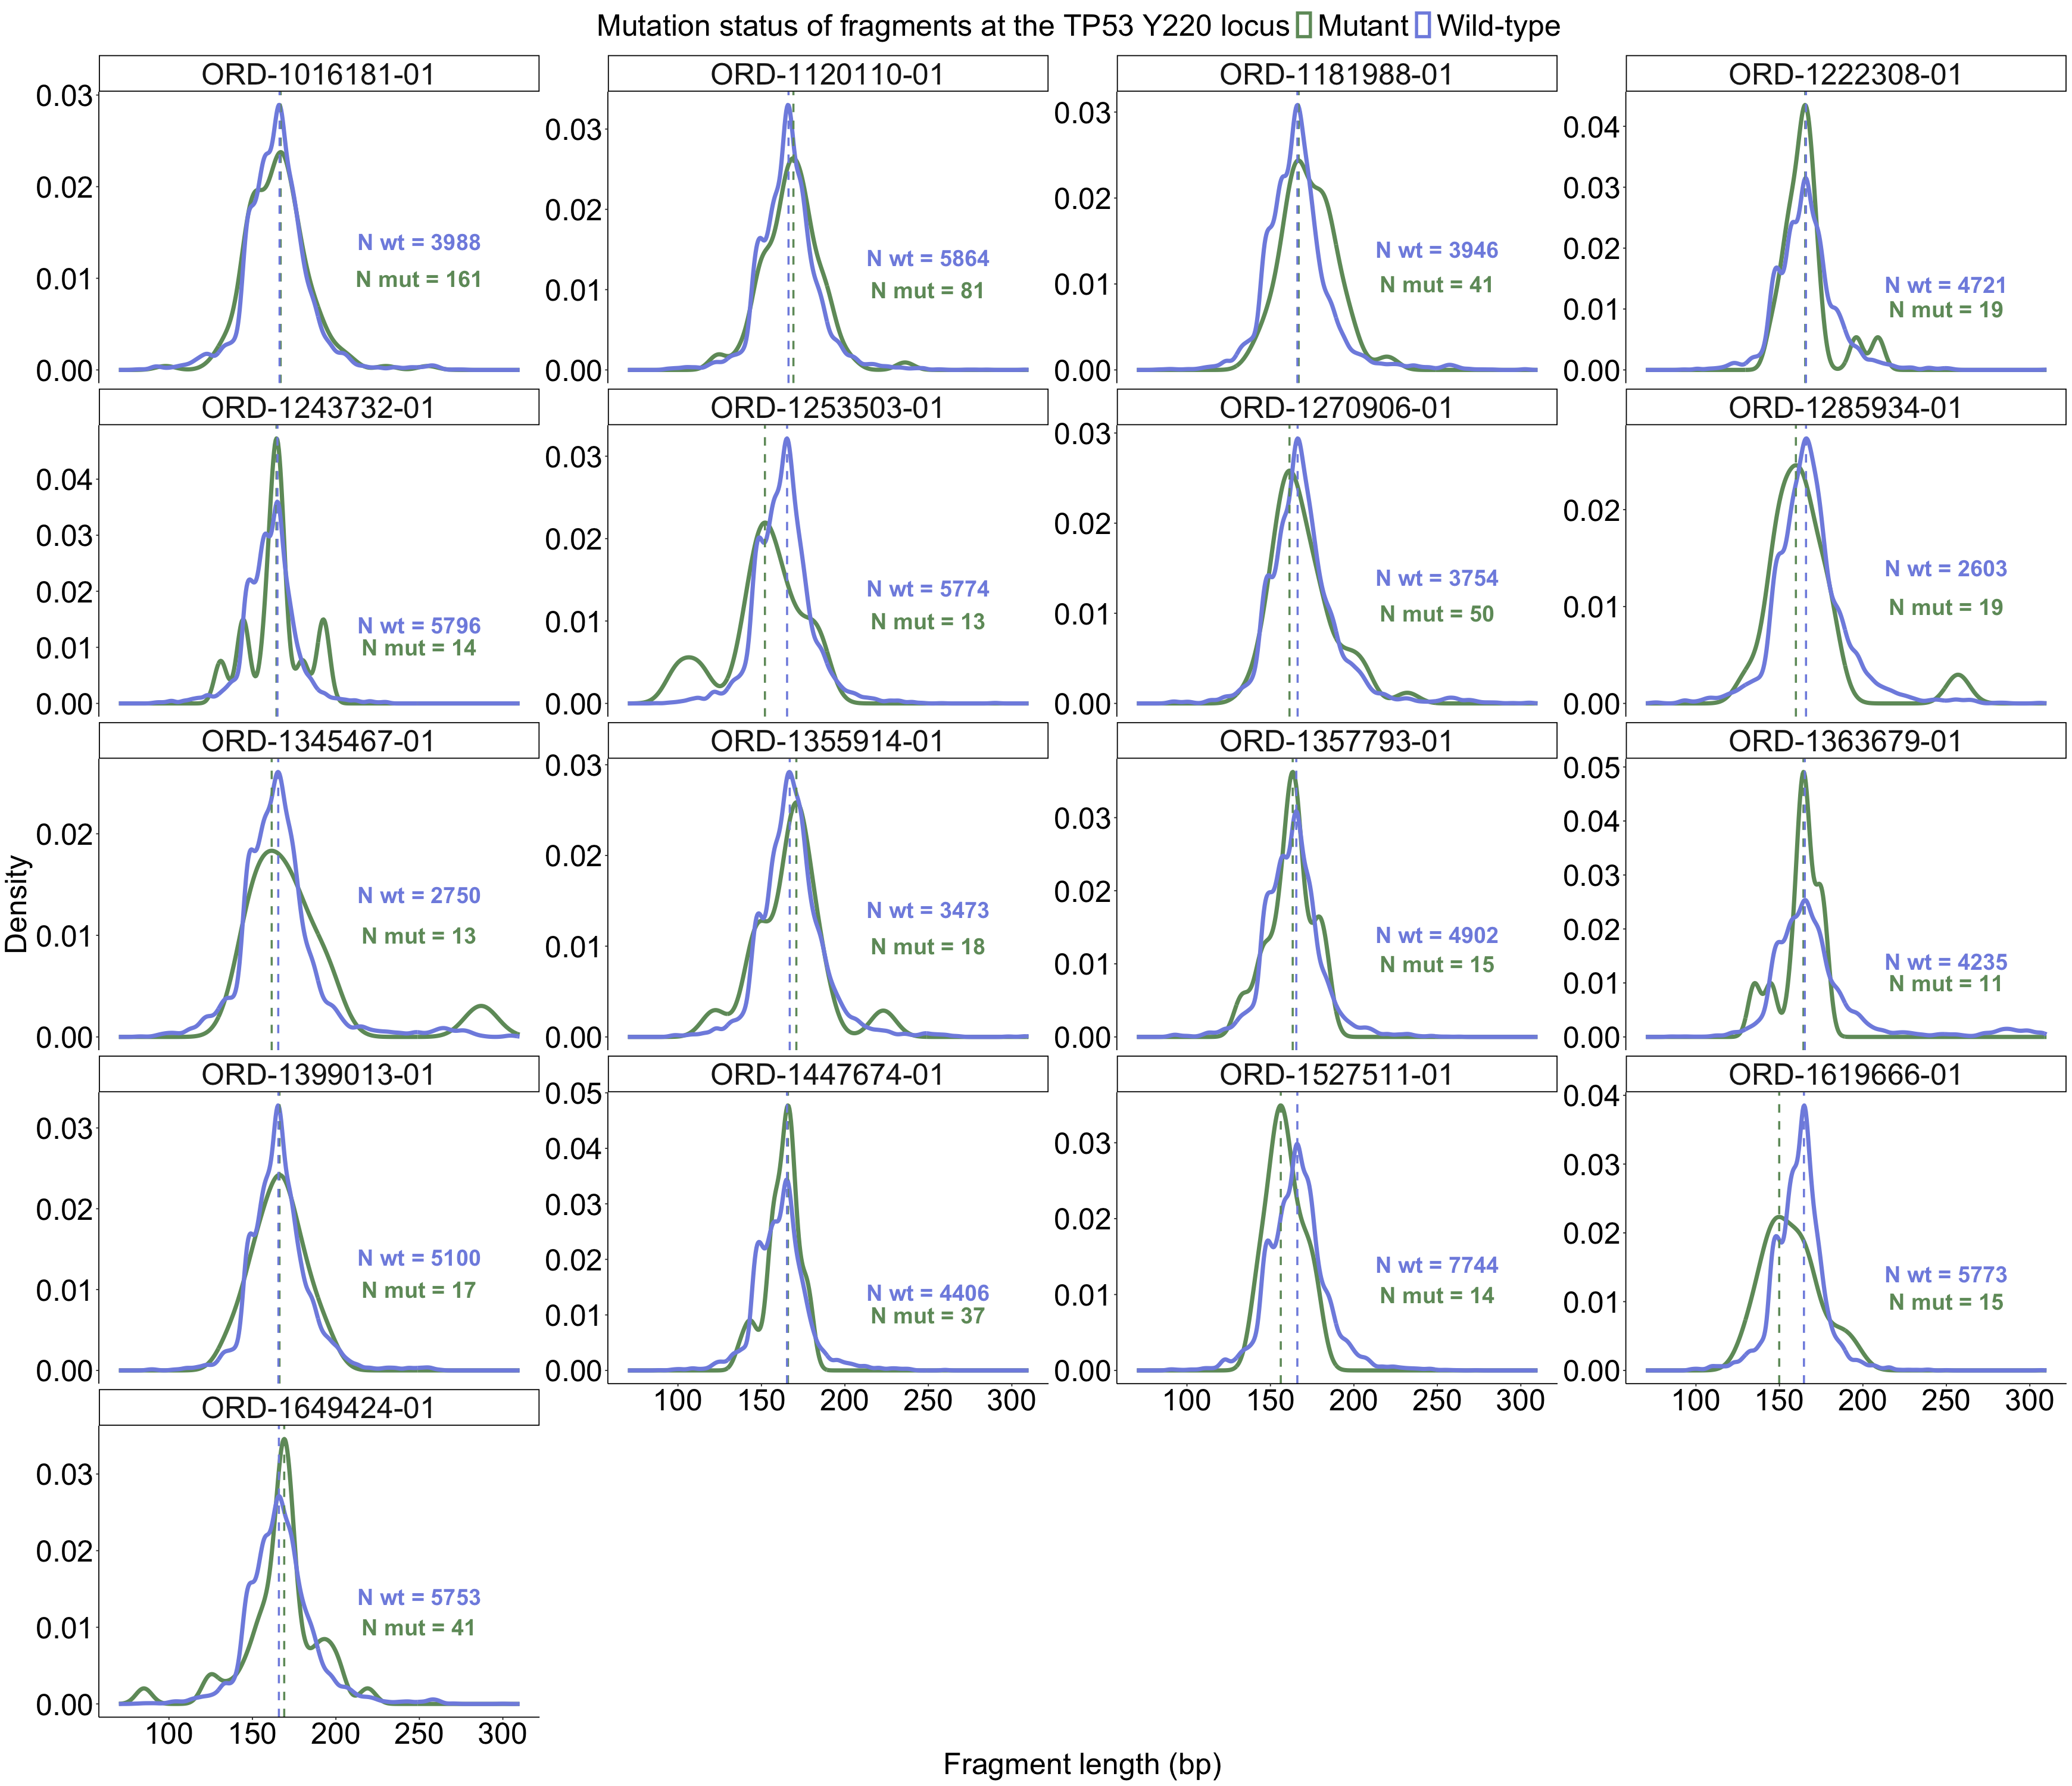

In [76]:
#ord <- "ORD-1014010-01"
ttch <- tt %>% filter(Final_mutation_source=="CH")
ww <- dff %>% filter(Sample_Id%in%(ttch$sample))
dfacet <- ttch
dfacet$Sample_Id <- dfacet$sample

gallch <- ggplot(ww) + 
geom_density(size=2, aes(x=Fragment_size, color=Fragment_Status)) +
theme_classic() + gtheme(30) +
xlab("Fragment length (bp)") +
ylab("Density") +
geom_vline(data=dfacet,aes(xintercept=peak_mut),col=colmutwt[1], inherit.aes = FALSE, linetype="dashed", size=1) +
geom_vline(data=dfacet,aes(xintercept=peak_wt),col=colmutwt[2], inherit.aes = FALSE, linetype="dashed", size=1) +
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) +
scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) +
geom_text(data=dfacet, aes(x=250, y=.01, label=paste("N mut =",n_mut)), size=8, color=colmutwt[1], fontface="bold") +
geom_text(data=dfacet, aes(x=250, y=.014, label=paste("N wt =",n_wt)), size=8, color=colmutwt[2], fontface="bold") +
facet_wrap(.~Sample_Id, scales="free_y", ncol=4) + 
topleg + 
scale_color_manual(name="Mutation status of fragments at the TP53 Y220 locus", values=colmutwt, labels=c("Mutant","Wild-type")) + 
theme(legend.box="horizontal")

options(repr.plot.width=29,repr.plot.height=25)
gallch

### Tumor

Warning message in geom_vline(data = dfacet, aes(xintercept = peak_mut), col = colmutwt[1], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message in geom_vline(data = dfacet, aes(xintercept = peak_wt), col = colmutwt[2], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message:
“Removed 47 rows containing non-finite outside the scale range (`stat_density()`).”


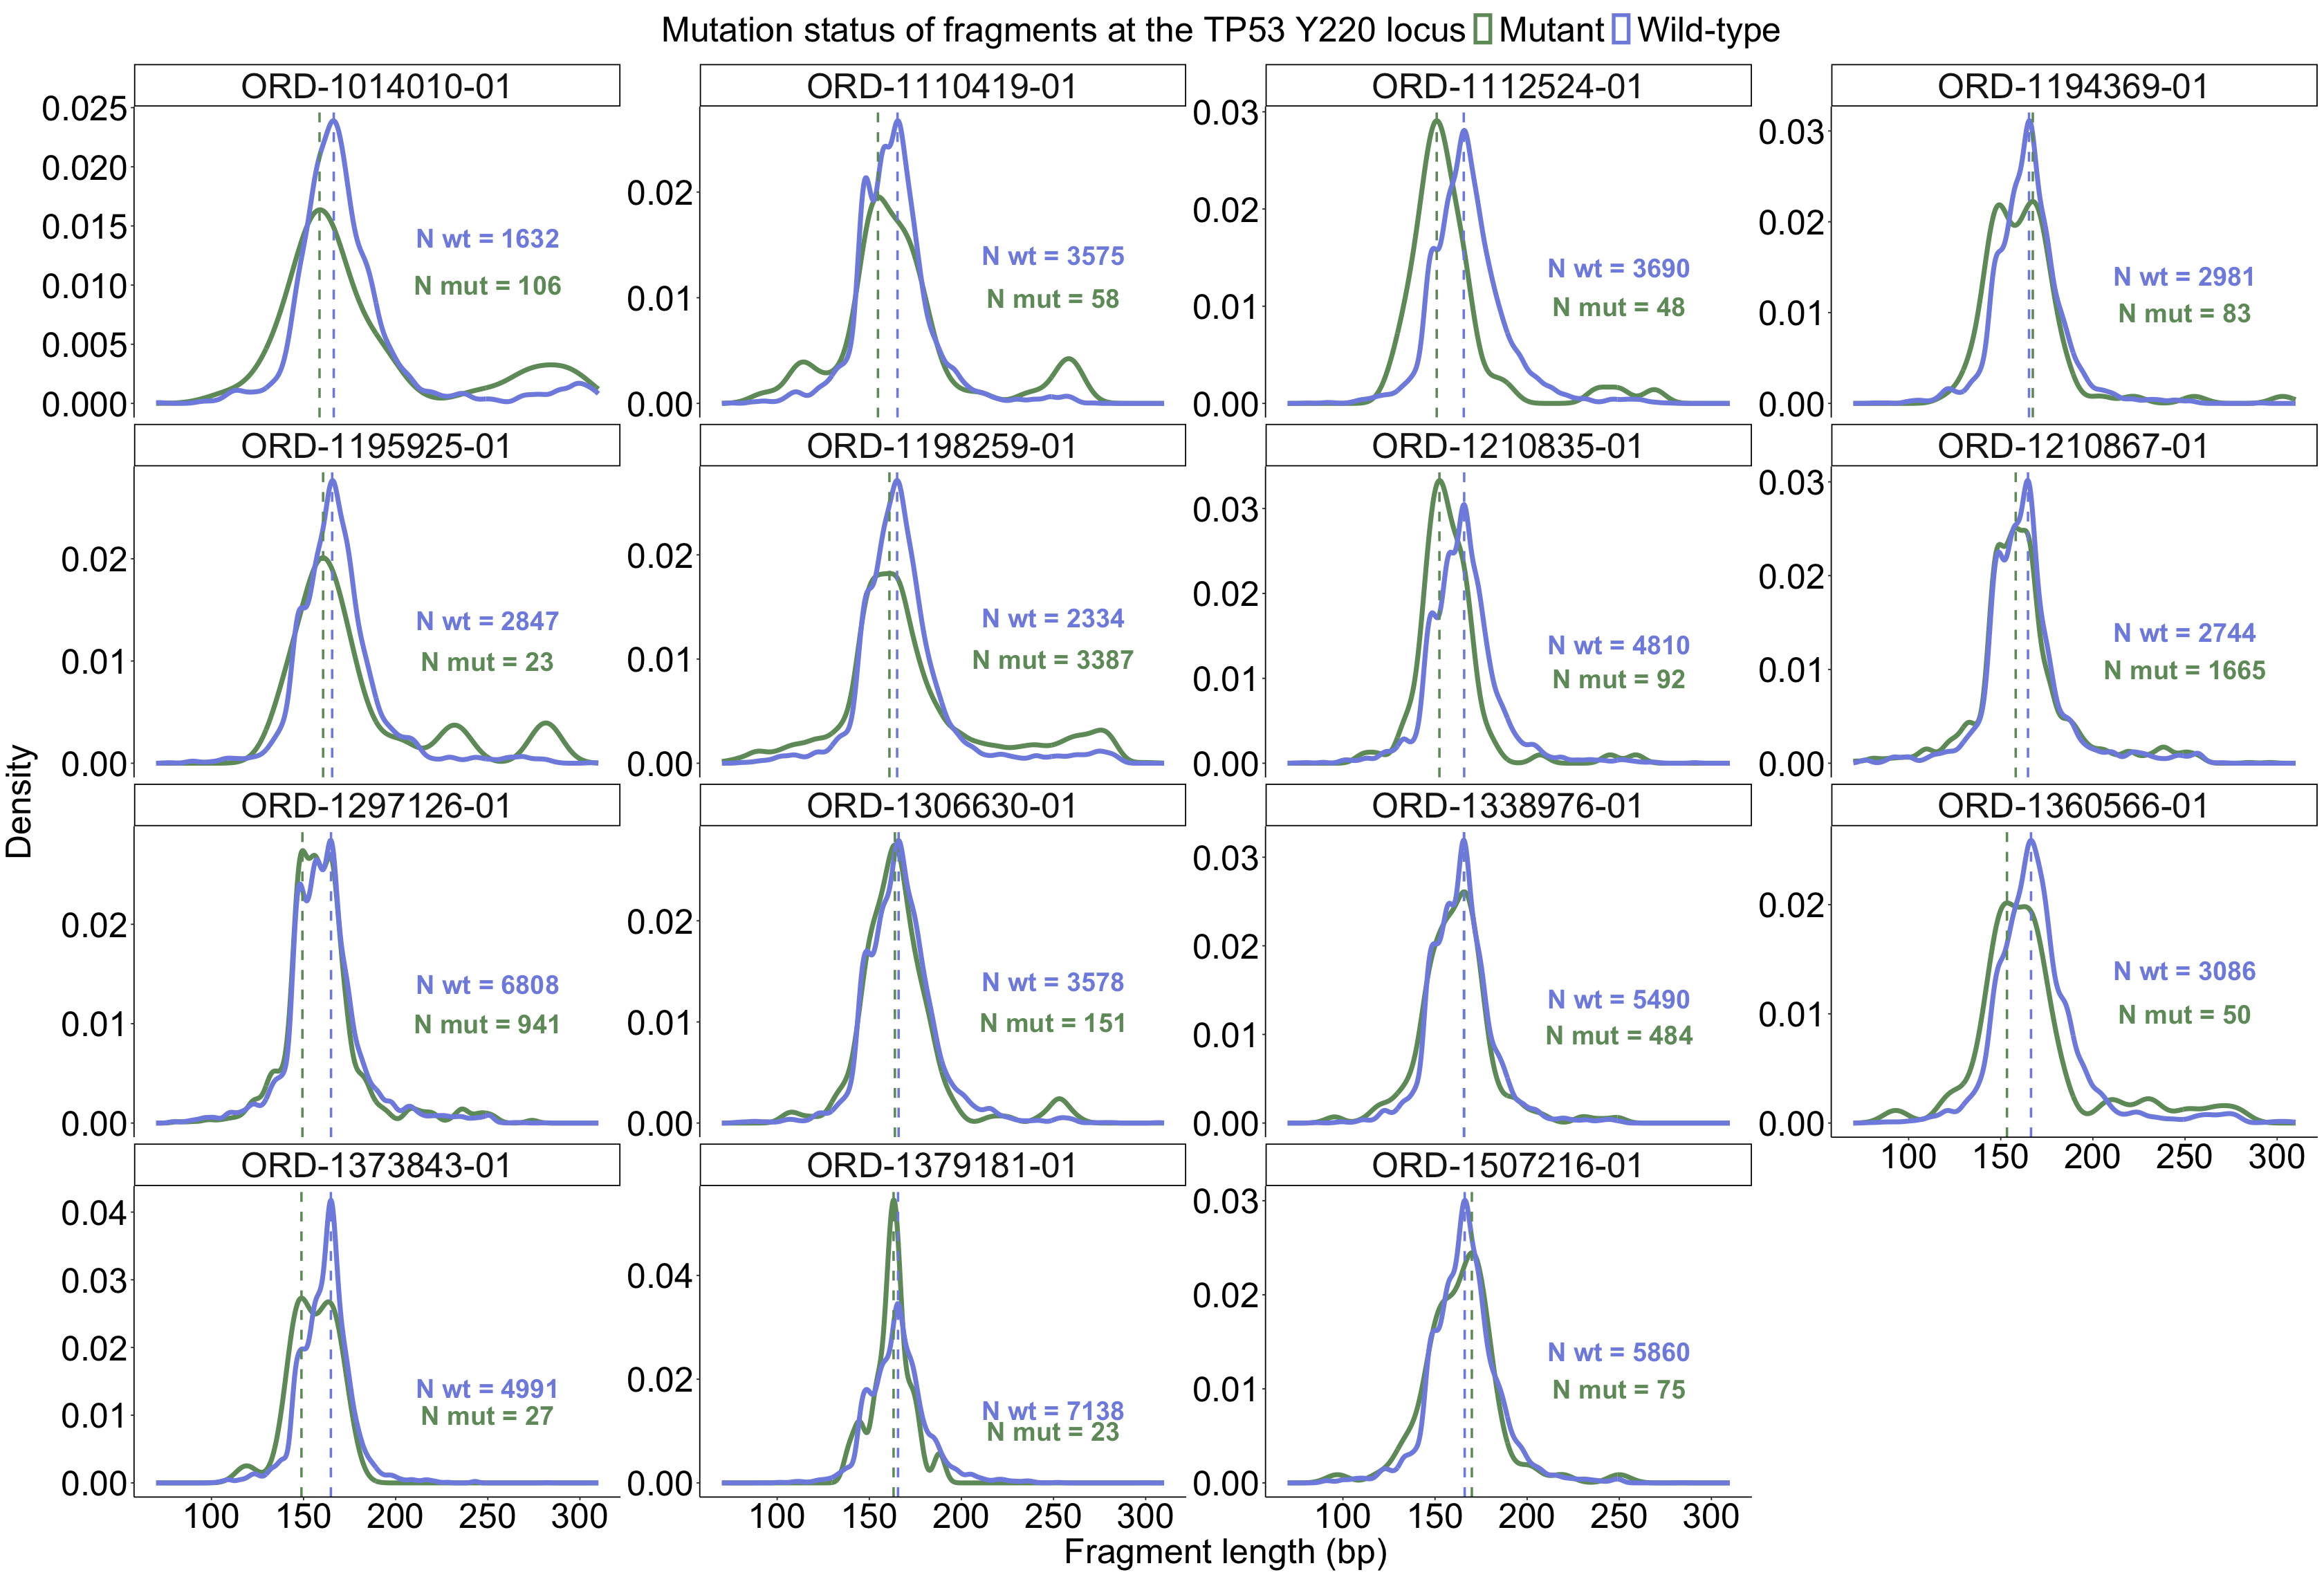

In [77]:
tttumor <- tt %>% filter(Final_mutation_source=="Tumor")
ww <- dff %>% filter(Sample_Id%in%(tttumor$sample))
dfacet <- tttumor
dfacet$Sample_Id <- dfacet$sample

galltumor <- ggplot(ww) + 
geom_density(size=2, aes(x=Fragment_size, color=Fragment_Status)) +
theme_classic() + gtheme(30) +
xlab("Fragment length (bp)") +
ylab("Density") +
geom_vline(data=dfacet,aes(xintercept=peak_mut),col=colmutwt[1], inherit.aes = FALSE, linetype="dashed", size=1) +
geom_vline(data=dfacet,aes(xintercept=peak_wt),col=colmutwt[2], inherit.aes = FALSE, linetype="dashed", size=1) +
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) +
scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) +
geom_text(data=dfacet, aes(x=250, y=.01, label=paste("N mut =",n_mut)), size=8, color=colmutwt[1], fontface="bold") +
geom_text(data=dfacet, aes(x=250, y=.014, label=paste("N wt =",n_wt)), size=8, color=colmutwt[2], fontface="bold") +
facet_wrap(.~Sample_Id, scales="free_y") + 
topleg + 
scale_color_manual(name="Mutation status of fragments at the TP53 Y220 locus", values=colmutwt, labels=c("Mutant","Wild-type")) + 
theme(legend.box="horizontal")

options(repr.plot.width=28,repr.plot.height=19)
galltumor

### ORD-1210835-01 / ORD-1016181-01

In [80]:
#ww$Sample_Id
#tt$sample

In [96]:
unique(ww$Sample_Id)

[1] "ORD-1016181-01" "ORD-1210835-01"

Warning message in geom_vline(data = dfacet, aes(xintercept = peak_mut), col = colmutwt[1], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message in geom_vline(data = dfacet, aes(xintercept = peak_wt), col = colmutwt[2], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_density()`).”


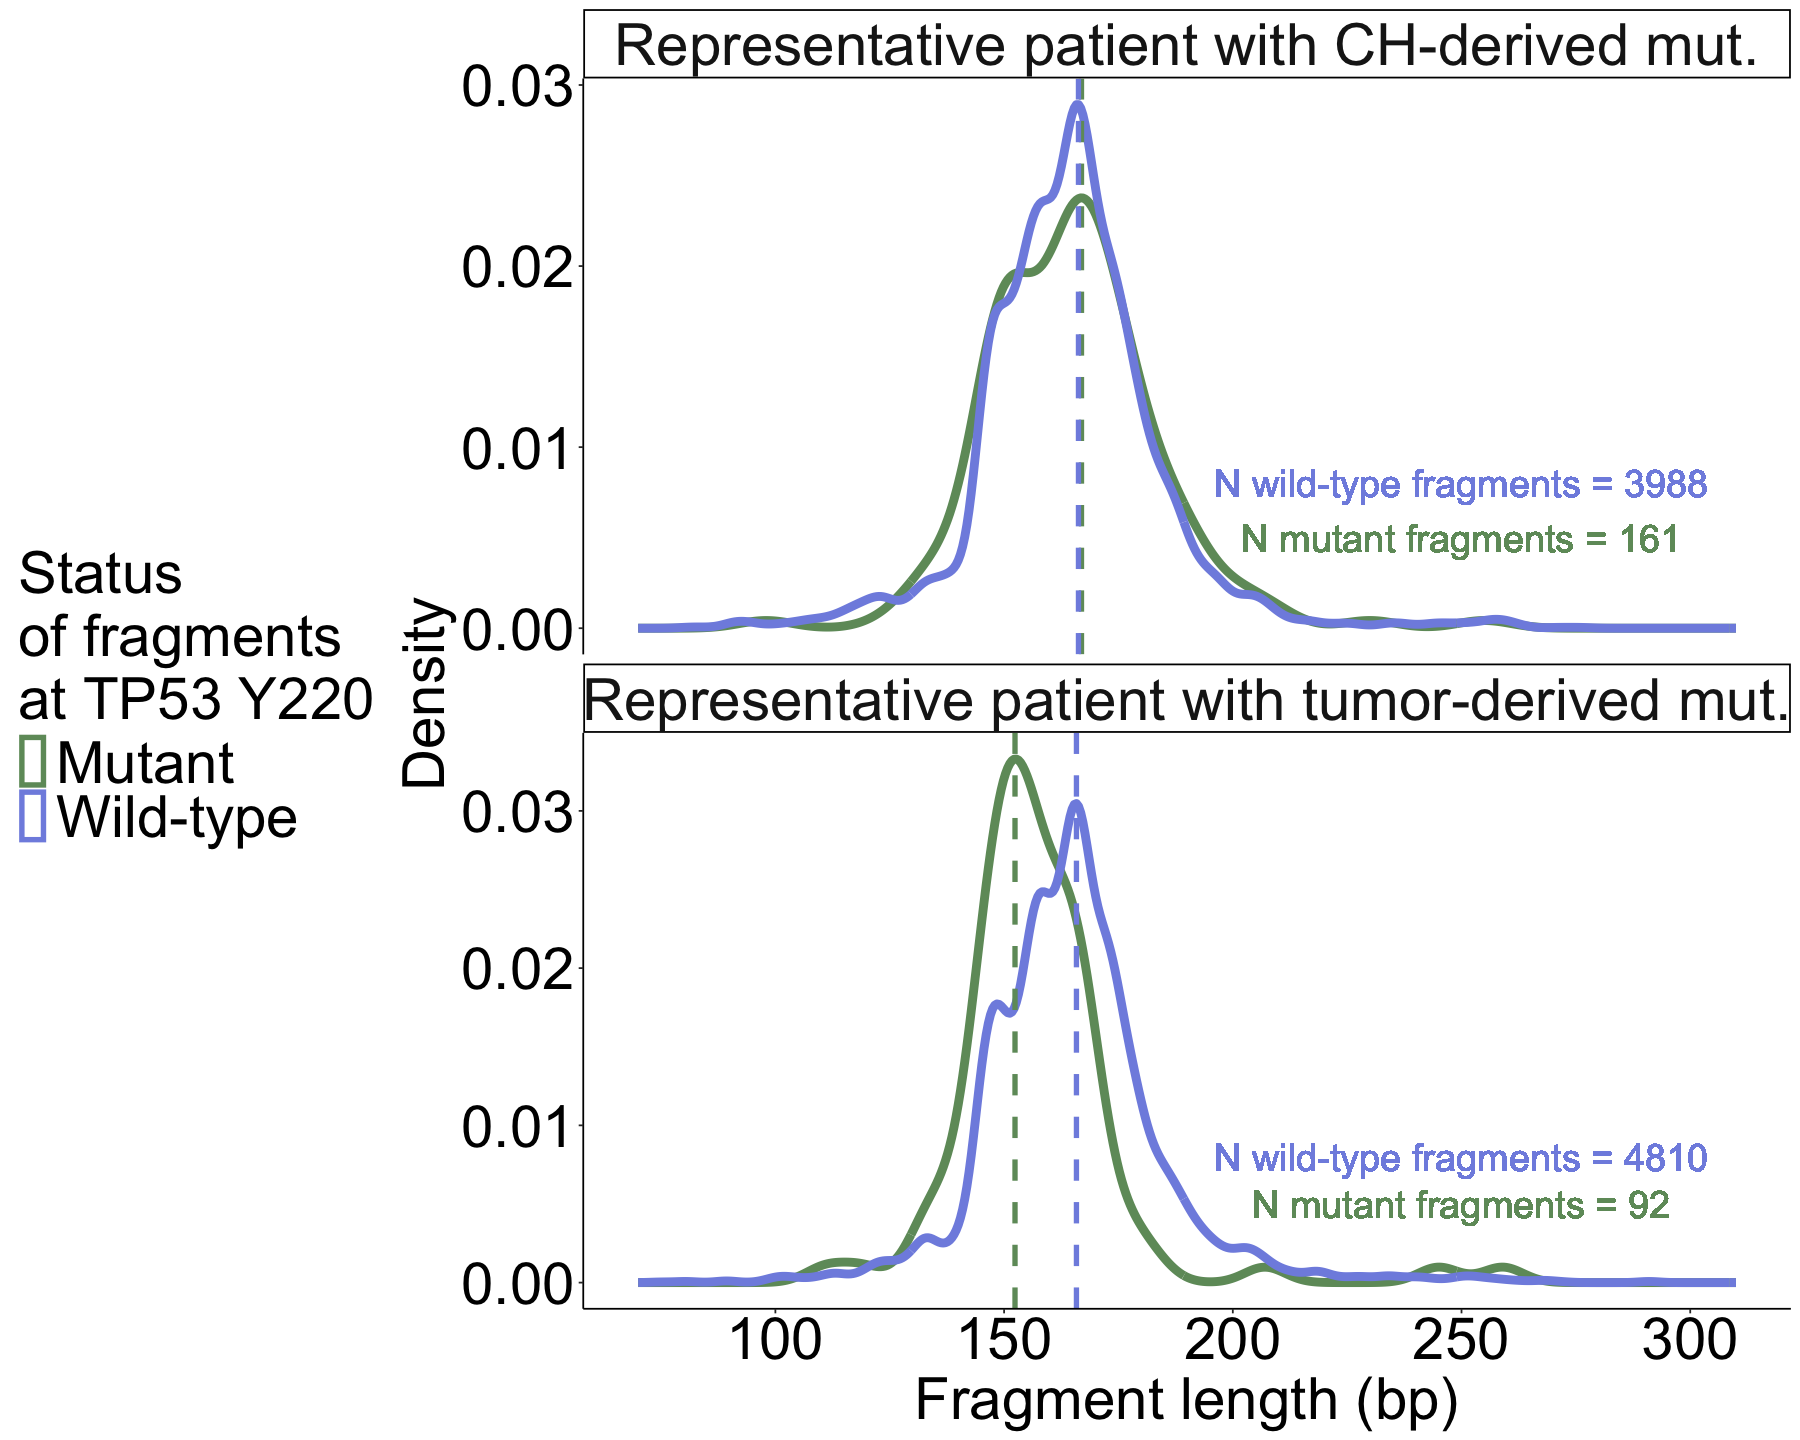

In [110]:
ttord <- tt %>% filter(sample%in%c("ORD-1210835-01","ORD-1016181-01"))
ww <- dff %>% filter(Sample_Id%in%c("ORD-1210835-01","ORD-1016181-01"))
dfacet <- ttord
dfacet$Sample_Id <- dfacet$sample
ww$sample2 <- NA
ww$sample2[which(ww$Sample_Id=="ORD-1210835-01")] <- "Representative patient with tumor-derived mut."
ww$sample2[which(ww$Sample_Id=="ORD-1016181-01")] <- "Representative patient with CH-derived mut."
dfacet <- left_join(dfacet, ww[,c("Sample_Id","sample2")], by="Sample_Id")

ggo <- ggplot(ww) + 
geom_density(size=2.5, aes(x=Fragment_size, color=Fragment_Status)) +
theme_classic() + gtheme(35) +
xlab("Fragment length (bp)") +
ylab("Density") +
geom_vline(data=dfacet,aes(xintercept=peak_mut),col=colmutwt[1], inherit.aes = FALSE, linetype="dashed", size=1.5) +
geom_vline(data=dfacet,aes(xintercept=peak_wt),col=colmutwt[2], inherit.aes = FALSE, linetype="dashed", size=1.5) +
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) +
scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) +
geom_text(data=dfacet, aes(x=250, y=.005, label=paste("N mutant fragments =",n_mut)), size=8, color=colmutwt[1]) +
geom_text(data=dfacet, aes(x=250, y=.008, label=paste("N wild-type fragments =",n_wt)), size=8, color=colmutwt[2]) +
facet_wrap(.~sample2, scales="free_y", ncol=1) + 
theme(legend.position='left') + 
scale_color_manual(name="Status\nof fragments\nat TP53 Y220", 
                   values=colmutwt, labels=c("Mutant","Wild-type")) + 
theme(legend.box="horizontal")

options(repr.plot.width=15,repr.plot.height=12)
ggo

# MVA?

In [968]:
library(forestmodel)

In [969]:
head(dprop,2)
head(drespeak,2)

Sample_Id      Final_mutation_source n_frag n_150 n_150_200 n_200 n_230
1 ORD-1014010-01 Tumor                 106    25     60       21    20   
2 ORD-1016181-01 CH                    161    32    122        7     2   
  prop_150  prop_150_200 prop_200   prop_230  
1 0.2358491 0.5660377    0.19811321 0.19811321
2 0.1987578 0.7577640    0.04347826 0.04347826

sample         n_mut n_wt peak_mut peak_wt  gap       overlap  
1 ORD-1014010-01 106   1632 158.6660 166.3962 0.4454024 0.7765453
2 ORD-1016181-01 161   3988 166.9185 166.2591 0.1516053 0.9237243

In [970]:
summary(dd.select$nb_frag_MUT_fragmentomics)
summary(dd.select$nb_frag_WT_fragmentomics)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0    15.0    37.0   223.3    82.0  3387.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1639    3531    4725    4582    5775    7759 

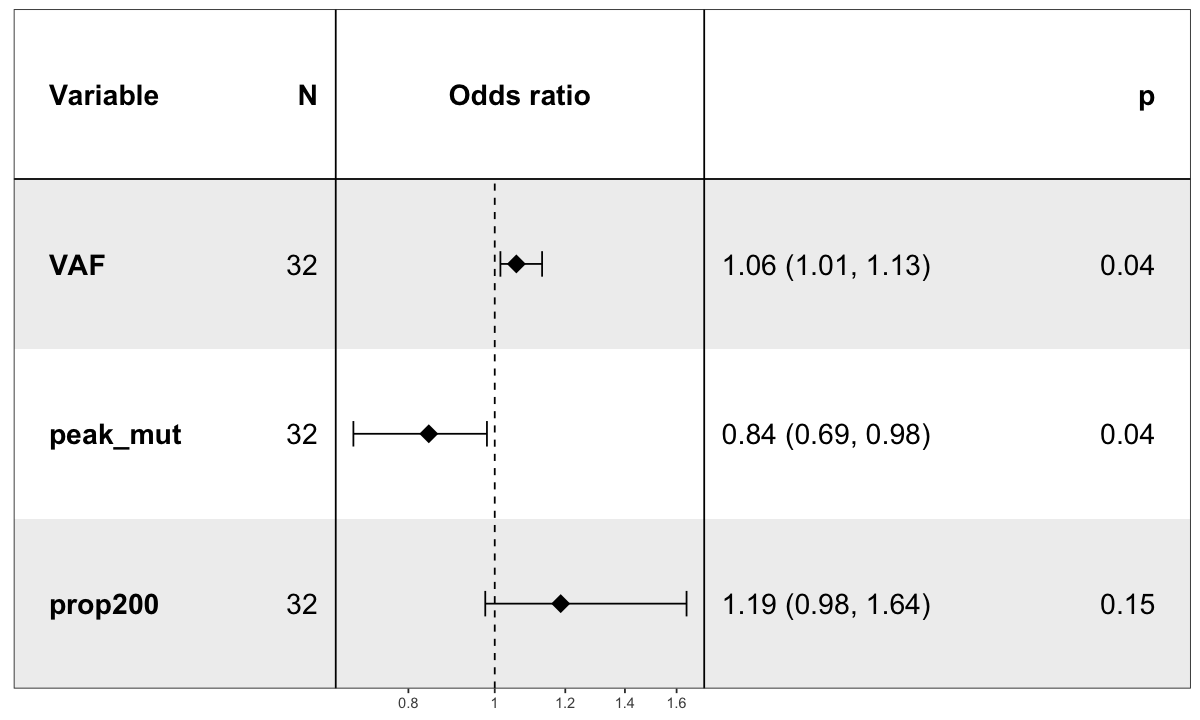

In [997]:
options(warn = -1)

dmva <- left_join(dd.select, dprop[,c("Sample_Id","prop_150","prop_150_200","prop_200","prop_230")], 
                  by=c("samples_ID"="Sample_Id"))
dmva <- left_join(dmva, drespeak,by=c("samples_ID"="sample"))
                  
dmva$VAF <- 100*as.numeric(dmva$VAF_FMI_TP53_Y220C) / 5

dmva$response <- 1
dmva$response[dmva$Final_mutation_source=="CH"] <- 0

dmva <- dmva %>% filter(n_mut >= 10)

dmva$prop <- 100*dmva$prop_150
dmva$prop230 <- 100*dmva$prop_230
dmva$prop200 <- 100*dmva$prop_200
dmva$dist <- dmva$peak_wt - dmva$peak_mut
dmva$peak <- dmva$peak_mut

#rest <- glm(formula = response ~ VAF +  peak_mut + prop230, family="binomial", data=dmva)
rest <- glm(formula = response ~ VAF +  peak_mut + prop200, family="binomial", data=dmva)
#rest <- glm(formula = response ~ VAF + peak_mut, family="binomial", data=dmva)
#rest <- glm(formula = response ~ VAF + peak + overlap, family="binomial", data=dmva)
#rest <- glm(formula = response ~ VAF_FMI_TP53_Y220C + prop_150 + prop_150_200 + prop_200, family="binomial", data=dmva)
#rest
options(repr.plot.width=10,repr.plot.height=6)
forest_model(rest,
             format_options = forest_model_format_options(text_size = 6, shape=18)
            )

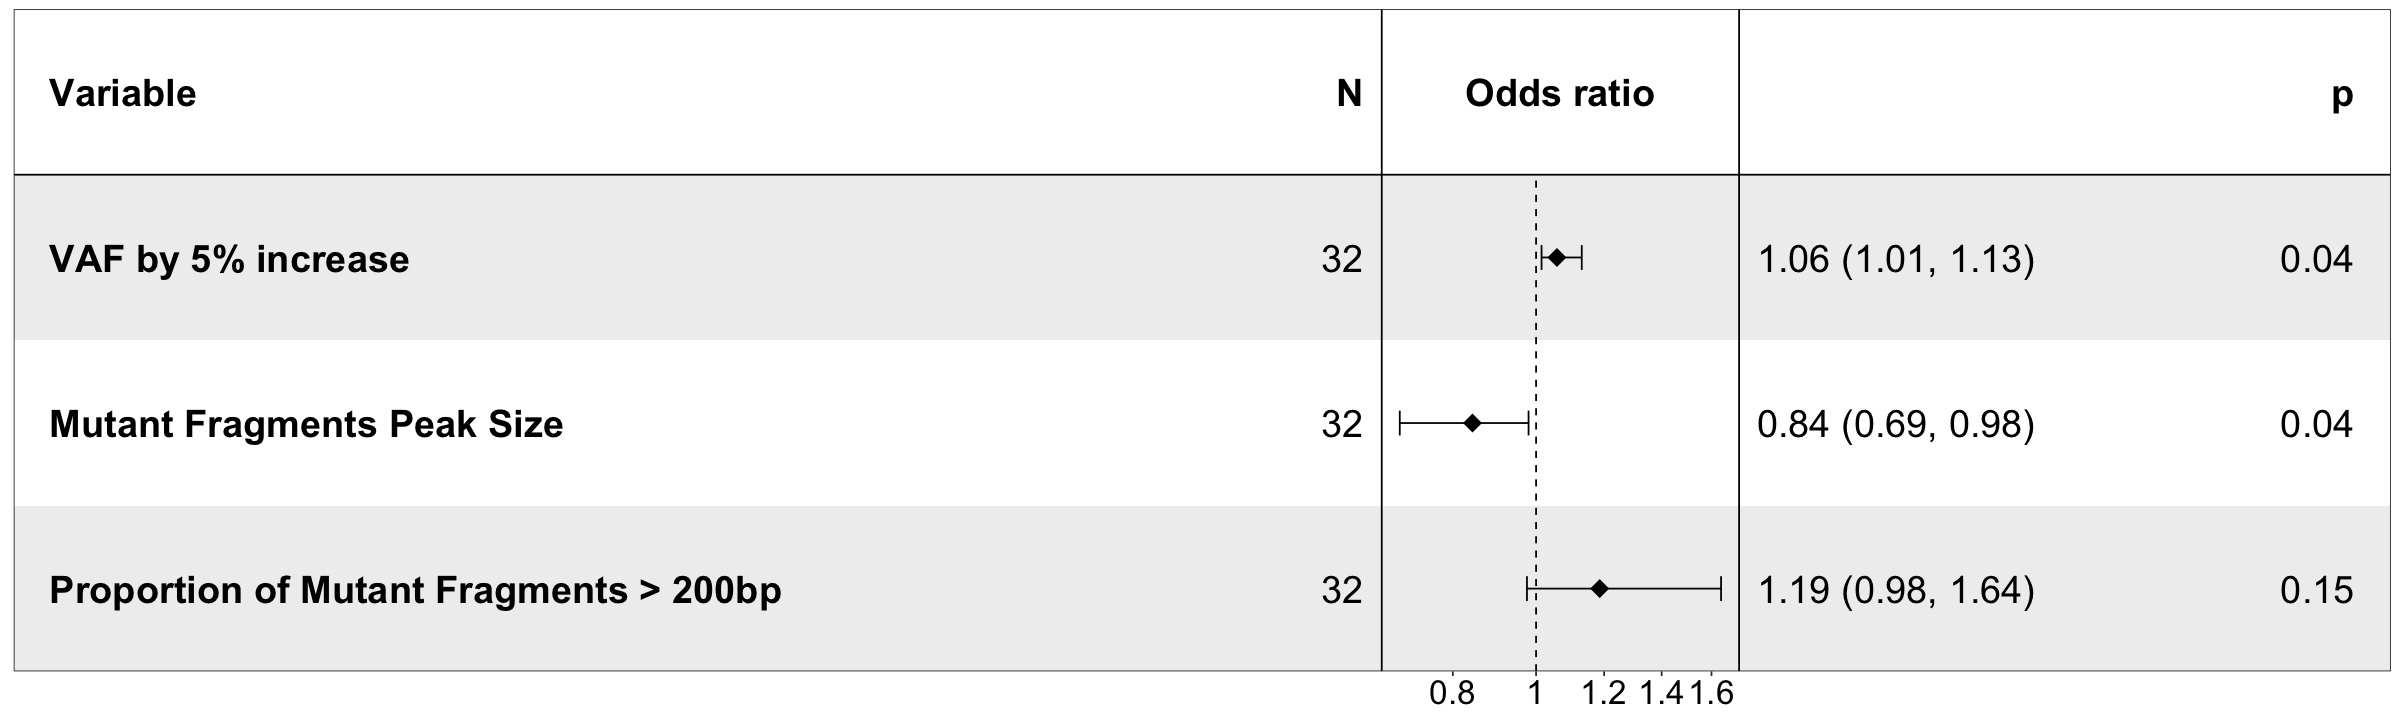

In [1016]:
options(warn = -1)

dmva <- left_join(dd.select, dprop[,c("Sample_Id","prop_150","prop_150_200","prop_200","prop_230")], 
                  by=c("samples_ID"="Sample_Id"))
dmva <- left_join(dmva, drespeak,by=c("samples_ID"="sample"))
                  
dmva$VAF <- 100*as.numeric(dmva$VAF_FMI_TP53_Y220C) / 5
dmva[,'VAF by 5% increase'] <- dmva$VAF

dmva$response <- 1
dmva$response[dmva$Final_mutation_source=="CH"] <- 0

dmva <- dmva %>% filter(n_mut >= 10)

dmva$prop <- 100*dmva$prop_150
dmva$prop230 <- 100*dmva$prop_230
dmva$prop200 <- 100*dmva$prop_200
dmva[,'Proportion of Mutant Fragments > 200bp'] <- 100*dmva$prop_200
dmva$dist <- dmva$peak_wt - dmva$peak_mut
dmva$peak <- dmva$peak_mut
dmva[,'Mutant Fragments Peak Size'] <- dmva$peak_mut

rest <- glm(formula = response ~ `VAF by 5% increase` +  `Mutant Fragments Peak Size` + `Proportion of Mutant Fragments > 200bp`, family="binomial", data=dmva)
#rest
options(repr.plot.width=20,repr.plot.height=6)
forest_model(rest,
             format_options = forest_model_format_options(text_size = 8, shape=18)
            ) + gtheme(20)

In [1018]:
table(dmva$response)


 0  1 
17 15 

# Case Report

## Read data

In [120]:
# Available on NextCloud: 
# data/fRagmentomics_v0.1.0_package/results/2025-05-22_results_fRagmentomics_v0.1.0_case_report_TP53_Y220C_without_dup
dircc <- "../../../data/fRagmentomics_v0.1.0_package/results/2025-05-22_results_fRagmentomics_v0.1.0_case_report_TP53_Y220C_without_dup" 
cc1.stk <- read_table(paste0(dircc,"/","ORD-1799945-01_EGFR_STK11_remove_duplicates.tsv"))
cc1.tp53 <- read_table(paste0(dircc,"/","ORD-1799945-01_TP53_remove_duplicates.tsv"))
cc2.stk <- read_table(paste0(dircc,"/","ORD-1920359-01_EGFR_STK11_remove_duplicates.tsv"))
cc2.tp53 <- read_table(paste0(dircc,"/","ORD-1920359-01_TP53_remove_duplicates.tsv"))


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  Position = col_double(),
  Alt = col_logical(),
  Fragment_size = col_double(),
  Inner_distance = col_double(),
  Read_5p = col_double(),
  MAPQ_5p = col_double(),
  MAPQ_3p = col_double(),
  BASE_5p = col_logical(),
  BASQ_5p = col_logical(),
  Pos_bam_5p = col_double(),
  Pos_bam_3p = col_double(),
  TLEN = col_double(),
  Nb_fragment_bases_softclip_5p = col_double(),
  Nb_fragment_bases_softclip_3p = col_double(),
  VAF = col_double(),
  Start_test = col_double(),
  Start_test_read_5p = col_double(),
  Start_test_read_3p = col_double(),
  Startpos_read_5p_cor = col_double(),
  Startpos_read_3p_cor = col_double()
)
ℹ Use `spec()` for the full column specifications.

Warning message:
“43626 parsing failures.
 row     col           expected               actual                                                      

## Plot STK11 / TP53 Y220C

In [192]:
stk1 <- cc1.stk %>% filter(Chromosome=="chr19") %>% filter(Fragment_Status %in% c("MUT","WT"))
stk2 <- cc2.stk %>% filter(Chromosome=="chr19") %>% filter(Fragment_Status %in% c("MUT","WT"))
yc1 <- cc1.tp53 %>% filter(Position==7578190) %>% filter(Fragment_Status %in% c("MUT","WT"))
yc2 <- cc2.tp53 %>% filter(Position==7578190) %>% filter(Fragment_Status %in% c("MUT","WT"))

In [197]:
# STK11 - 1
nmut.stk1 <- sum(stk1$Fragment_Status=="MUT")
nwt.stk1 <- sum(stk1$Fragment_Status=="WT")
densmut.stk1 <- density(stk1[stk1$Fragment_Status=="MUT",]$Fragment_size)
denswt.stk1 <- density(stk1[stk1$Fragment_Status=="WT",]$Fragment_size)
peakmut.stk1 <- densmut.stk1$x[which.max(densmut.stk1$y)]
peakwt.stk1 <- denswt.stk1$x[which.max(denswt.stk1$y)]
dres.stk1 <- data.frame(sample="Pre-traitement STK11", 
                        n_mut=nmut.stk1, n_wt=nwt.stk1, peak_mut=peakmut.stk1, peak_wt=peakwt.stk1)
# STK11 - 2
nmut.stk2 <- sum(stk2$Fragment_Status=="MUT")
nwt.stk2 <- sum(stk2$Fragment_Status=="WT")
densmut.stk2 <- density(stk2[stk2$Fragment_Status=="MUT",]$Fragment_size)
denswt.stk2 <- density(stk2[stk2$Fragment_Status=="WT",]$Fragment_size)
peakmut.stk2 <- densmut.stk2$x[which.max(densmut.stk2$y)]
peakwt.stk2 <- denswt.stk2$x[which.max(denswt.stk2$y)]
dres.stk2 <- data.frame(sample="Post-traitement STK11", 
                        n_mut=nmut.stk2, n_wt=nwt.stk2, peak_mut=peakmut.stk2, peak_wt=peakwt.stk2)

In [199]:
# Y220C - 1
nmut.yc1 <- sum(yc1$Fragment_Status=="MUT")
nwt.yc1 <- sum(yc1$Fragment_Status=="WT")
densmut.yc1 <- density(yc1[yc1$Fragment_Status=="MUT",]$Fragment_size)
denswt.yc1 <- density(yc1[yc1$Fragment_Status=="WT",]$Fragment_size)
peakmut.yc1 <- densmut.yc1$x[which.max(densmut.yc1$y)]
peakwt.yc1 <- denswt.yc1$x[which.max(denswt.yc1$y)]
dres.yc1 <- data.frame(sample="Pre-traitement STK11", 
                        n_mut=nmut.yc1, n_wt=nwt.yc1, peak_mut=peakmut.yc1, peak_wt=peakwt.yc1)

# Y220C - 2
nmut.yc2 <- sum(yc2$Fragment_Status=="MUT")
nwt.yc2 <- sum(yc2$Fragment_Status=="WT")
densmut.yc2 <- density(yc2[yc2$Fragment_Status=="MUT",]$Fragment_size)
denswt.yc2 <- density(yc2[yc2$Fragment_Status=="WT",]$Fragment_size)
peakmut.yc2 <- densmut.yc2$x[which.max(densmut.yc2$y)]
peakwt.yc2 <- denswt.yc2$x[which.max(denswt.yc2$y)]
dres.yc2 <- data.frame(sample="Post-traitement STK11", 
                        n_mut=nmut.yc2, n_wt=nwt.yc2, peak_mut=peakmut.yc2, peak_wt=peakwt.yc2)

In [157]:
dres.stk1
dres.stk2

sample               n_mut n_wt peak_mut peak_wt 
1 Pre-traitement STK11 553   7919 135.1001 166.1273

sample                n_mut n_wt peak_mut peak_wt 
1 Post-traitement STK11 806   7157 132.855  166.1809

Warning message in geom_vline(data = dres.stk1, aes(xintercept = peak_mut), col = colmutwt[1], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message in geom_vline(data = dres.stk1, aes(xintercept = peak_wt), col = colmutwt[2], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_density()`).”


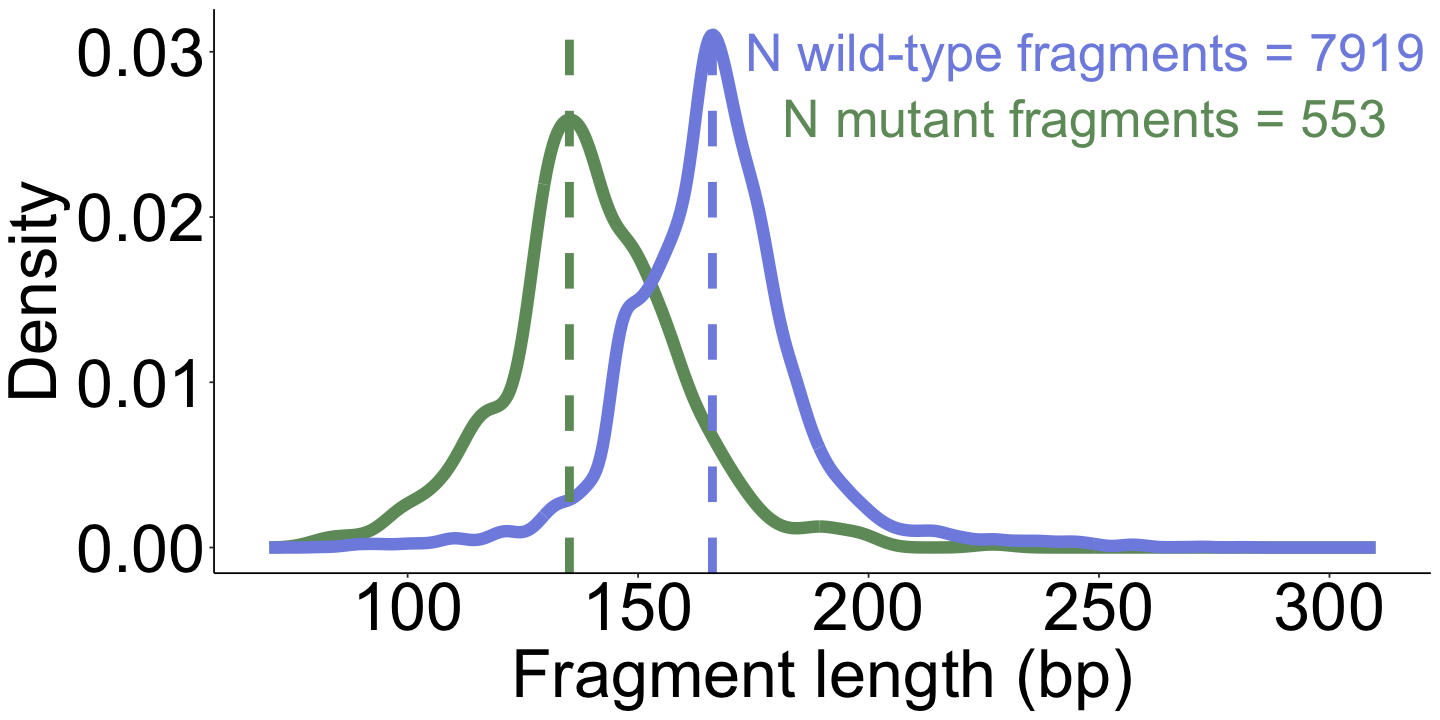

In [185]:
ggstk1 <- ggplot(stk1) + 
geom_density(size=3.5, aes(x=Fragment_size, color=Fragment_Status)) +
theme_classic() + gtheme(40) +
xlab("Fragment length (bp)") +
ylab("Density") +
geom_vline(data=dres.stk1,aes(xintercept=peak_mut),col=colmutwt[1], inherit.aes = FALSE, linetype="dashed", size=2.5) +
geom_vline(data=dres.stk1,aes(xintercept=peak_wt),col=colmutwt[2], inherit.aes = FALSE, linetype="dashed", size=2.5) +
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) +
scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) +
geom_text(data=dres.stk1, aes(x=247, y=.026, label=paste("N mutant fragments =",n_mut)), size=11, color=colmutwt[1]) +
geom_text(data=dres.stk1, aes(x=247, y=.03, label=paste("N wild-type fragments =",n_wt)), size=11, color=colmutwt[2]) +
#facet_wrap(.~sample2, scales="free_y", ncol=1) + 
noleg + 
#theme(legend.position='left') + 
scale_color_manual(name="Status\nof fragments\nat TP53 Y220", 
                   values=colmutwt, labels=c("Mutant","Wild-type")) + 
theme(legend.box="horizontal")

options(repr.plot.width=12,repr.plot.height=6)
ggstk1

Warning message in geom_vline(data = dres.stk2, aes(xintercept = peak_mut), col = colmutwt[1], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message in geom_vline(data = dres.stk2, aes(xintercept = peak_wt), col = colmutwt[2], :
“Ignoring unknown parameters: `inherit.aes`”


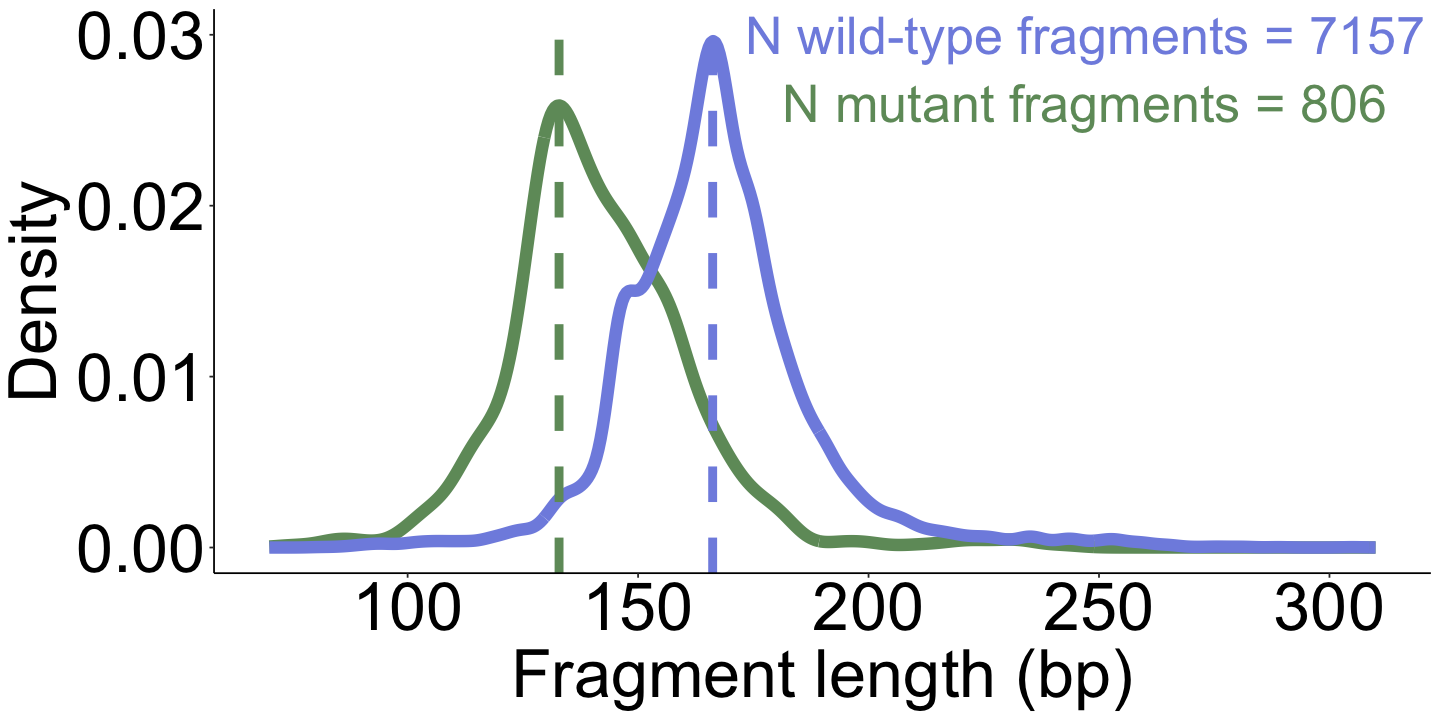

In [202]:
ggstk2 <- ggplot(stk2) + 
geom_density(size=3.5, aes(x=Fragment_size, color=Fragment_Status)) +
theme_classic() + gtheme(40) +
xlab("Fragment length (bp)") +
ylab("Density") +
geom_vline(data=dres.stk2,aes(xintercept=peak_mut),col=colmutwt[1], inherit.aes = FALSE, linetype="dashed", size=2.5) +
geom_vline(data=dres.stk2,aes(xintercept=peak_wt),col=colmutwt[2], inherit.aes = FALSE, linetype="dashed", size=2.5) +
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) +
scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) +
geom_text(data=dres.stk2, aes(x=247, y=.026, label=paste("N mutant fragments =",n_mut)), size=11, color=colmutwt[1]) +
geom_text(data=dres.stk2, aes(x=247, y=.03, label=paste("N wild-type fragments =",n_wt)), size=11, color=colmutwt[2]) +
#facet_wrap(.~sample2, scales="free_y", ncol=1) + 
noleg + 
#theme(legend.position='left') + 
scale_color_manual(name="Status\nof fragments\nat TP53 Y220", 
                   values=colmutwt, labels=c("Mutant","Wild-type")) + 
theme(legend.box="horizontal")

options(repr.plot.width=12,repr.plot.height=6)
ggstk2

Warning message in geom_vline(data = dres.yc2, aes(xintercept = peak_mut), col = colmutwt[1], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message in geom_vline(data = dres.yc2, aes(xintercept = peak_wt), col = colmutwt[2], :
“Ignoring unknown parameters: `inherit.aes`”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_density()`).”


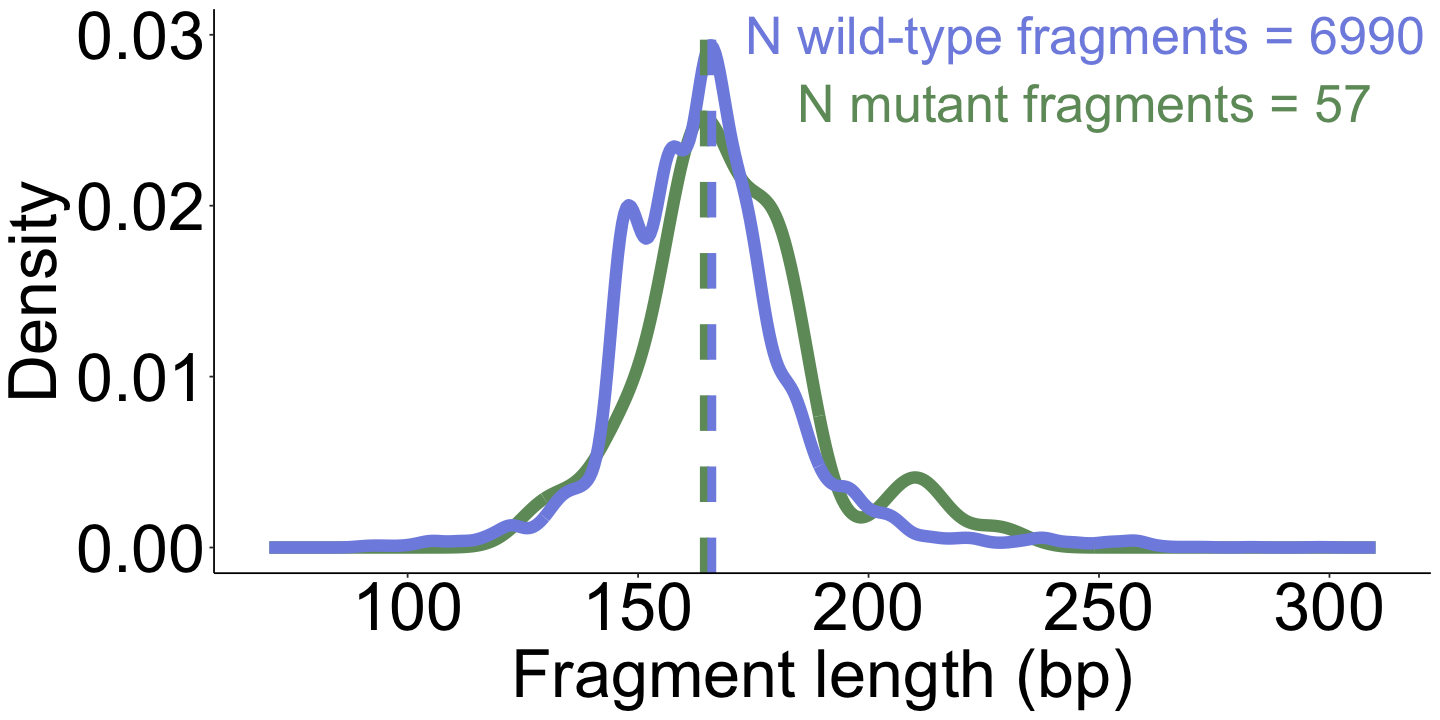

In [207]:
ggyc2 <- ggplot(yc2) + 
geom_density(size=3.5, aes(x=Fragment_size, color=Fragment_Status)) +
theme_classic() + gtheme(40) +
xlab("Fragment length (bp)") +
ylab("Density") +
geom_vline(data=dres.yc2,aes(xintercept=peak_mut),col=colmutwt[1], inherit.aes = FALSE, linetype="dashed", size=2.5) +
geom_vline(data=dres.yc2,aes(xintercept=peak_wt),col=colmutwt[2], inherit.aes = FALSE, linetype="dashed", size=2.5) +
#scale_x_continuous(limits=c(70,310), breaks=c(100, 145, 150, 167, 200, 250, 300), guide = guide_axis(n.dodge = 2)) +
scale_x_continuous(limits=c(70,310), breaks=c(100, 150, 200, 250, 300), guide = guide_axis(n.dodge = 1)) +
geom_text(data=dres.yc2, aes(x=247, y=.026, label=paste("N mutant fragments =",n_mut)), size=11, color=colmutwt[1]) +
geom_text(data=dres.yc2, aes(x=247, y=.03, label=paste("N wild-type fragments =",n_wt)), size=11, color=colmutwt[2]) +
#facet_wrap(.~sample2, scales="free_y", ncol=1) + 
noleg + 
#theme(legend.position='left') + 
scale_color_manual(name="Status\nof fragments\nat TP53 Y220", 
                   values=colmutwt, labels=c("Mutant","Wild-type")) + 
theme(legend.box="horizontal")

options(repr.plot.width=12,repr.plot.height=6)
ggyc2

# Misc

In [581]:
killian <- function(df, ...) {
    ggplot(df, aes(x=x,y=y)) + geom_point(...)
}

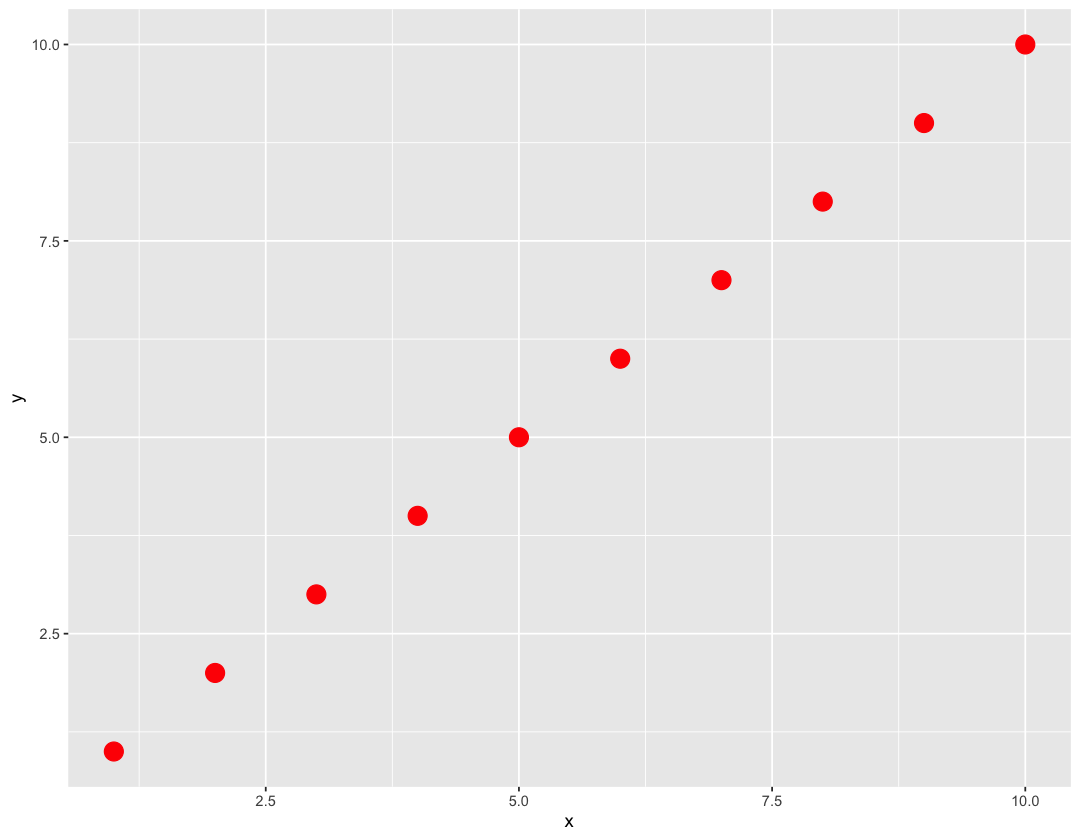

In [583]:
caca <- data.frame(x=1:10, y=1:10)

killian(caca, size=5, color="red")

In [584]:
gtheme

function (size = 18) 
{
    theme(text = element_text(size = size, colour = "black"), 
        axis.text = element_text(size = size, colour = "black"), 
        axis.title = element_text(size = size, colour = "black"), 
        strip.text.x = element_text(size = size), legend.text = element_text(size = size))
}
<bytecode: 0x138490ac0>

In [208]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20.0.0
Running under: macOS Sonoma 14.5

Matrix products: default
BLAS/LAPACK: /opt/homebrew/Caskroom/miniforge/base/envs/work/lib/libopenblas.0.dylib;  LAPACK version 3.12.0

locale:
[1] C/UTF-8/C/C/C/C

time zone: Europe/Paris
tzcode source: system (macOS)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggtext_0.1.2    ggpubr_0.6.0    ggsci_3.2.0     patchwork_1.3.0
 [5] MetBrewer_0.2.0 readxl_1.4.3    lubridate_1.9.4 forcats_1.0.0  
 [9] stringr_1.5.1   dplyr_1.1.4     purrr_1.0.2     readr_2.1.5    
[13] tidyr_1.3.1     tibble_3.2.1    ggplot2_3.5.2   tidyverse_2.0.0

loaded via a namespace (and not attached):
 [1] gtable_0.3.6       xfun_0.52          rstatix_0.7.2      lattice_0.22-6    
 [5] tzdb_0.4.0         vctrs_0.6.5        tools_4.4.1        generics_0.1.3    
 [9] pkgconfig_2.0.3    Matrix_1.7-2       RColorBrewer_1.1-3 uuid_1.2-1   